## Load data and libraries

In [408]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

import warnings
warnings.filterwarnings('ignore')

sns.reset_orig()
plt.style.use('seaborn-paper')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['figure.dpi'] = 400

### Dataset Description

| **Variable** 	| **Description** 	| **Source** 	|
|---	|---	|---	|
| id 	| parcel unique identification number 	| Farmers' Cooperative 	|
| ha 	| parcel area in hectare 	| Farmers' Cooperative 	|
| variety 	| seed variety 	| Farmers' Cooperative 	|
| sdate 	| sowing date 	| Farmers' Cooperative 	|
| hdate 	| harvest date 	| Farmers' Cooperative 	|
| yield21 	| yield of 2021 in kg/ha 	| Farmers' Cooperative 	|
| lat 	| centroid of parcel 	| Farmers' Cooperative 	|
| lon 	| centroid of parcel 	| Farmers' Cooperative 	|
| field_area 	| calculated by georeferenced parcel 	| Analysis 	|
| perimeter 	| calculated by georeferenced parcel 	| Analysis 	|
| ratio 	| field_area to perimeter 	| Analysis 	|
| prediction 	| the recommendation in sowing date 	| Recommender System 	|
| HIGH 	| max ambient temperature on sowing day 	| Nearest weather station 	|
| LOW 	| max ambient temperature on sowing day 	| Nearest weather station 	|
| clay_mean 	| mean value of parcel about clay content (%) in topsoil (0-20cm) (modelled by Multivariate Additive Regression Splines) 	| European Soil Data Centre (ESDAC) of Joint Research Center 	|
| sand_mean 	| mean value of parcel about sand content (%) in topsoil (0-20cm) (modelled by Multivariate Additive Regression Splines) 	| European Soil Data Centre (ESDAC) of Joint Research Center 	|
| silt_mean 	| mean value of parcel about silt content (%) in topsoil (0-20cm) (modelled by Multivariate Additive Regression Splines) 	| European Soil Data Centre (ESDAC) of Joint Research Center 	|
| occont_mean 	| mean value of parcel topsoil organic carbon content (g C kg-1) 	| European Soil Data Centre (ESDAC) of Joint Research Center 	|
| var_code 	| seed variety code  	| Analysis 	|
| len_season 	| length of season, harvest doy minus sowing doy 	| Farmers' Cooperative 	|
| peak_ndvi 	| calculation of the peak of ndvi in the cultivation period 	| Copernicus Sentinel-2 	|
| trapezoidal_ndvi_sow2harvest 	| calculated using the trapezoidal rule between the total vegetation values between sowing and harvest date. 	| Copernicus Sentinel-2 	|
| ndwi_sowingday 	| calculation of the ndwi at sowing day 	| Copernicus Sentinel-2 	|

In [409]:
df = pd.read_csv('data.csv')
df

,id,ha,variety,sdate,hdate,yield21,lat,lon,field_area,perimeter,...,LOW,clay_mean,sand_mean,silt_mean,occont_mean,var_code,len_season,peak_ndvi,trapezoidal_ndvi_sow2harvest,ndwi_sowingday
0,80,1.80,ARMONIA,2021-04-04,2021-09-27,2400.0,38.523236,22.959435,18165.260882,563.232015,...,10.8,39.323318,15.151878,45.524803,18.384020,0.0,176.0,0.7700,77.782425,-0.324857
1,228,0.20,ST 402,2021-04-10,2021-09-27,3200.0,38.531556,22.961721,2063.889893,240.556938,...,-0.9,33.878448,21.506210,44.615341,12.630229,11.0,170.0,0.8580,87.670150,-0.330114
2,233,0.55,ST 402,2021-04-10,2021-09-27,2800.0,38.532873,22.961703,5531.405407,309.982360,...,-0.9,33.878448,21.506210,44.615341,12.630229,11.0,170.0,0.8950,84.534571,-0.349714
3,230,0.55,ST 402,2021-04-10,2021-09-27,2880.0,38.530406,22.961877,5601.051971,304.249968,...,-0.9,36.488529,18.563759,44.947712,12.398519,11.0,170.0,0.8950,92.057986,-0.319514
4,3,2.48,FIDEL,2021-04-11,2021-09-29,3060.0,38.517362,22.994160,25073.825897,646.851305,...,2.0,35.803724,16.069150,48.127126,13.776085,6.0,171.0,0.8530,79.353135,-0.286857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,66,0.26,FIDEL,2021-05-06,2021-09-20,3000.0,38.495017,22.999464,2627.641135,216.322055,...,16.1,30.453732,19.178757,50.367512,12.351420,6.0,137.0,0.6050,57.423081,-0.331400
167,206,0.97,ST 402,2021-05-07,2021-09-10,2000.0,38.522107,22.996148,9800.293064,432.194959,...,13.9,37.647740,15.132325,47.219935,13.713308,11.0,126.0,0.8162,63.674244,-0.447240
168,207,0.96,FIDEL,2021-05-07,2021-09-15,3300.0,38.521262,22.976469,9769.742396,513.276405,...,13.9,39.773846,15.538498,44.687656,12.184794,6.0,131.0,0.8010,64.877960,-0.321240
169,204,1.82,FIDEL,2021-05-07,2021-09-15,2700.0,38.497463,22.969979,18396.943625,661.104653,...,13.9,28.186848,28.307988,43.505167,22.577919,6.0,131.0,0.9000,73.572720,-0.281760


In [410]:
#renaming var_ARMONIA, var_CAMPO, var_DP 396, var_DP 397, var_ELPIDA, var_ELSA, var_FIDEL, var_FLORA, var_LIDER, var_OLIVIA, var_ST 318, var_ST 402, var_ST 463
df.variety[df.variety=='DP 396'] = 'DP_396'
df.variety[df.variety=='DP 397'] = 'DP_397'
df.variety[df.variety=='ST 318'] = 'ST_318'
df.variety[df.variety=='ST 402'] = 'ST_402'
df.variety[df.variety=='ST 463'] = 'ST_463'

one hot encoding of seed varieties and concat with rest dataset

In [411]:
y = pd.get_dummies(df.variety, prefix='var')
df = pd.concat([df, y], axis= 1)
df

,id,ha,variety,sdate,hdate,yield21,lat,lon,field_area,perimeter,...,var_DP_397,var_ELPIDA,var_ELSA,var_FIDEL,var_FLORA,var_LIDER,var_OLIVIA,var_ST_318,var_ST_402,var_ST_463
0,80,1.80,ARMONIA,2021-04-04,2021-09-27,2400.0,38.523236,22.959435,18165.260882,563.232015,...,0,0,0,0,0,0,0,0,0,0
1,228,0.20,ST_402,2021-04-10,2021-09-27,3200.0,38.531556,22.961721,2063.889893,240.556938,...,0,0,0,0,0,0,0,0,1,0
2,233,0.55,ST_402,2021-04-10,2021-09-27,2800.0,38.532873,22.961703,5531.405407,309.982360,...,0,0,0,0,0,0,0,0,1,0
3,230,0.55,ST_402,2021-04-10,2021-09-27,2880.0,38.530406,22.961877,5601.051971,304.249968,...,0,0,0,0,0,0,0,0,1,0
4,3,2.48,FIDEL,2021-04-11,2021-09-29,3060.0,38.517362,22.994160,25073.825897,646.851305,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,66,0.26,FIDEL,2021-05-06,2021-09-20,3000.0,38.495017,22.999464,2627.641135,216.322055,...,0,0,0,1,0,0,0,0,0,0
167,206,0.97,ST_402,2021-05-07,2021-09-10,2000.0,38.522107,22.996148,9800.293064,432.194959,...,0,0,0,0,0,0,0,0,1,0
168,207,0.96,FIDEL,2021-05-07,2021-09-15,3300.0,38.521262,22.976469,9769.742396,513.276405,...,0,0,0,1,0,0,0,0,0,0
169,204,1.82,FIDEL,2021-05-07,2021-09-15,2700.0,38.497463,22.969979,18396.943625,661.104653,...,0,0,0,1,0,0,0,0,0,0


## Scaling normalization of X-confounders-features-covvariates

In [412]:
# scale features
X = ["clay_mean", "sand_mean", "silt_mean", "occont_mean", "HIGH", "LOW", "var_code" , "ratio", "len_season", 
     "peak_ndvi", "trapezoidal_ndvi_sow2harvest","ndwi_sowingday"]
y = "yield21"

scaled = df.assign(**{f: (df[f] - df[f].mean())/df[f].std() for f in X})
# scaled = df.assign(**{f: (df[f] - df[f].min())/(df[f].max() - df[f].min()) for f in X})
scaled.head()

,id,ha,variety,sdate,hdate,yield21,lat,lon,field_area,perimeter,...,var_DP_397,var_ELPIDA,var_ELSA,var_FIDEL,var_FLORA,var_LIDER,var_OLIVIA,var_ST_318,var_ST_402,var_ST_463
0,80,1.80,ARMONIA,2021-04-04,2021-09-27,2400.0,38.523236,22.959435,18165.260882,563.232015,...,0,0,0,0,0,0,0,0,0,0
1,228,0.20,ST_402,2021-04-10,2021-09-27,3200.0,38.531556,22.961721,2063.889893,240.556938,...,0,0,0,0,0,0,0,0,1,0
2,233,0.55,ST_402,2021-04-10,2021-09-27,2800.0,38.532873,22.961703,5531.405407,309.982360,...,0,0,0,0,0,0,0,0,1,0
3,230,0.55,ST_402,2021-04-10,2021-09-27,2880.0,38.530406,22.961877,5601.051971,304.249968,...,0,0,0,0,0,0,0,0,1,0
4,3,2.48,FIDEL,2021-04-11,2021-09-29,3060.0,38.517362,22.994160,25073.825897,646.851305,...,0,0,0,1,0,0,0,0,0,0


In [413]:
# binarize treatment
scaled.prediction[(scaled.prediction==1)|(scaled.prediction==2)]=0
scaled.prediction[scaled.prediction==3]=1
scaled=scaled.astype({'prediction':'bool'}, copy=False)

In [414]:
scaled_clean= scaled.copy()

## Do-Why

In [415]:
import logging

import dowhy
from dowhy import CausalModel
import econml


In [416]:
print(dowhy.__version__)

0.7.1


## Causal Diagram

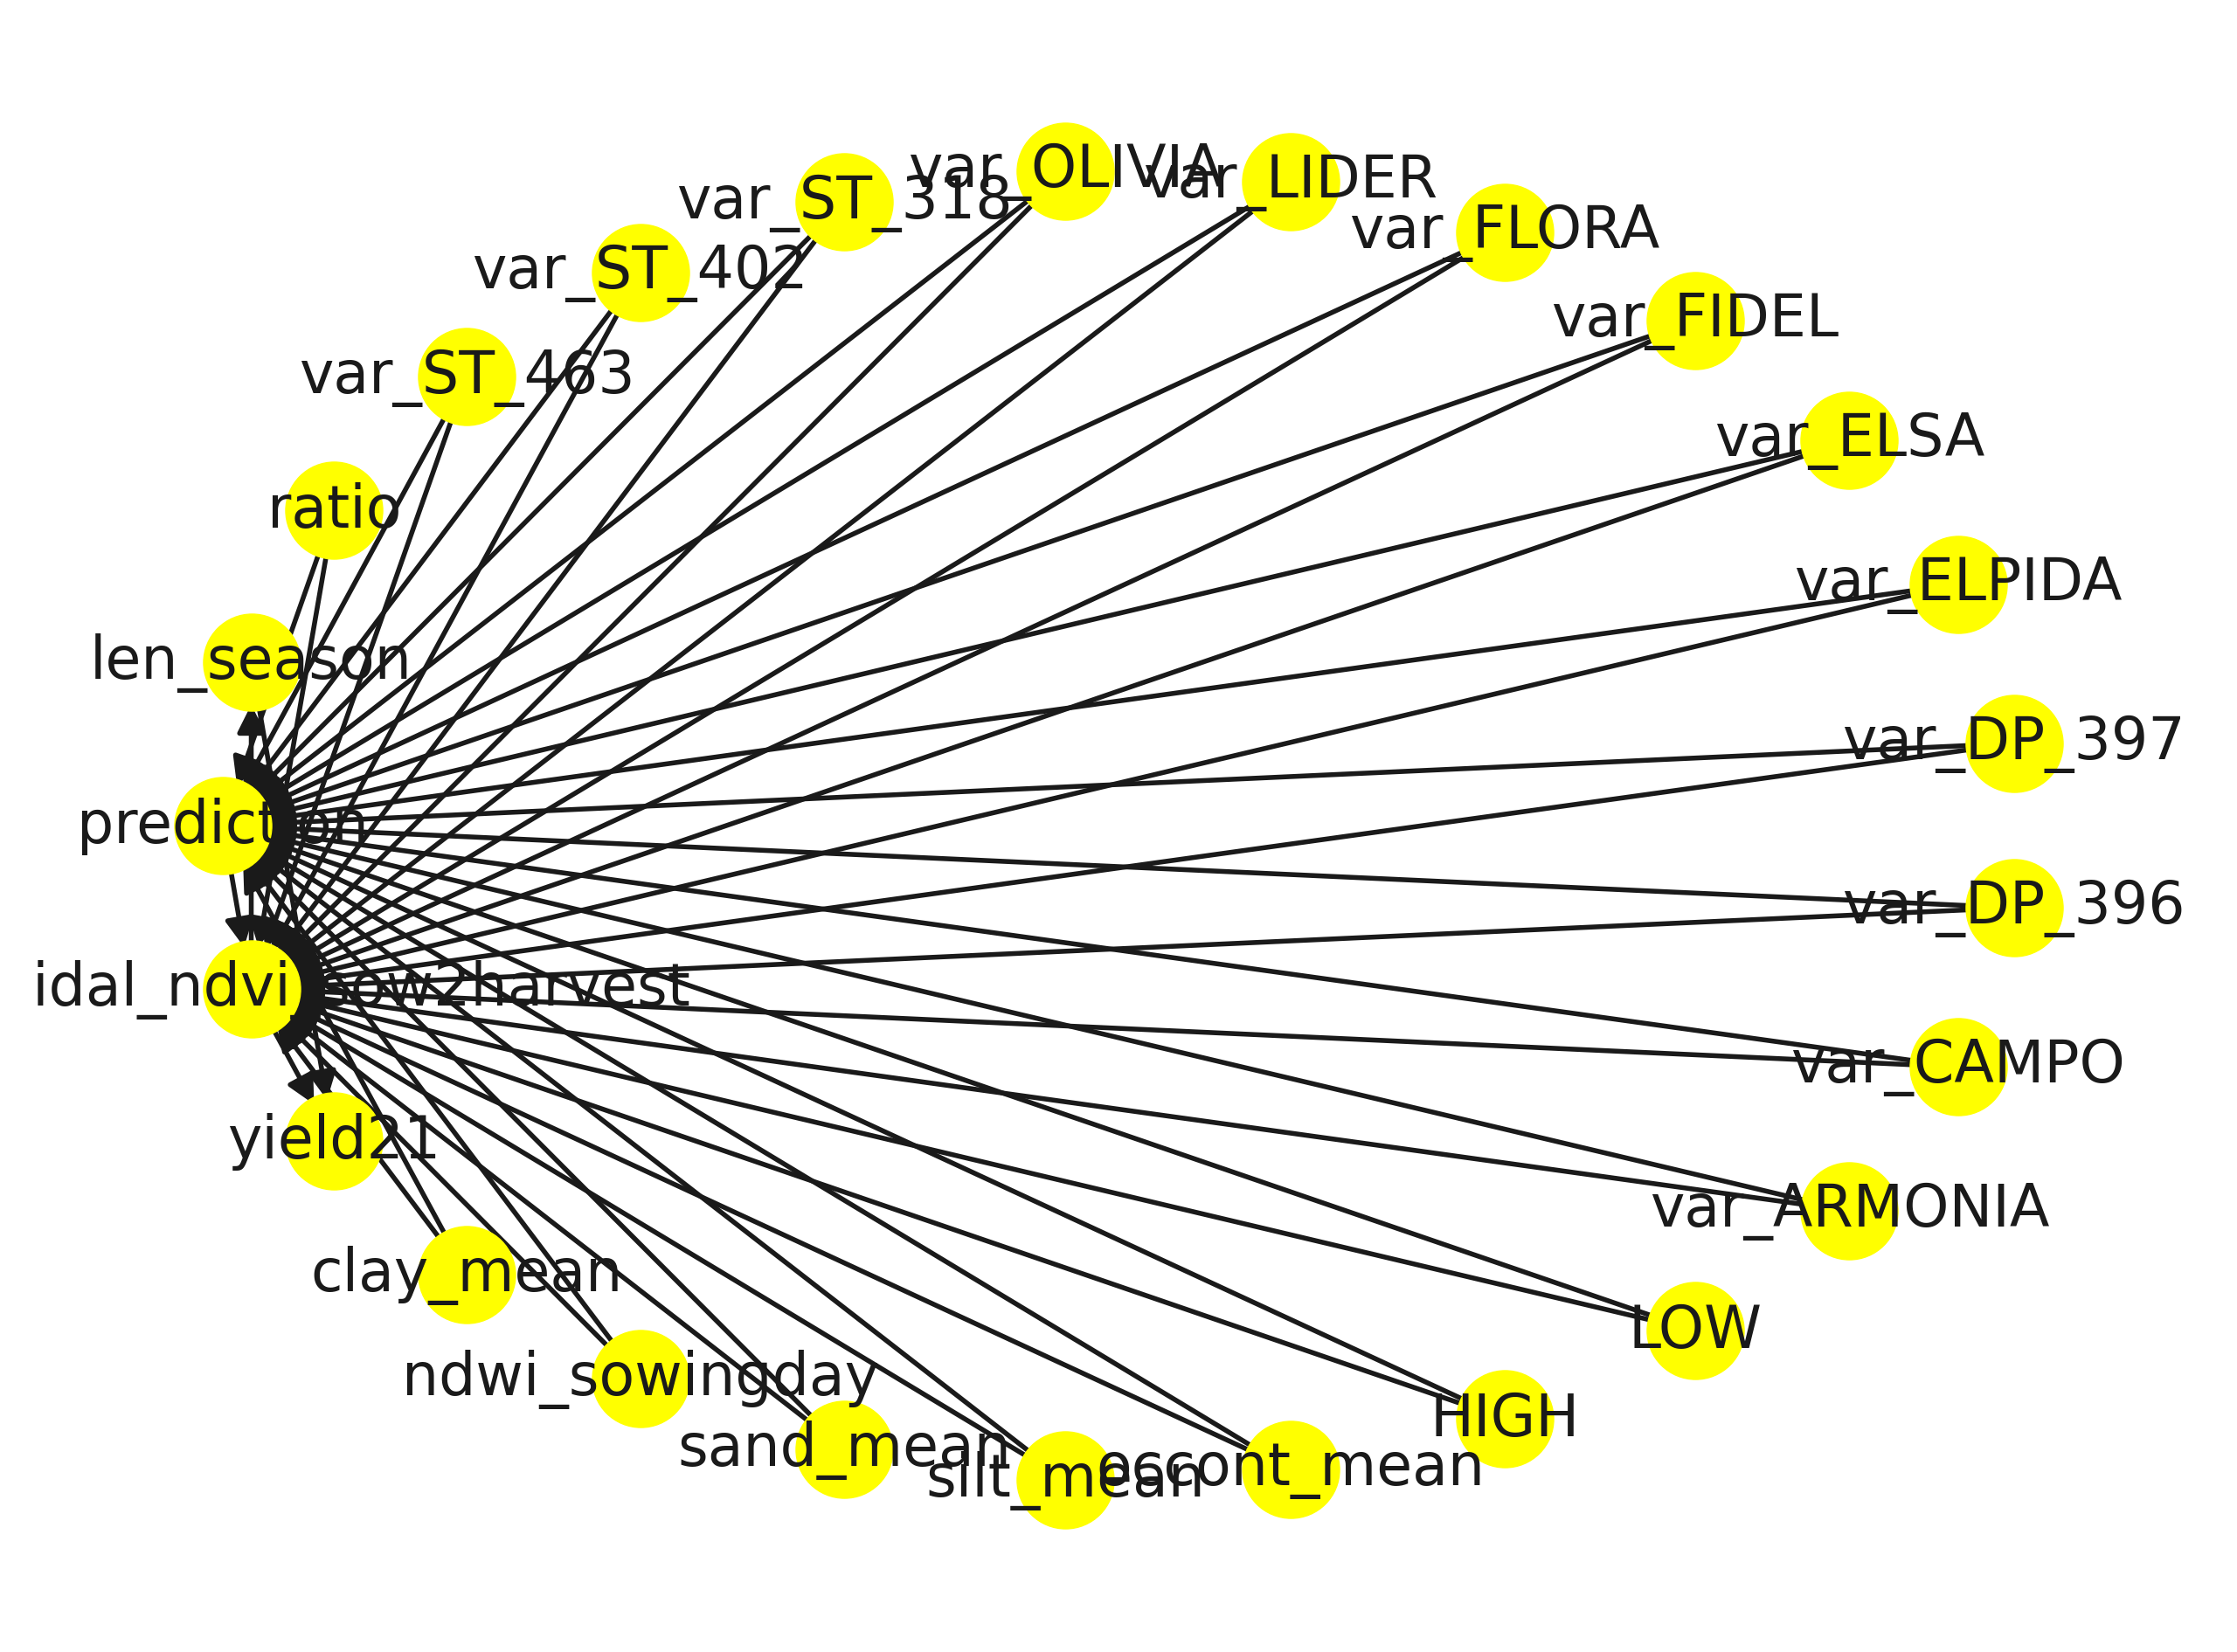

In [417]:
#var_ARMONIA, var_CAMPO, var_DP 396, var_DP 397, var_ELPIDA, var_ELSA, var_FIDEL, var_FLORA, var_LIDER, var_OLIVIA, var_ST 318, var_ST 402, var_ST 463

# With DOT string
model=CausalModel(
    data = scaled,    
    treatment='prediction',
        outcome='yield21',
        graph="digraph {prediction -> trapezoidal_ndvi_sow2harvest;trapezoidal_ndvi_sow2harvest -> yield21\
        clay_mean -> prediction;clay_mean -> trapezoidal_ndvi_sow2harvest;\
        ndwi_sowingday -> prediction;ndwi_sowingday -> trapezoidal_ndvi_sow2harvest;\
        sand_mean -> prediction;sand_mean -> trapezoidal_ndvi_sow2harvest;\
        silt_mean -> prediction;silt_mean -> trapezoidal_ndvi_sow2harvest;\
        occont_mean -> prediction;occont_mean -> trapezoidal_ndvi_sow2harvest;\
        HIGH -> prediction;HIGH -> trapezoidal_ndvi_sow2harvest;\
        LOW -> prediction;LOW -> trapezoidal_ndvi_sow2harvest;\
        var_ARMONIA -> prediction;var_ARMONIA -> trapezoidal_ndvi_sow2harvest;\
        var_CAMPO -> prediction;var_CAMPO -> trapezoidal_ndvi_sow2harvest;\
        var_DP_396 -> prediction;var_DP_396 -> trapezoidal_ndvi_sow2harvest;\
        var_DP_397 -> prediction;var_DP_397 -> trapezoidal_ndvi_sow2harvest;\
        var_ELPIDA -> prediction;var_ELPIDA -> trapezoidal_ndvi_sow2harvest;\
        var_ELSA -> prediction;var_ELSA -> trapezoidal_ndvi_sow2harvest;\
        var_FIDEL -> prediction;var_FIDEL -> trapezoidal_ndvi_sow2harvest;\
        var_FLORA -> prediction;var_FLORA -> trapezoidal_ndvi_sow2harvest;\
        var_LIDER -> prediction;var_LIDER -> trapezoidal_ndvi_sow2harvest;\
        var_OLIVIA -> prediction;var_OLIVIA -> trapezoidal_ndvi_sow2harvest;\
        var_ST_318 -> prediction;var_ST_318 -> trapezoidal_ndvi_sow2harvest;\
        var_ST_402 -> prediction;var_ST_402 -> trapezoidal_ndvi_sow2harvest;\
        var_ST_463 -> prediction;var_ST_463 -> trapezoidal_ndvi_sow2harvest;\
        ratio -> prediction;ratio -> trapezoidal_ndvi_sow2harvest;\
        trapezoidal_ndvi_sow2harvest -> len_season;len_season -> yield21;}")
model.view_model()

## Effect Identification

Below, the conditional part is the adjustment set the backdoor criterion identified given the graph.
This is the set of variables that we have to control for in order to correctly estimate the effect of
prediction on the yield. The differential notation essentially means that we are interested in
learning the slope of the tanget line in the graph of the function ```yield(prediction)``` at every value of
```prediction```. This makes most sense if ```prediction``` is continuous. For us is binary, so this
simply reduces to the yield ```(prediction=1) - yield(prediction=0)``` quantity. The graph tells us
what we have to account for in order for the above quantity to be an unbiased (under unconfoudedness + positivity)
estimate of the ATE.

The ```estimand assumption 1``` explicitly writes down the unconfoudedness assumption. If ```U``` is a confounder
for ```prediction``` $\rightarrow$ ```yield``` then it the critical conditional distribution we care about
(See formula below) is unchanged,
indirectly meaning that it is one of the control variables, i.e. we have accounted for it.

The backdoor adjustment formula from which the ATE form follows is the following:

$$ P(y|do(t)) = \sum_w P(y|t,w)P(w) $$

the ATE is simply the expectation $ E[Y|do(t)] $ of the above probability distribution. Using the backdoor adjustment formula, if $t$ is binary it reduces to:

$$E_w\big[E[Y|T=1, W] - E[Y|T=0, W]\big] $$

In [418]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(yield21|sand_mean,occont_mean,var_FIDEL,var_FLORA,nd
d[prediction]                                                                 

                                                                              
wi_sowingday,var_ST_463,LOW,var_CAMPO,var_ST_402,var_DP_397,var_OLIVIA,clay_me
                                                                              

                                                                              
an,var_DP_396,ratio,silt_mean,var_ELSA,var_LIDER,var_ELPIDA,HIGH,var_ST_318,va
                                                                              

           
r_ARMONIA))
           
Estimand assumption 1, Unconfoundedness: If U→{prediction} and U→yield21 then P(yield21|prediction,sand_mean,occont_mean,var_FIDEL,var_FLORA,ndwi_sowingda

## Average Effect estimation

### Through Backdoor

#### Using Linear Regression

The critical distribution is $P(Y|T=t, W=w)$. Its expectation is enough to get the ATE. We may estimate it in several ways.

Here we assume a parametric form for $E[Y|T=t, W=w]$, e.g. $Y_i = aT_i + bW_i + e_i$.

Connections to meta-learners (this is an S-learner essentially) are apparent.

### A first manually implementation with linear regression - baseline

In [419]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Xt = scaled[['prediction','HIGH','sand_mean','silt_mean','ratio','LOW','occont_mean','clay_mean','ndwi_sowingday',
             'var_ARMONIA', 'var_CAMPO', 'var_DP_396', 'var_DP_397', 'var_ELPIDA', 'var_ELSA', 'var_FIDEL', 'var_FLORA',
             'var_LIDER', 'var_OLIVIA', 'var_ST_318', 'var_ST_402', 'var_ST_463']]
y = scaled['yield21']

In [420]:
model_lin = LinearRegression()
model_lin.fit(Xt, y)

LinearRegression()

In [421]:
model_lin.coef_

array([ 5.45912099e+02, -2.75338260e+02,  1.22698778e+09,  8.51212725e+08,
       -1.45028095e+01,  1.53121830e+02,  4.96826349e+01,  8.87597566e+08,
        2.23873803e+02, -4.00149340e+01,  6.69930109e+02,  2.10647781e+01,
       -2.67477669e+02, -3.90705814e+02, -2.81568899e+02,  4.63116448e+02,
        3.63079608e+02,  1.03344331e+02, -5.77577385e+02, -1.65305654e+01,
        2.93990362e+02, -3.39487321e+02])

In [422]:
Xt1 = pd.DataFrame.copy(Xt)
Xt1['prediction'] = 1
Xt0 = pd.DataFrame.copy(Xt)
Xt0['prediction'] = 0
ate_est = np.mean(model_lin.predict(Xt1) - model_lin.predict(Xt0))
print('ATE estimate:', ate_est)

ATE estimate: 545.9120990502817


In [423]:
causal_estimate_lin = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.linear_regression",
                                              target_units="ate",
                                              confidence_intervals=True,
                                              test_significance=True)
print(causal_estimate_lin)
print("Causal Estimate is " + str(causal_estimate_lin.value))


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(yield21|sand_mean,occont_mean,var_FIDEL,var_FLORA,nd
d[prediction]                                                                 

                                                                              
wi_sowingday,var_ST_463,LOW,var_CAMPO,var_ST_402,var_DP_397,var_OLIVIA,clay_me
                                                                              

                                                                              
an,var_DP_396,ratio,silt_mean,var_ELSA,var_LIDER,var_ELPIDA,HIGH,var_ST_318,va
                      

In [424]:
causal_estimate_lin.test_stat_significance()

{'p_value': array([0.00154702])}

#### Using Matcing with nearestneigbor on set of confounders and euclidean distance

Identification as before. Distance = euclidean (l2). N_neighbors = 1
Based on the backdoor variables, it matches every control unit to a treated and vice versa.
For each matched pair, compute the difference of outcomes between the treated and control and average it over all units.
confidence intervals are bootstrapped.

In [425]:
causal_estimate_d = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.distance_matching",
                                              target_units="ate",
                                              confidence_intervals=True,
                                              test_significance=True)
print(causal_estimate_d)
print("Causal Estimate is " + str(causal_estimate_d.value))

distance_matching
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(yield21|sand_mean,occont_mean,var_FIDEL,var_FLORA,nd
d[prediction]                                                                 

                                                                              
wi_sowingday,var_ST_463,LOW,var_CAMPO,var_ST_402,var_DP_397,var_OLIVIA,clay_me
                                                                              

                                                                              
an,var_DP_396,ratio,silt_mean,var_ELSA,var_LIDER,var_ELPIDA,HIGH,var_ST_318,va
                                                                              

           
r_ARMONIA))
           
Estimand assumption 1, Unconfoundedness: If U→{prediction} and U→yield21 then P(yield21|

In [426]:
causal_estimate_d.test_stat_significance()

{'p_value': 0.006000000000000005}

#### Using Propensity Scores with IPS weighting

IPSW weights each row with an inverse estimate of its propensity score to address bias.

In [427]:
causal_estimate_ipw_trim = model.estimate_effect(identified_estimand,
                                            method_name="backdoor.propensity_score_weighting",
                                            target_units = "ate",
                                            method_params={"weighting_scheme":"ips_weight","min_ps_score":0.20, "max_ps_score":0.8,"propensity_score_column":"propensity_score_ipw"},
                                            confidence_intervals=True,
                                            test_significance=True)
print(causal_estimate_ipw_trim)
print("Causal Estimate is " + str(causal_estimate_ipw_trim.value))

propensity_score_weighting
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(yield21|sand_mean,occont_mean,var_FIDEL,var_FLORA,nd
d[prediction]                                                                 

                                                                              
wi_sowingday,var_ST_463,LOW,var_CAMPO,var_ST_402,var_DP_397,var_OLIVIA,clay_me
                                                                              

                                                                              
an,var_DP_396,ratio,silt_mean,var_ELSA,var_LIDER,var_ELPIDA,HIGH,var_ST_318,va
                                                                              

           
r_ARMONIA))
           
Estimand assumption 1, Unconfoundedness: If U→{prediction} and U→yield21 then P

trimmed propensity scores

<AxesSubplot:>

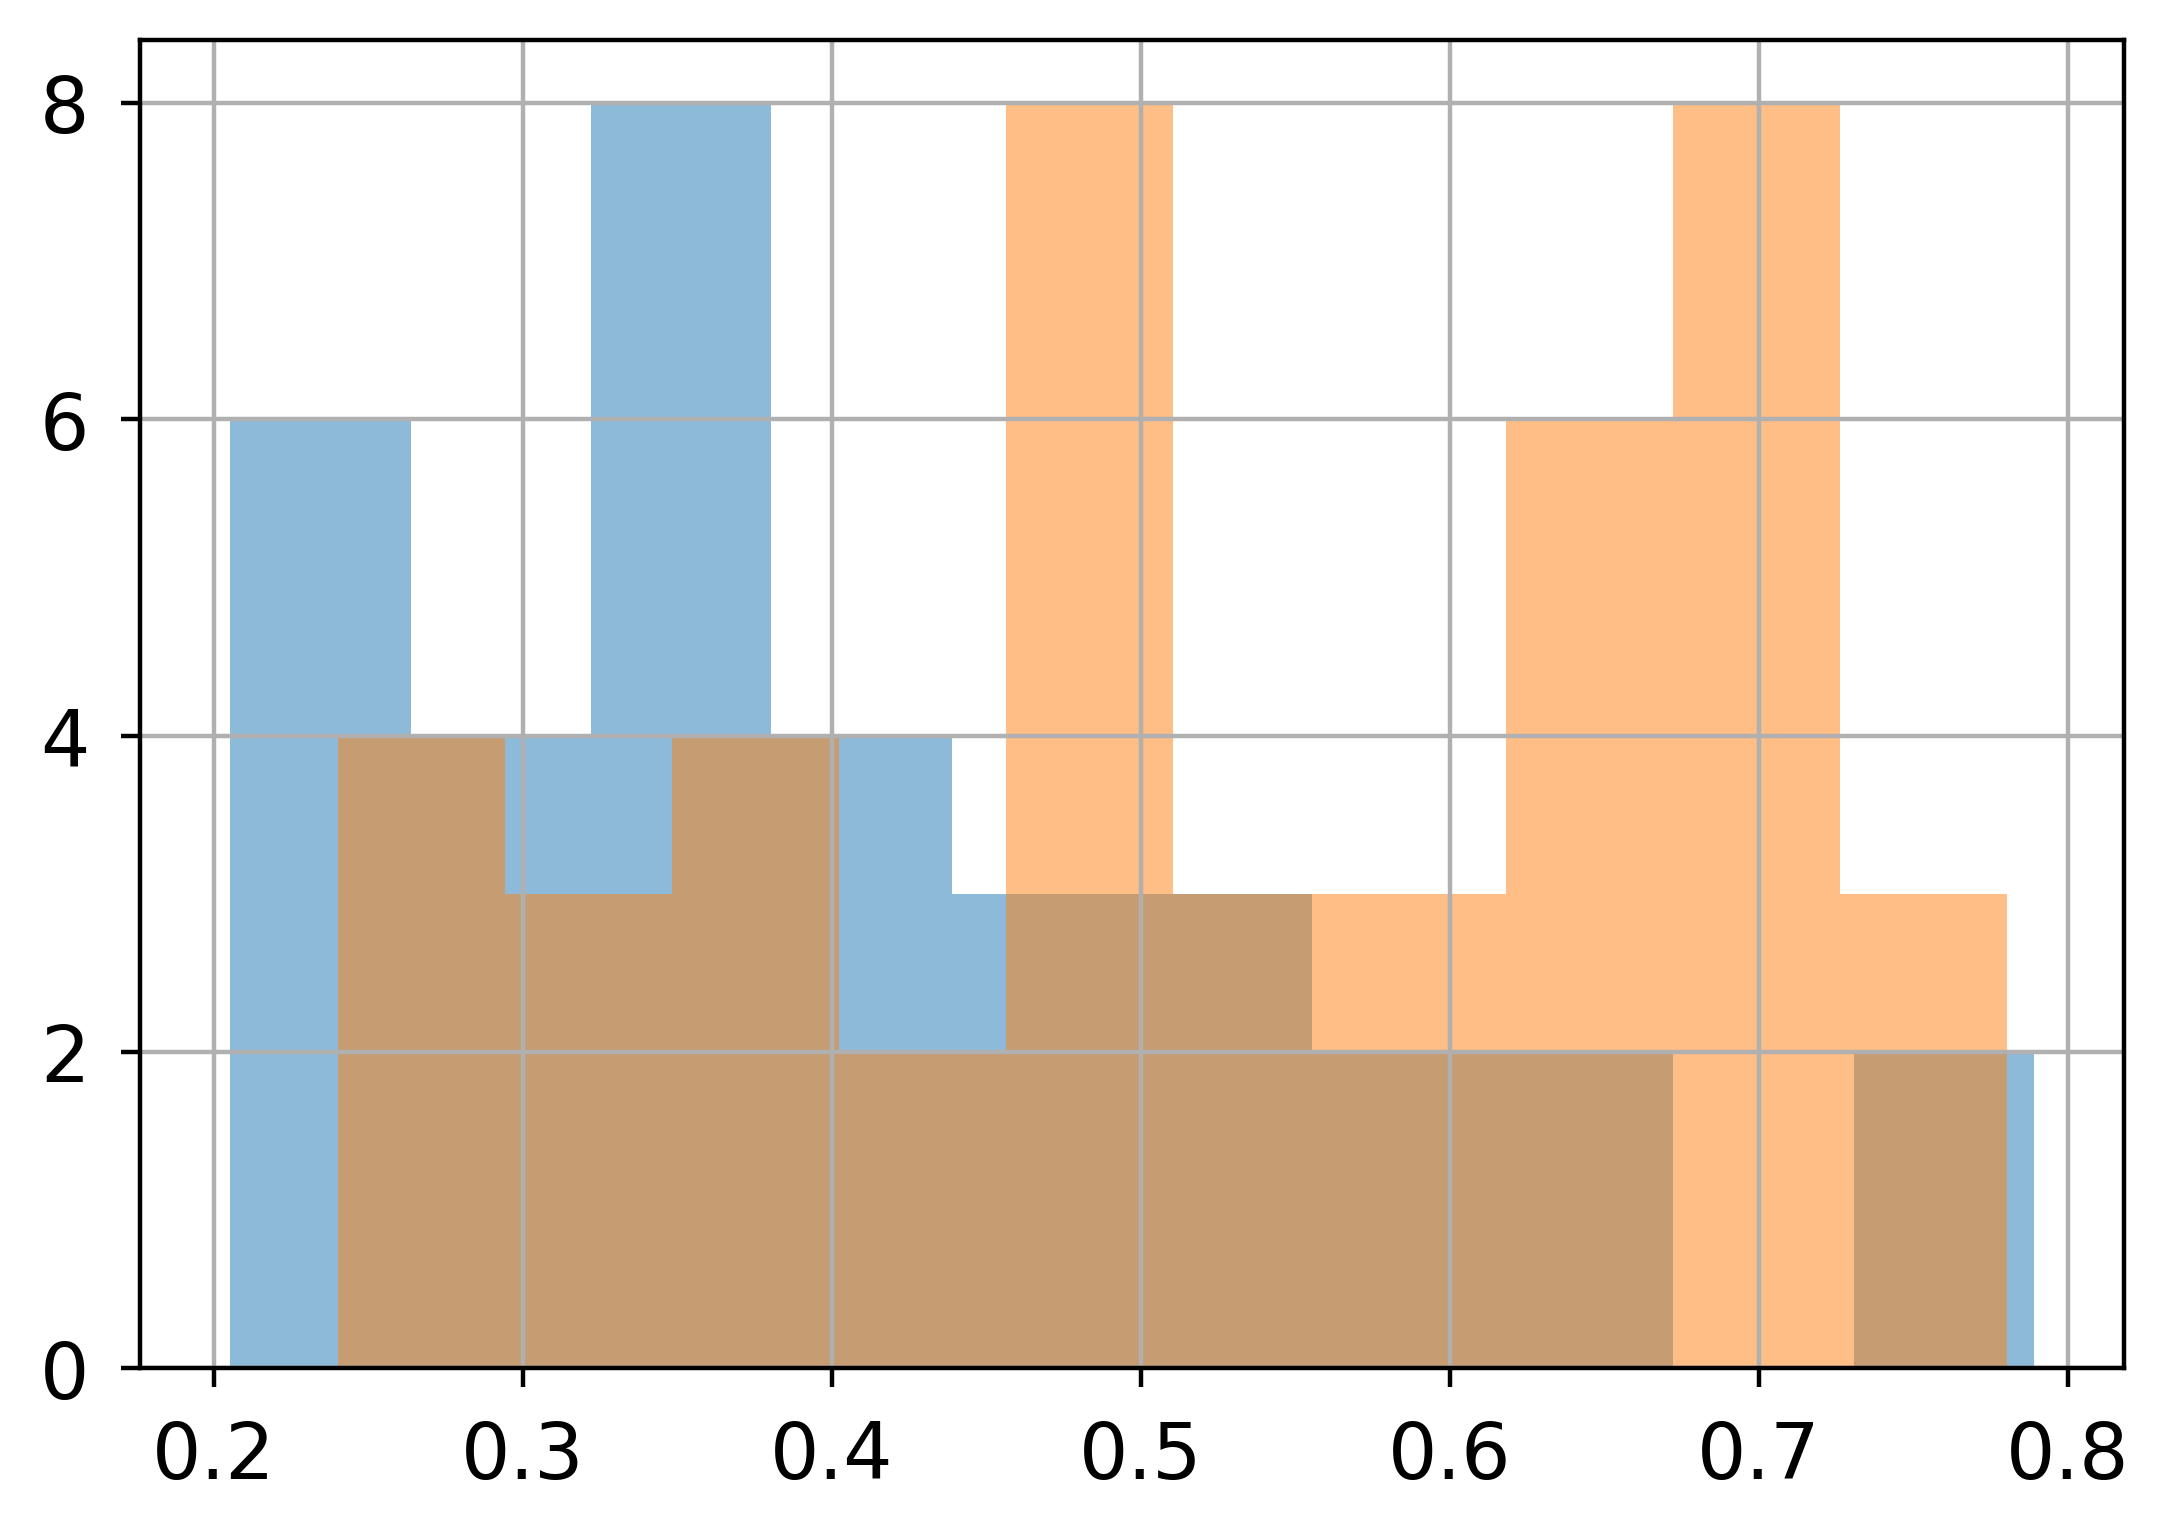

In [428]:
scaled.propensity_score_ipw[(scaled.propensity_score_ipw>0.2)&(scaled.propensity_score_ipw<0.8)][scaled.prediction==False].hist(alpha=0.5)
scaled.propensity_score_ipw[(scaled.propensity_score_ipw>0.2)&(scaled.propensity_score_ipw<0.8)][scaled.prediction==True].hist(alpha=0.5)

In [429]:
print("treated: {} ,control: {}".format(
    scaled[scaled.propensity_score_ipw>0.2].prediction[scaled.prediction==True].count(),
    scaled[scaled.propensity_score_ipw>0.2].prediction[scaled.prediction==False].count()))

treated: 48 ,control: 37


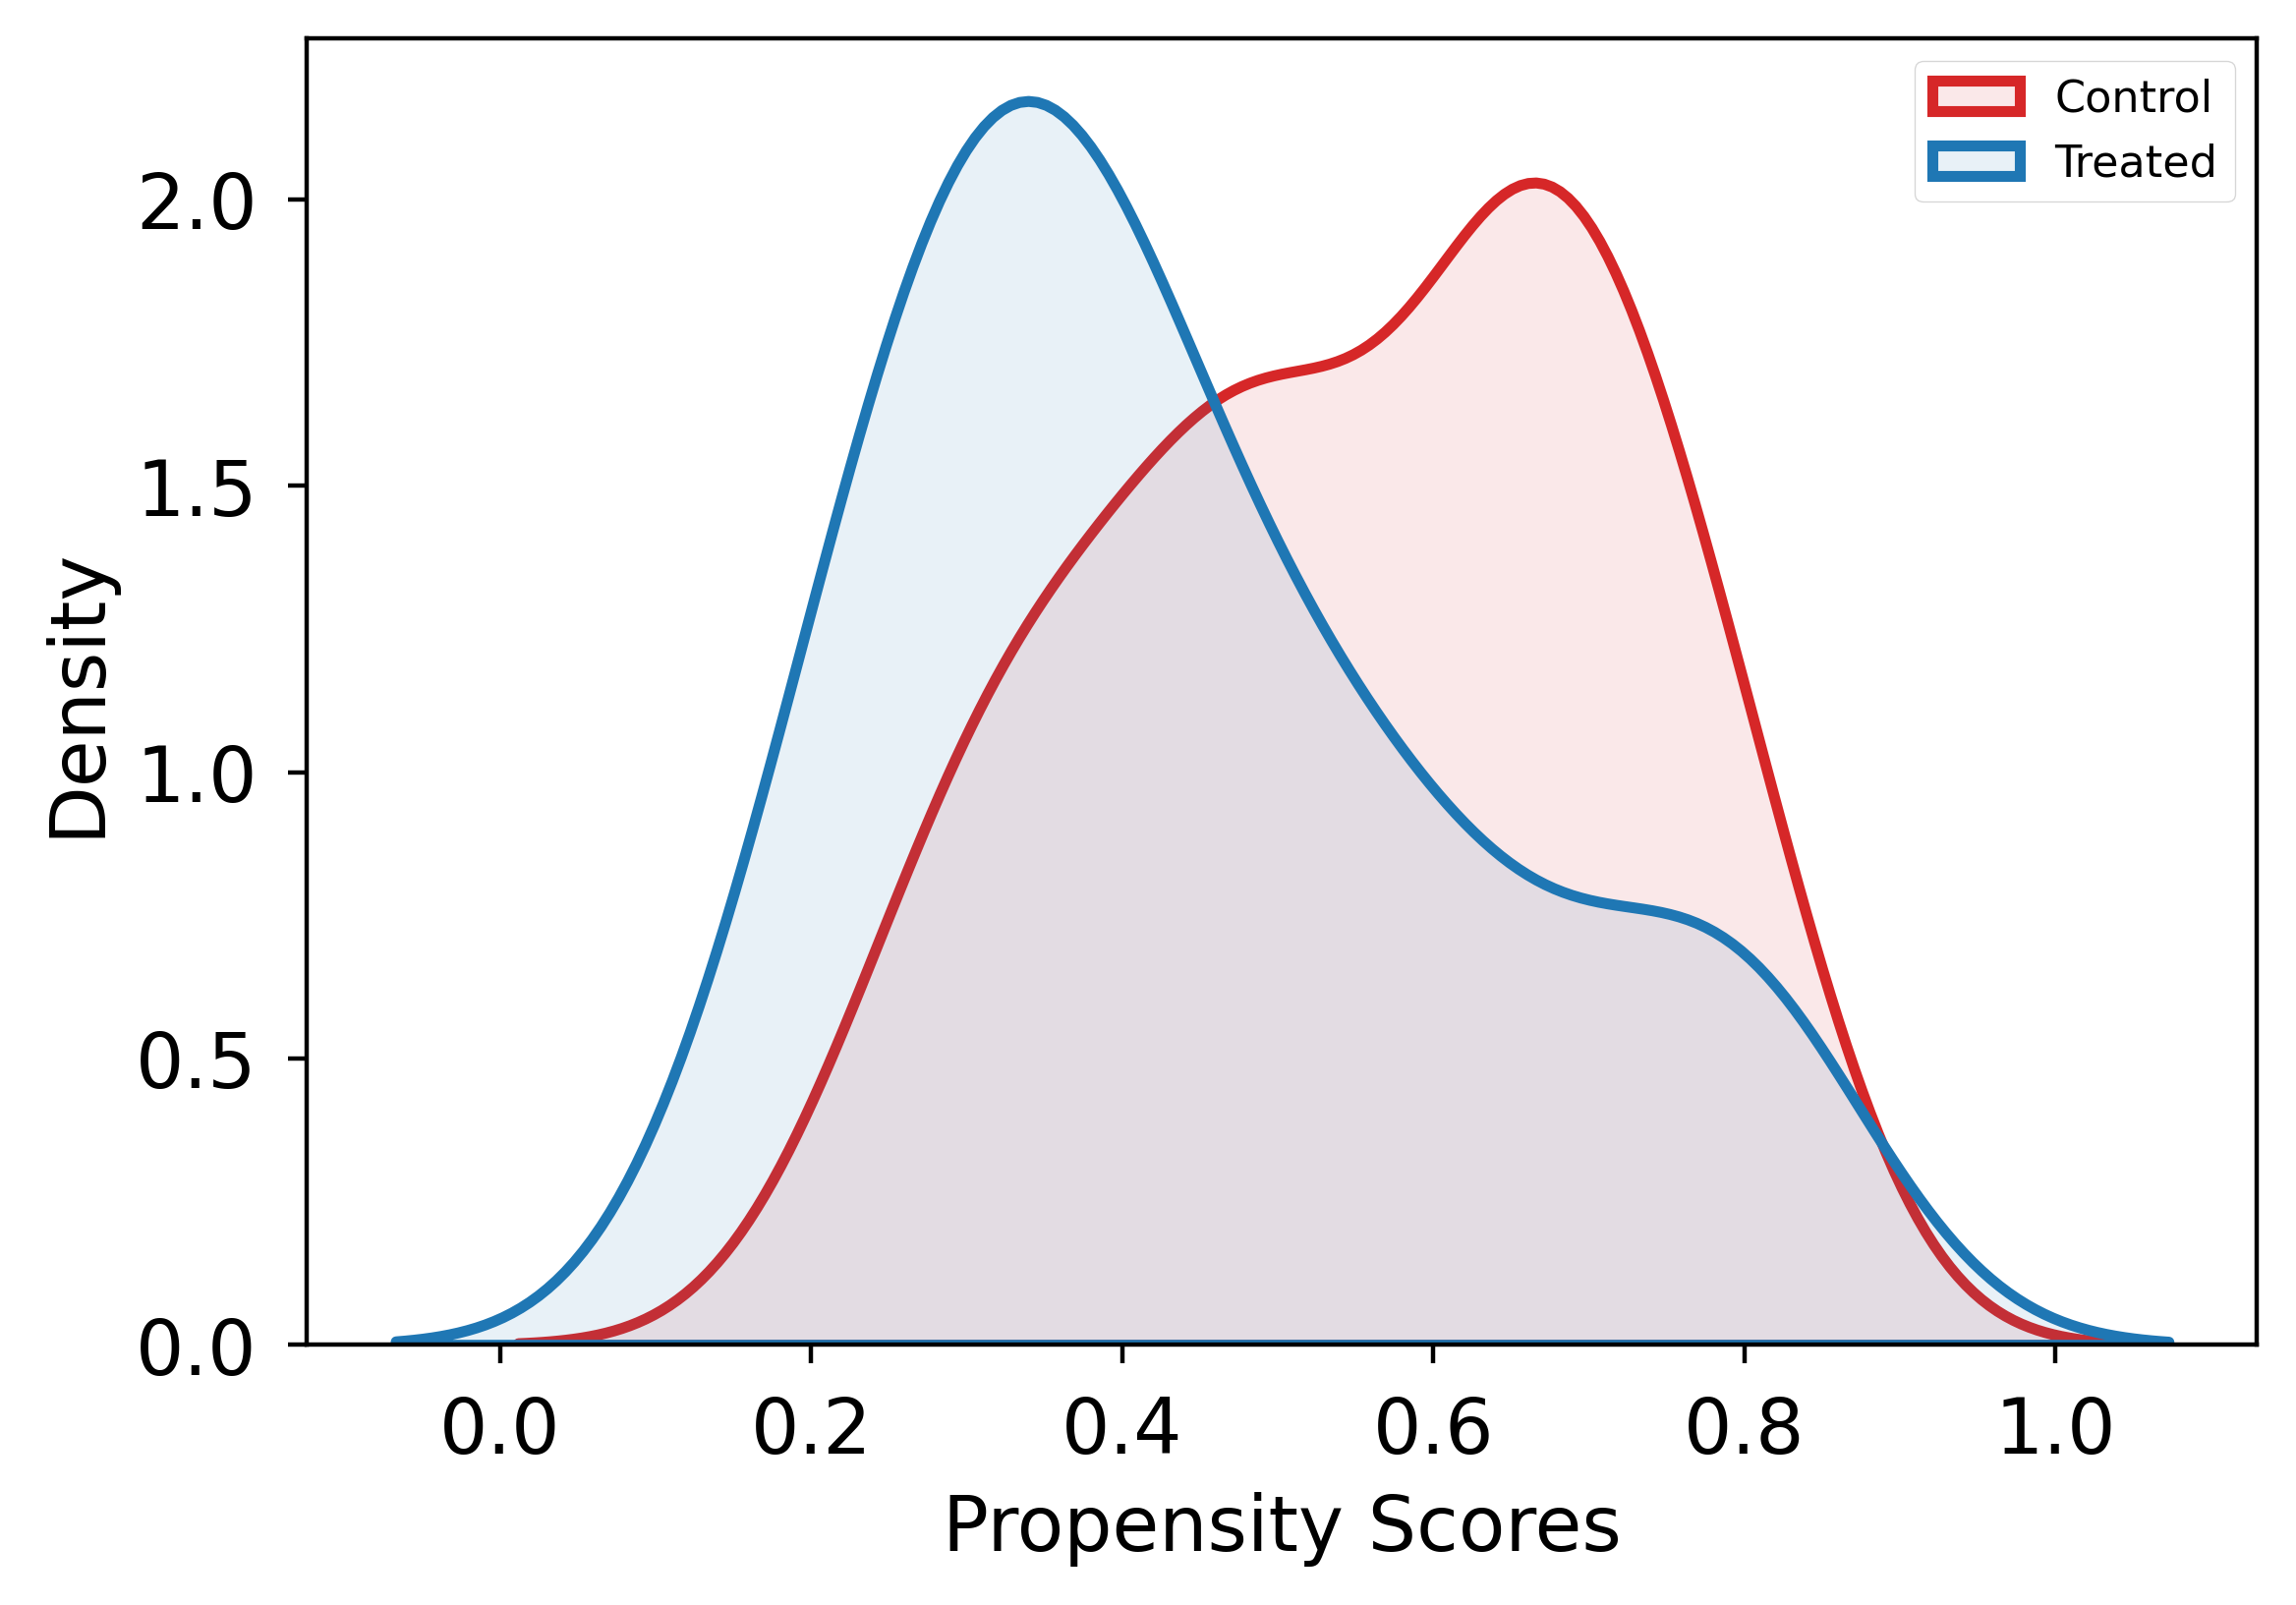

In [430]:
sns.kdeplot(data=scaled[scaled.propensity_score_ipw>0.2], x="propensity_score_ipw", hue="prediction",
           fill=True, common_norm=False, palette=['tab:blue', 'tab:red'],
   alpha=.1, linewidth=2)
plt.xlabel(("Propensity Scores"))
plt.legend(['Control','Treated'])

#### Evaluation of model which generates propensity scores

In [431]:
scaled['prop_score_rounded'] = scaled.propensity_score_ipw.round()
from sklearn.metrics import f1_score, roc_auc_score
print(f"Accuracy: {np.mean(scaled['prediction']==scaled['prop_score_rounded']):.4f},\
 ROC AUC: {roc_auc_score(scaled['prediction'], scaled['propensity_score_ipw']):.4f},\
 F1-score: {f1_score(scaled['prediction'], scaled['prop_score_rounded']):.4f}")
# Visualise confusion matrix
pd.crosstab(scaled['prediction'], scaled['prop_score_rounded']).rename(columns={0: False, 
                                                       1:True})

Accuracy: 0.8070, ROC AUC: 0.8812, F1-score: 0.6374


prop_score_rounded,False,True
prediction,,
False,109,12
True,21,29


## Refuting the estimate

### Replacing treatment with a random (placebo) variable
New effect should approach a value around of zero

see https://py-why.github.io/dowhy/_modules/dowhy/causal_refuter.html#CausalRefutation

Two categories: Refutation tests | Sensitivity analysis tests

For refutation tests:

e.g. placebo refuter. This transforms the treatment to placebo in various ways. Below you are choosing permute, i.e. shuffling the ```pred``` vector randomly. this breaks any causality between treatment and outcome hence effect size should be nullified. Here the null distribution is the distr of effect estimates over multiple bootstrap simulations with permuted treatment.
The test computes how likely the true estimate (e.g., zero for placebo test) is under the null hypothesis. If the probability of true effect estimate is lower than the p-value, then estimator method fails the test.

In other words, the already computed estimate we have from above, does not enter this procedure. Everything is done with the estimates the refuter internally produces, through the simulations it runs. The motivation they provide behind that is that
> we would ideally expect them (the already computed estimate and the refuted estimate) to follow the same distribition.

Under the hood: the estimates comprise a distribution of values. This is the distribution of the test statistic under the null hypothesis. For the placebo test the test statistic is the effect estimate of the permuted treatment and the null hypothesis is that this estimate is zero. They then detect if 0 falls to the extremes of the distribution. if it is on one of the two extremes, the null hypothesis is rejected (i.e. permuted effect estimates do not contain 0) and the estimation method does not pass the placebo test.

For sensitivity analysis tests:

> For sensitivity analysis tests (e.g., bootstrap, subset or common cause refuters), the null distribution captures the distribution of effect estimates under the “true” dataset (e.g., with an additional confounder or different sampling), and we compute the probability of the obtained estimate under this distribution. If the probability is lower than the p-value, then the estimator method fails the test.

Under the hood:

1. Intervene on data (e.g. add random common cause in dataset) and estimate new effect
2. Repeat for a number of simulations
3. Create distribution of refuted effect estimates. This is the null distribution of the test, the null hypothesis being that the already obtained estimate came from this distribution.
4. See where the already obtained non-refuted estimate falls in this distribution.
5. If in the two extremes, reject null hypothesis that it came from this distribution and fail the test.

The default significance level is 0.05

#### Linear Regression

In [432]:
res_placebo_lin=model.refute_estimate(identified_estimand, causal_estimate_lin,
        method_name="placebo_treatment_refuter", placebo_type="permute",
        num_simulations=100, random_seed=42 
        )
print(res_placebo_lin)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

#### Matching across confounders 

In [433]:
res_placebo_d=model.refute_estimate(identified_estimand, causal_estimate_d,
        method_name="placebo_treatment_refuter", placebo_type="permute",
        num_simulations=100, random_seed=42 
        )
print(res_placebo_d)

Refute: Use a Placebo Treatment
Estimated effect:448.12865497076024
New effect:50.81929824561403
p value:0.39



#### IPS weighting

In [434]:
res_placebo_ipw_trim=model.refute_estimate(identified_estimand, causal_estimate_ipw_trim,
        method_name="placebo_treatment_refuter", placebo_type="permute",
        num_simulations=100, random_seed=42
        )
print(res_placebo_ipw_trim)

Refute: Use a Placebo Treatment
Estimated effect:471.1726278562837
New effect:38.82788396530778
p value:0.4



### Adding a random common cause variable
New effect should not change a lot

#### Linear Regression

In [435]:
res_random_lin=model.refute_estimate(identified_estimand, causal_estimate_lin,
                                     method_name="random_common_cause", random_seed=42)
print(res_random_lin)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

#### Matching across confounders

In [436]:
res_random_d=model.refute_estimate(identified_estimand, causal_estimate_d,
                                   method_name="random_common_cause", random_seed=42)
print(res_random_d)

Refute: Add a random common cause
Estimated effect:448.12865497076024
New effect:432.42923976608193
p value:0.4



#### IPS weighting

In [437]:
res_random_ipw_trim=model.refute_estimate(identified_estimand, causal_estimate_ipw_trim,
                                          method_name="random_common_cause", random_seed=42)
print(res_random_ipw_trim)

Refute: Add a random common cause
Estimated effect:471.1726278562837
New effect:469.97468935189966
p value:0.4



### Adding an unobserved common cause variable
New effect should not change a lot, or it should change aligned with the added unobserved common cause

This class on a high level introduces an unobserved confounder and provides two options:

see https://py-why.github.io/dowhy/_modules/dowhy/causal_refuters/add_unobserved_common_cause.html#AddUnobservedCommonCause 

particularly the ```include_confounders_effect``` function. For e.g. the linear case, the refuter essentially samples normal random variables equal to the sample size, and obtains the value of the unobserved confounder by adding / subtracting the ```inferred coefficienct * the random variable```.


#### Linear Regression

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

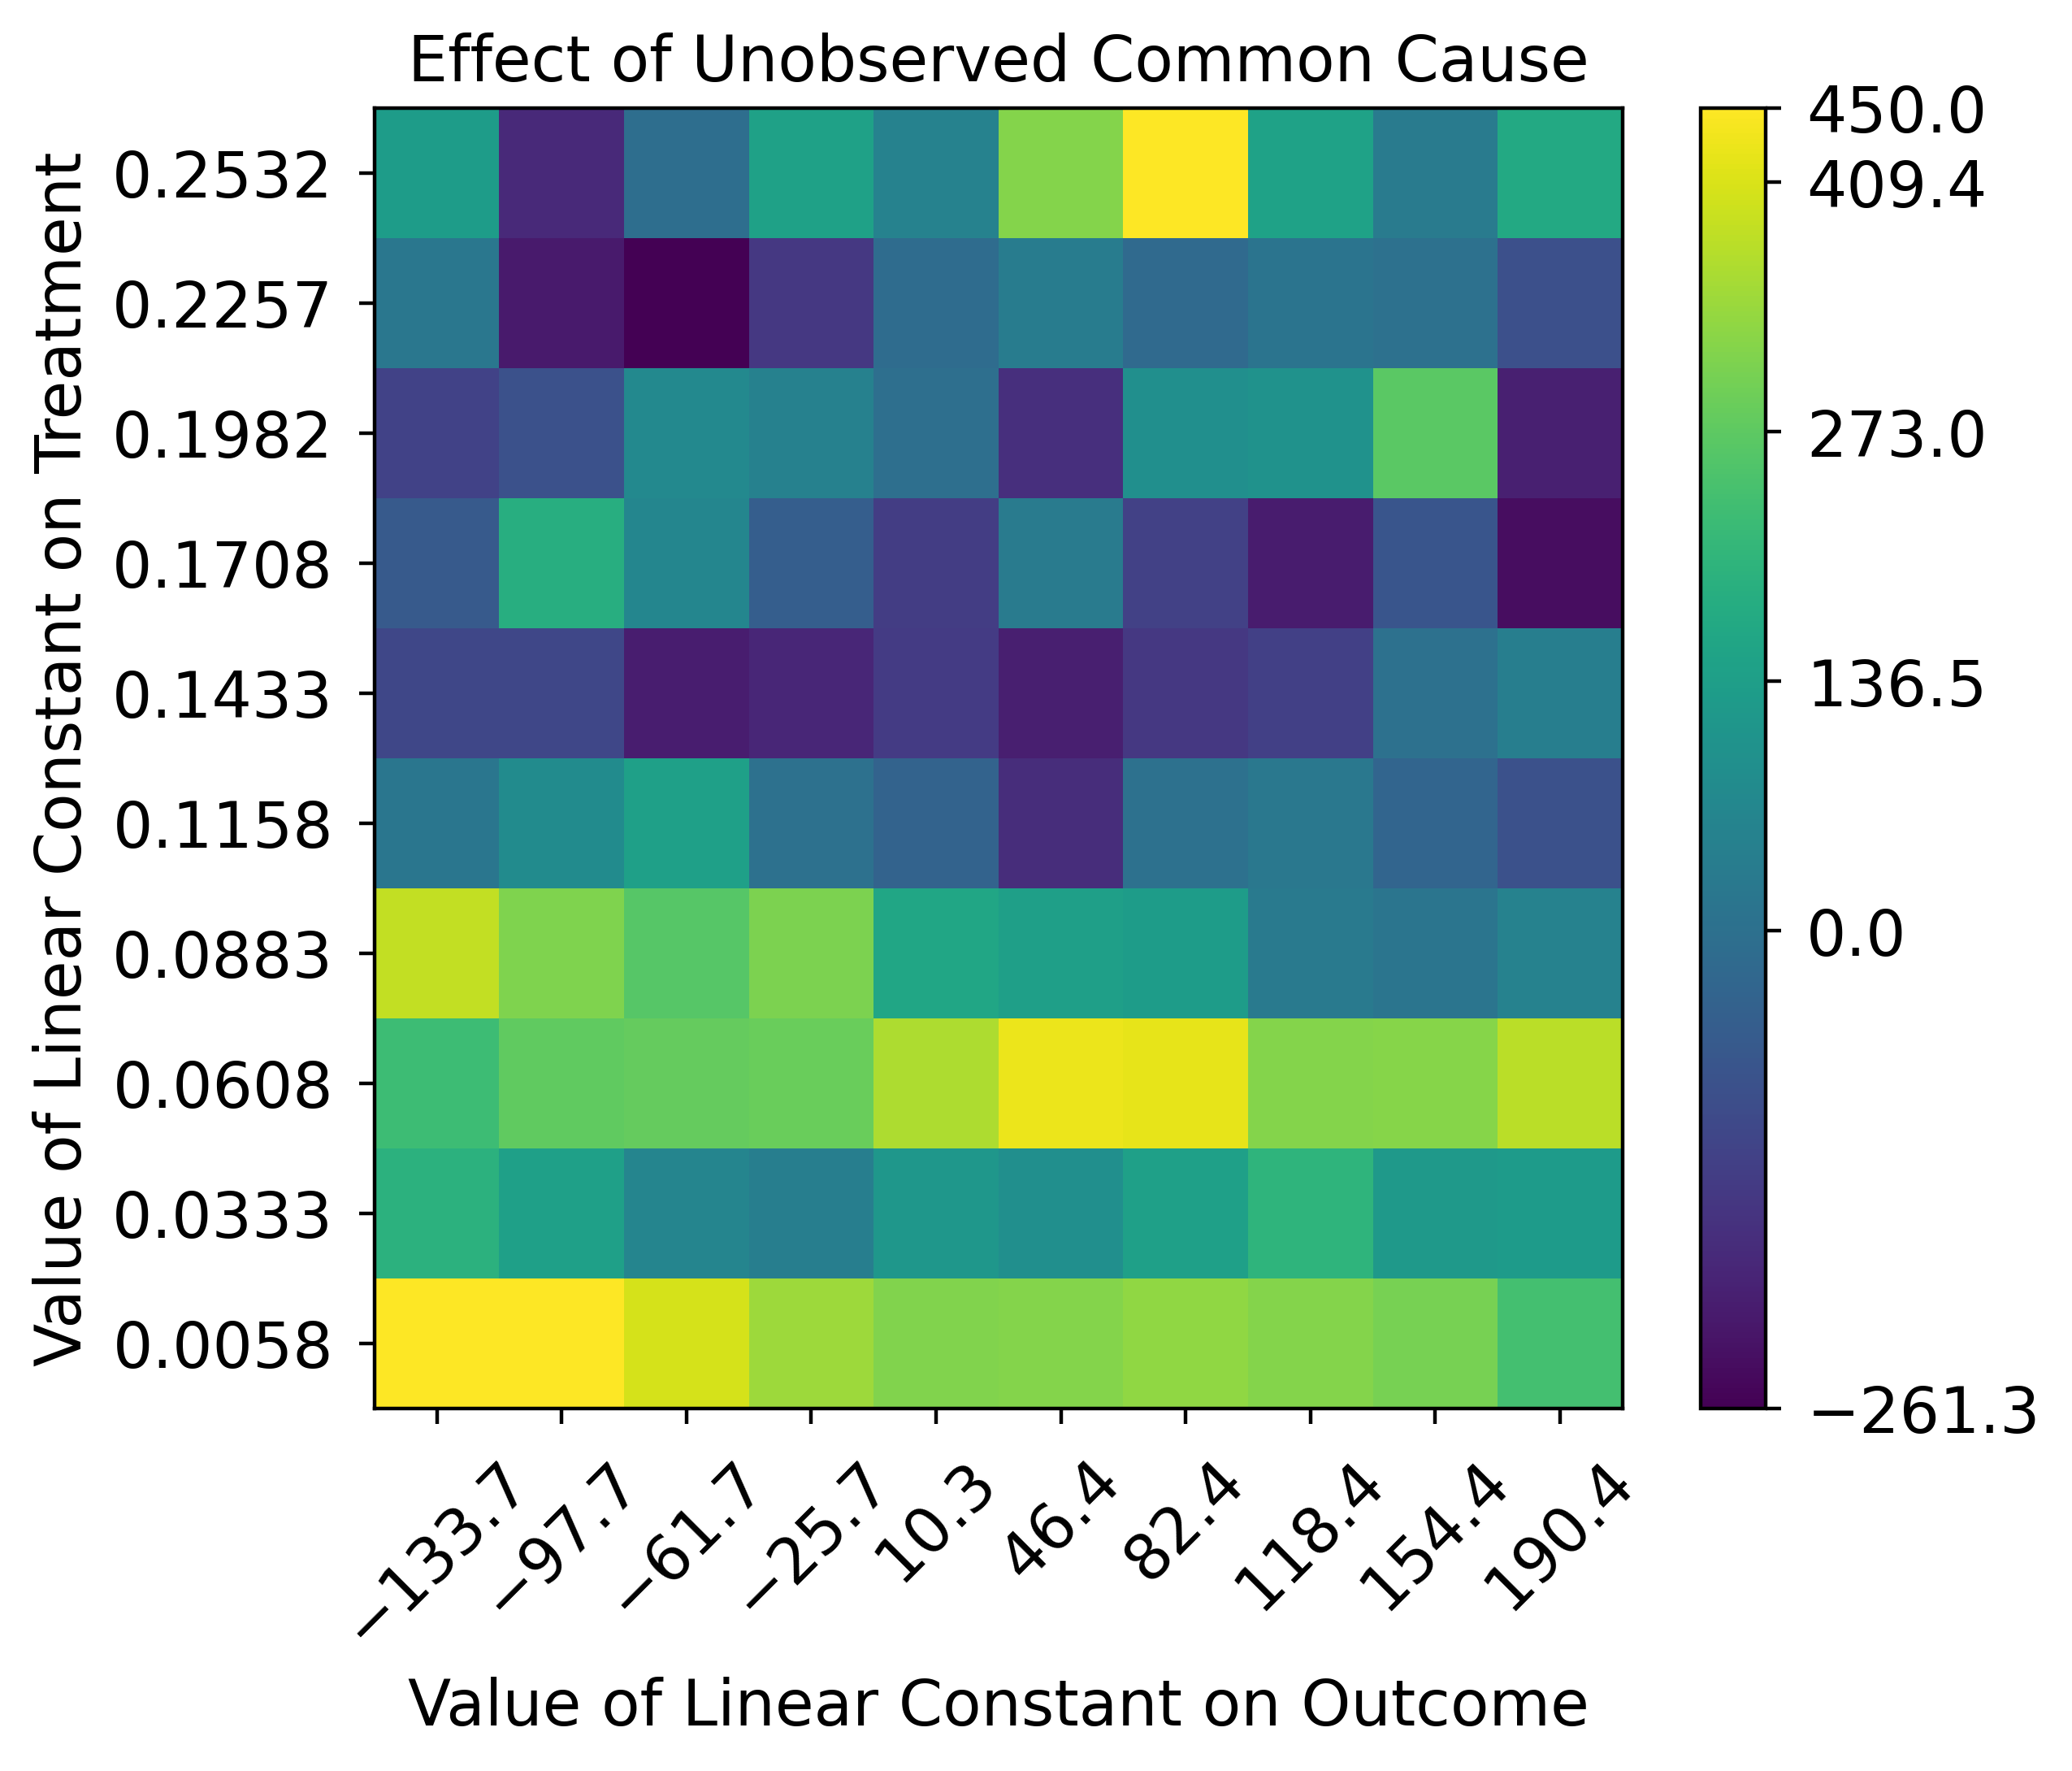

Refute: Add an Unobserved Common Cause
Estimated effect:545.9120996340839
New effect:(-261.27104264985746, 450.02451795766547)



In [438]:
res_unobserved_lin=model.refute_estimate(identified_estimand, causal_estimate_lin, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear", random_seed=42)
print(res_unobserved_lin)

In [439]:
# heatmap visualization with the values in the cells

# df_l = pd.DataFrame(res_unobserved_lin.new_effect_array)
# df_l = df_l.round(1)
# df_l= df_l.sort_index(ascending=False)
# df_l=df_l.astype(int)

# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(df_l, annot=True, fmt="d", linewidths=.5, ax=ax)
# # To display the heatmap 
# plt.show()


#### the mean ATE estimate of the corresponding heatmap

In [537]:
df_l = pd.DataFrame(res_unobserved_lin.new_effect_array)
df_l = df_l.round(1)
df_l= df_l.sort_index(ascending=False)
df_l=df_l.astype(int)
ucc_l=df_l.to_numpy().flatten().tolist()
np.mean(ucc_l)

#### Matching across confounders 

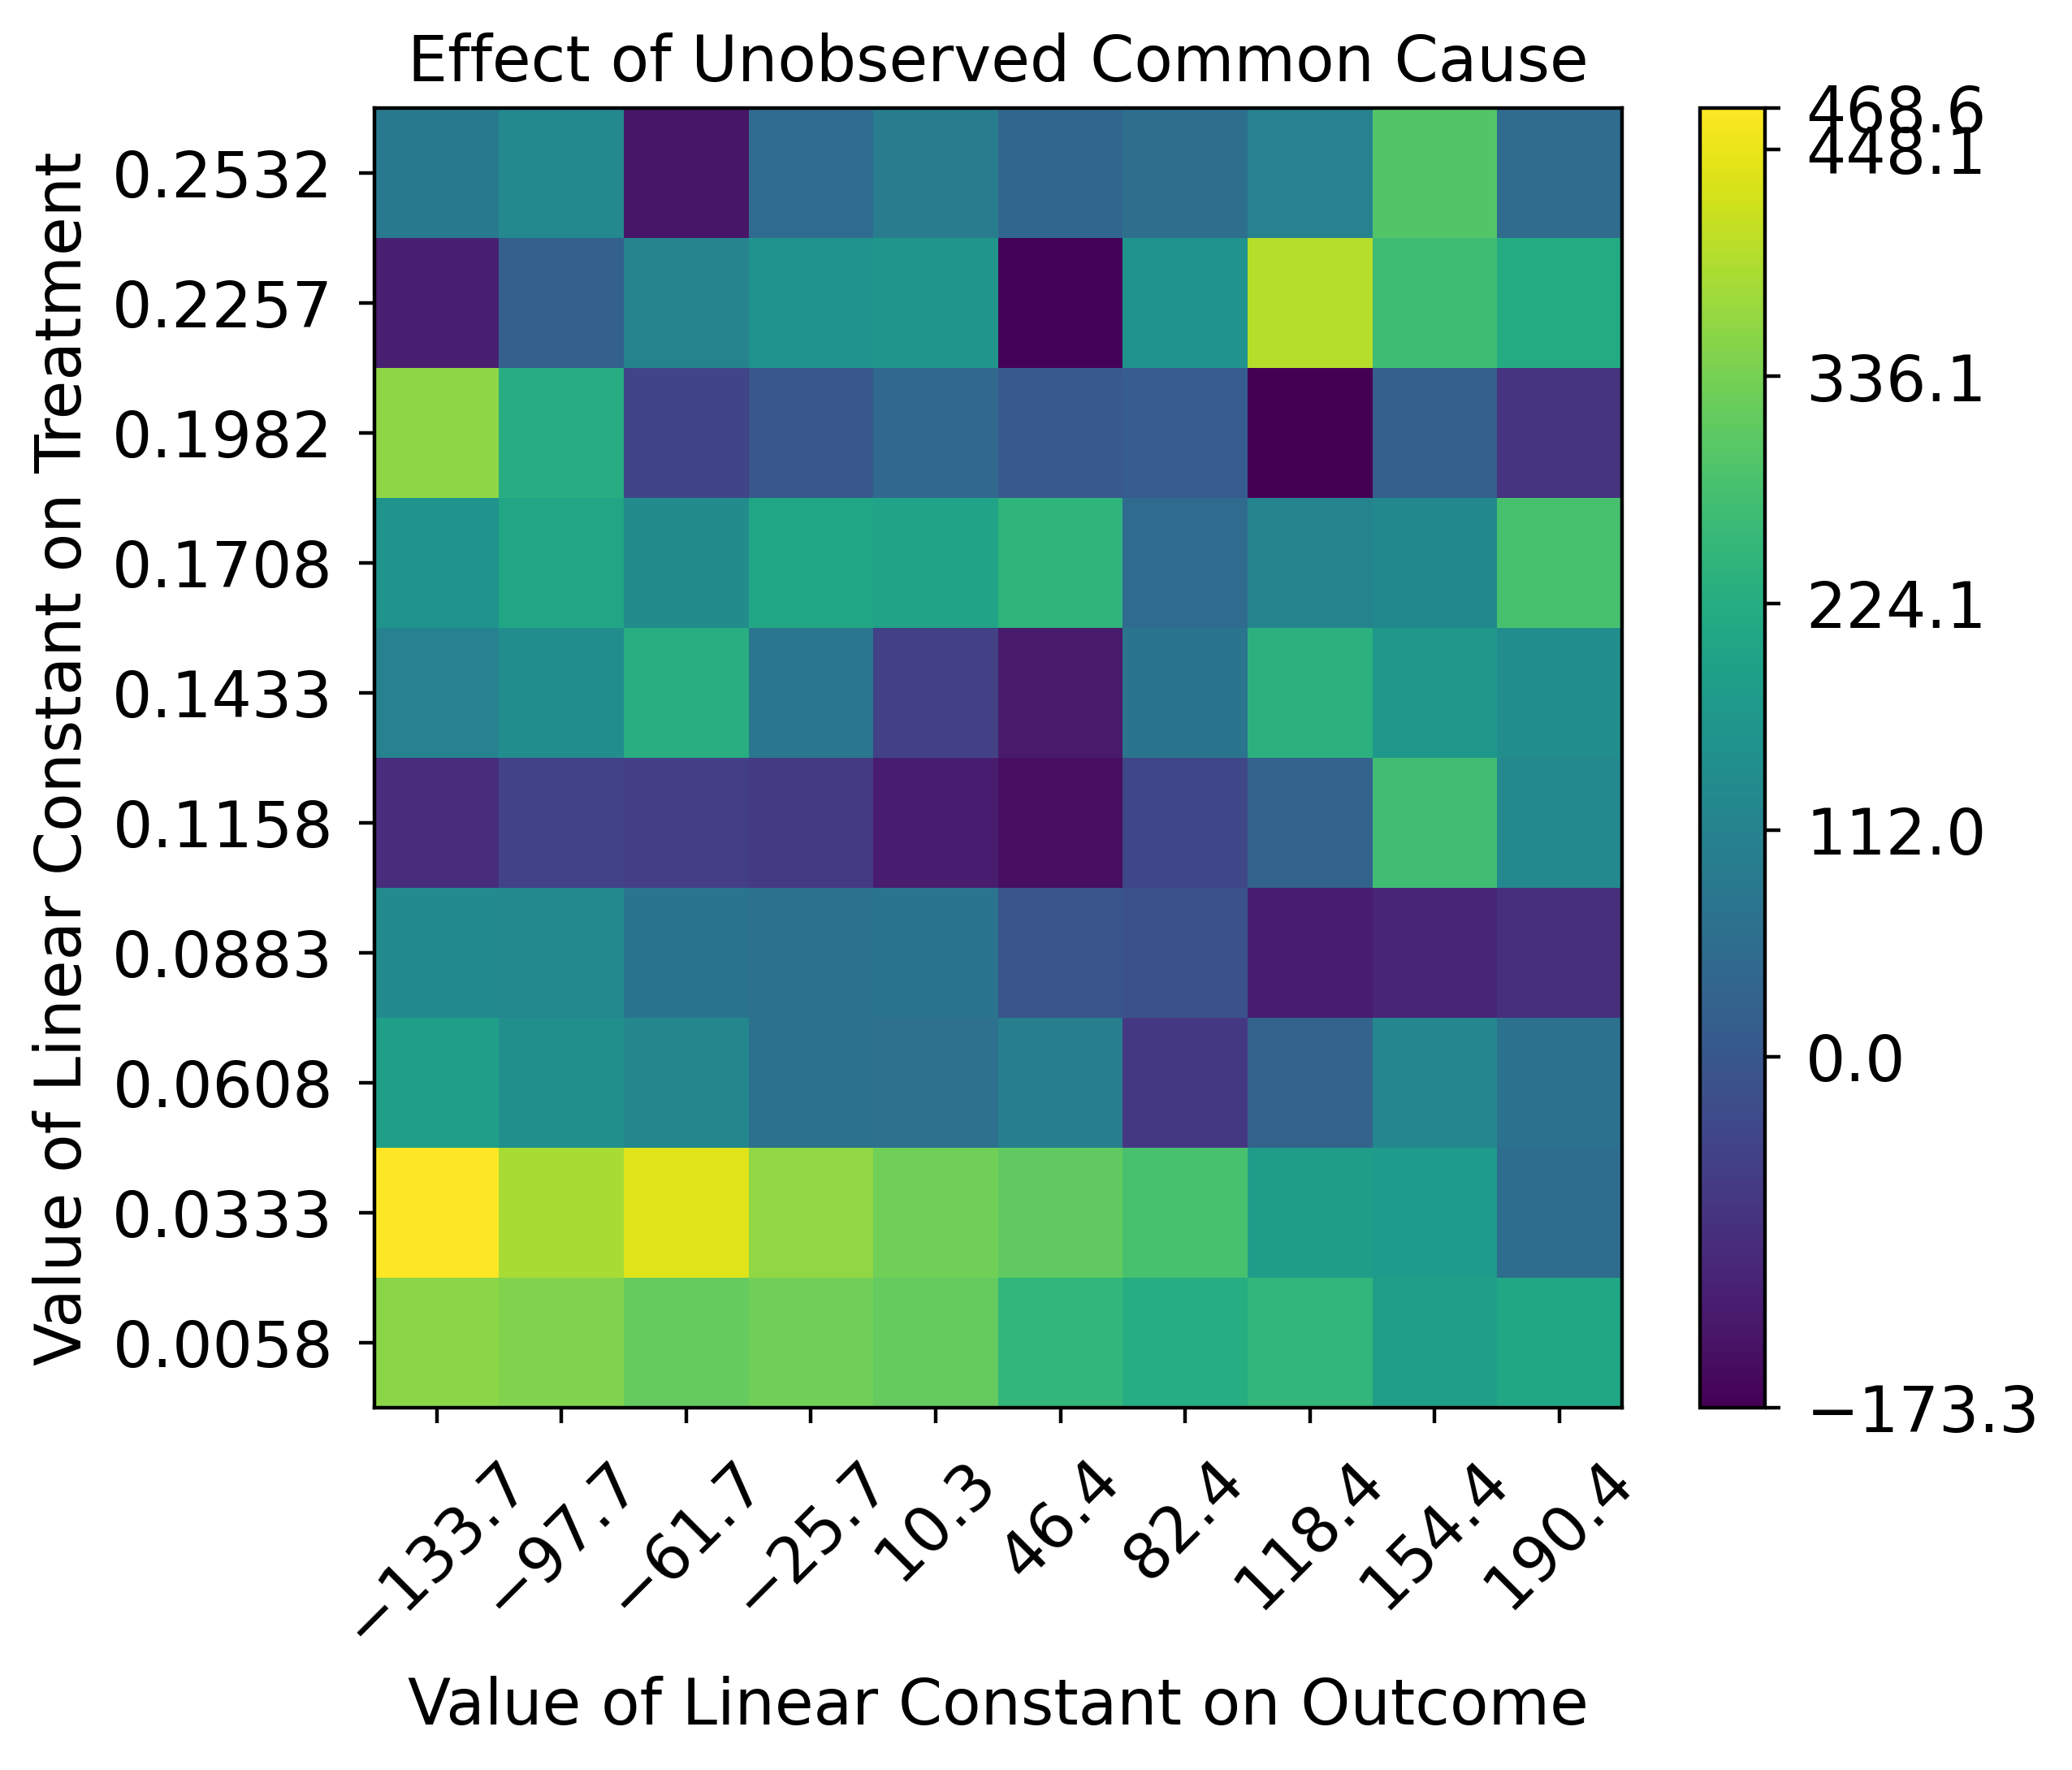

Refute: Add an Unobserved Common Cause
Estimated effect:448.12865497076024
New effect:(-173.26502054472408, 468.63268678598206)



In [440]:
res_unobserved_d=model.refute_estimate(identified_estimand, causal_estimate_d, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear", 
                                       random_seed=42)
print(res_unobserved_d)

In [441]:
# heatmap visualization with the values in the cells

# df_m = pd.DataFrame(res_unobserved_d.new_effect_array)
# df_m = df_m.round(1)
# df_m= df_m.sort_index(ascending=False)
# df_m=df_m.astype(int)

# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(df_m, annot=True, fmt="d", linewidths=.5, ax=ax)
# # To display the heatmap 
# plt.show()

#### the mean ATE estimate of the corresponding heatmap

In [536]:
df_m = pd.DataFrame(res_unobserved_d.new_effect_array)
df_m = df_m.round(1)
df_m= df_m.sort_index(ascending=False)
df_m=df_m.astype(int)
ucc_m=df_m.to_numpy().flatten().tolist()
np.mean(ucc_m)

#### IPS weighting

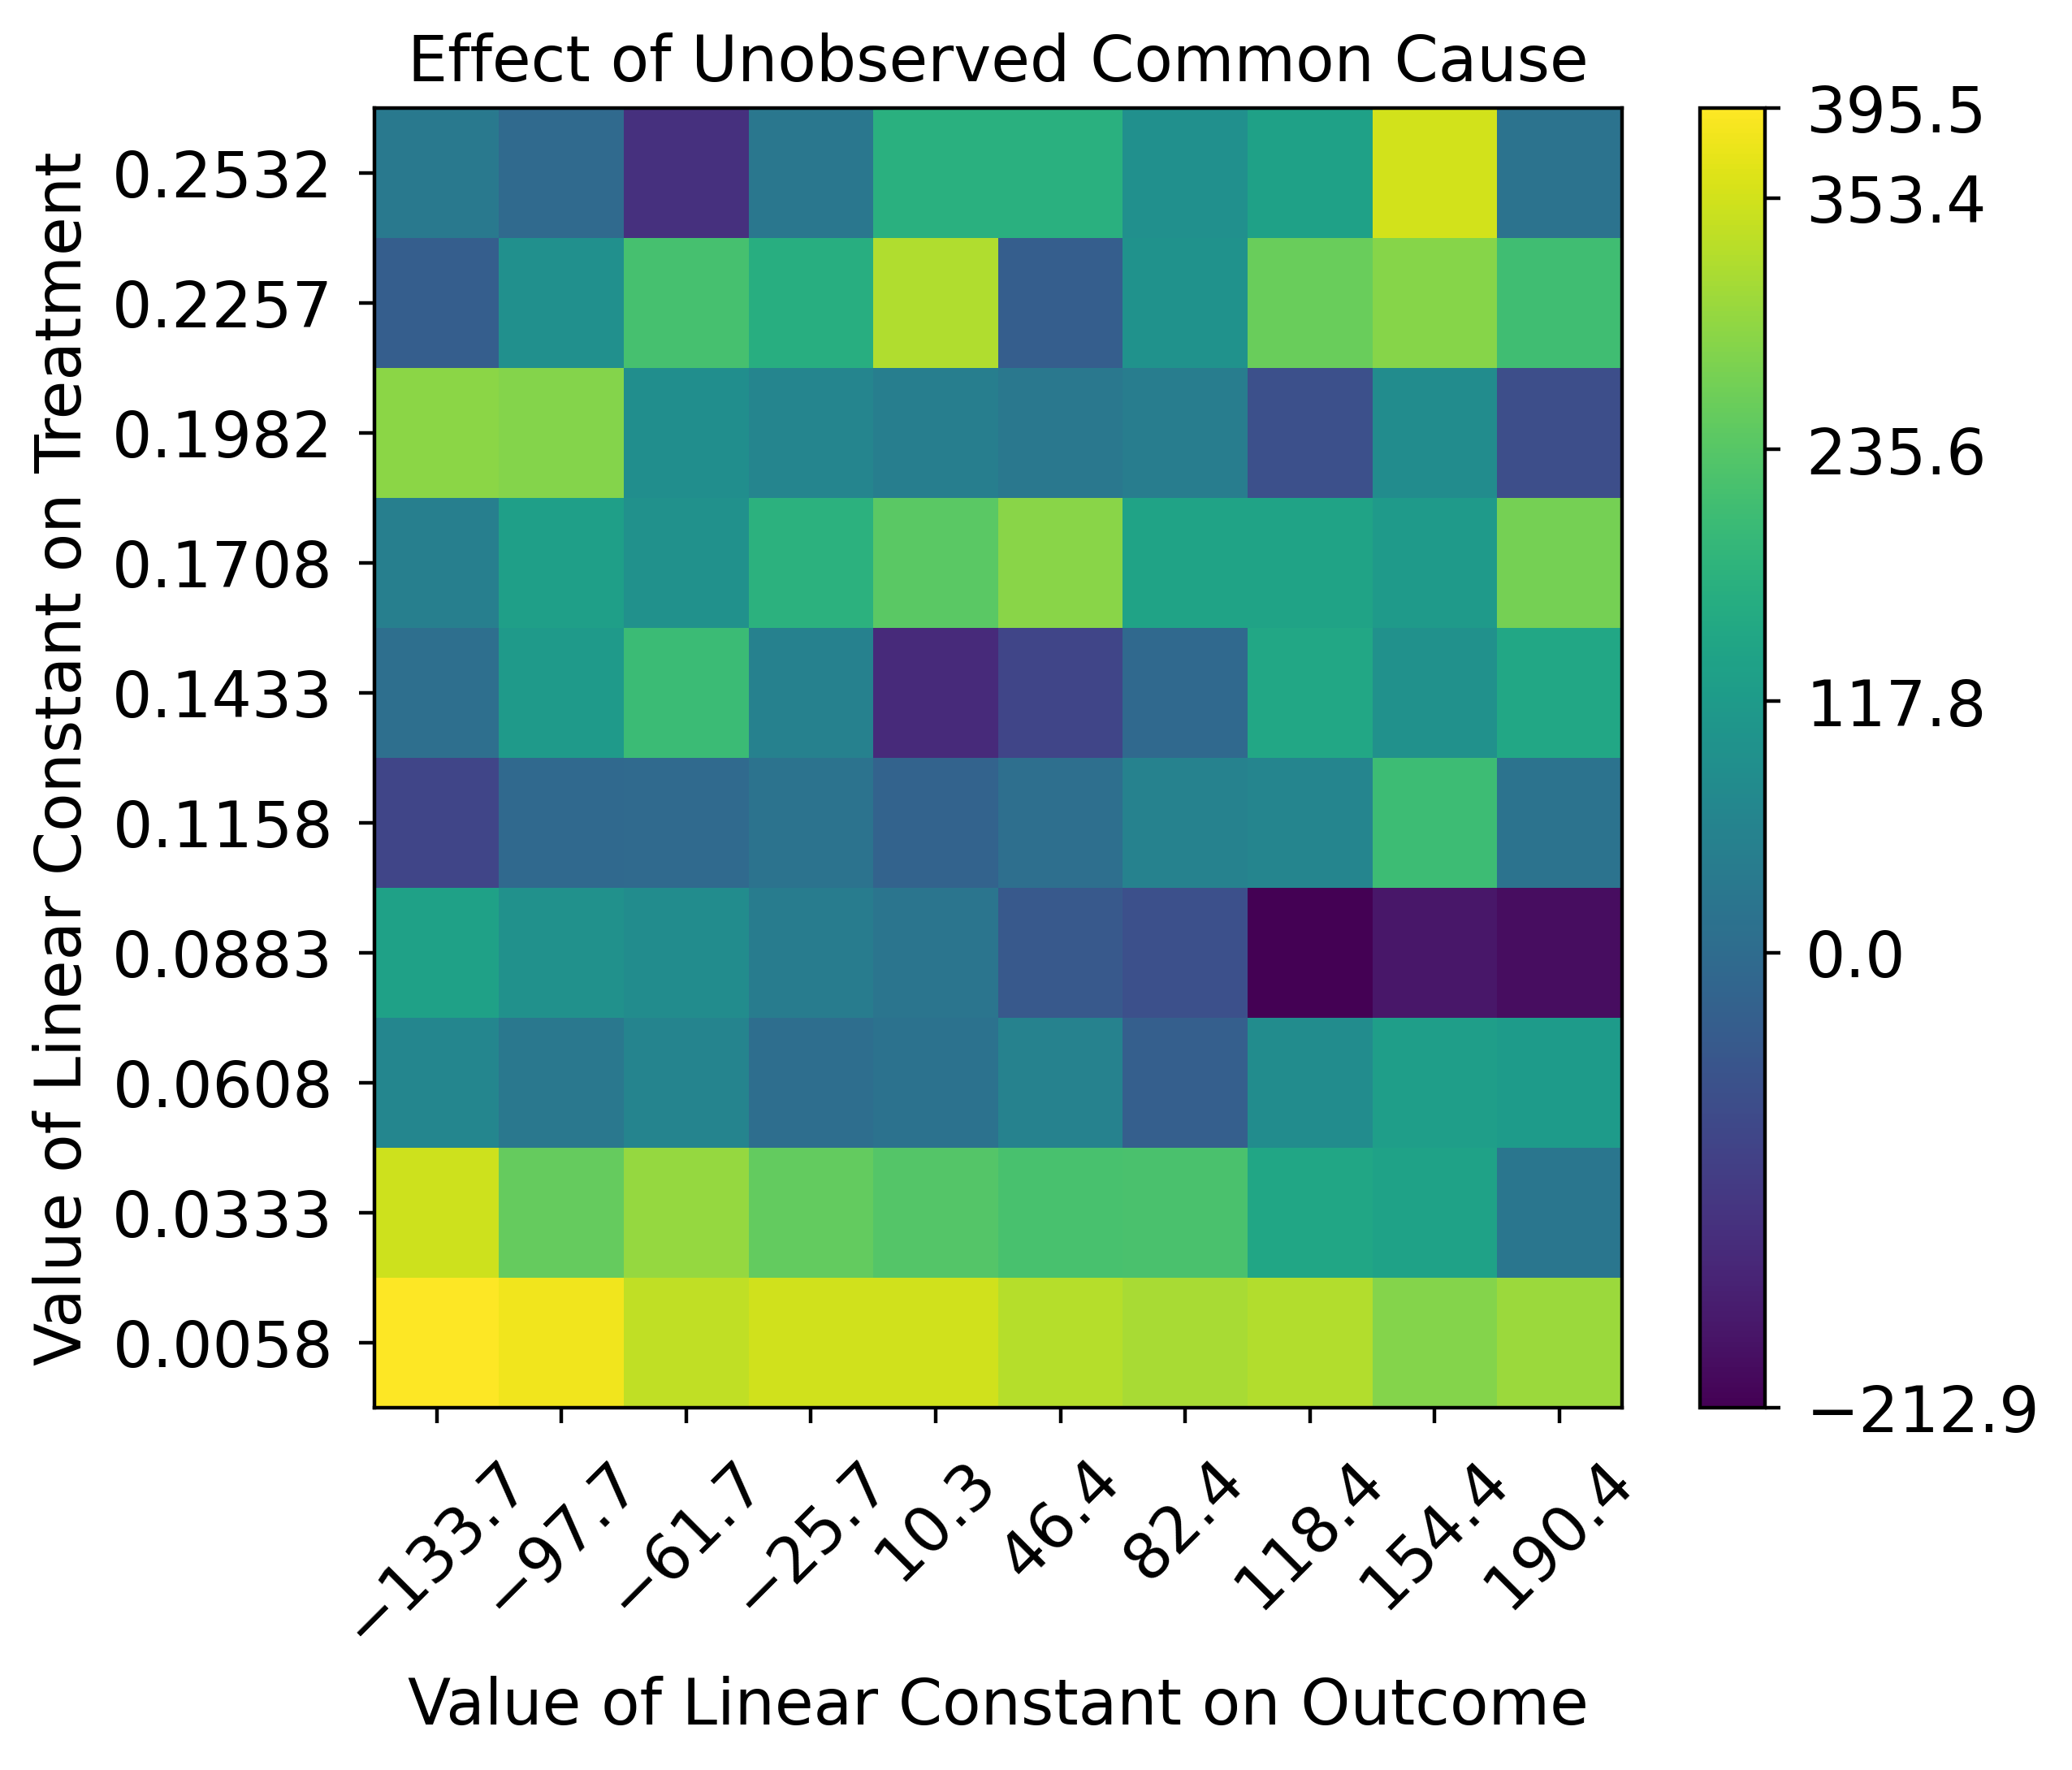

Refute: Add an Unobserved Common Cause
Estimated effect:471.1726278562837
New effect:(-212.92421804369815, 395.45736384790916)



In [442]:
res_unobserved_ipw_trim=model.refute_estimate(identified_estimand, causal_estimate_ipw_trim, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear", 
                                              random_seed=42)
print(res_unobserved_ipw_trim)

In [443]:
# heatmap visualization with the values in the cells

# df_ip = pd.DataFrame(res_unobserved_ipw_trim.new_effect_array)
# df_ip = df_ip.round(1)
# df_ip= df_ip.sort_index(ascending=False)
# df_ip=df_ip.astype(int)

# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(df_ip, annot=True, fmt="d", linewidths=.5, ax=ax)
# # To display the heatmap 
# plt.show()


#### the mean ATE estimate of the corresponding heatmap

In [535]:
df_ip = pd.DataFrame(res_unobserved_ipw_trim.new_effect_array)
df_ip = df_ip.round(1)
df_ip= df_ip.sort_index(ascending=False)
df_ip=df_ip.astype(int)
ucc_ip=df_ip.to_numpy().flatten().tolist()
np.mean(ucc_ip)

### Removing a random subset of the data
New effect should not change a lot

This class randomly keeps 80% of the data and re-estimates effects, 10 times.

```num_simulations``` overwrites the default ```CausalRefuter``` class ```DEFAULT_NUM_SIMULATIONS ``` which is 100.


#### Linear Regression

In [444]:
res_subset_lin=model.refute_estimate(identified_estimand, causal_estimate_lin,
        method_name="data_subset_refuter", subset_fraction=0.8,
        num_simulations=100, random_seed=42)
print(res_subset_lin)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

#### Matching across confounders 

In [445]:
res_subset_d=model.refute_estimate(identified_estimand, causal_estimate_d,
        method_name="data_subset_refuter", subset_fraction=0.8,
        num_simulations=100, random_seed=42)
print(res_subset_d)

Refute: Use a subset of data
Estimated effect:448.12865497076024
New effect:437.81824817518253
p value:0.48



#### IPS weighting

In [446]:
res_subset_ipw_trim=model.refute_estimate(identified_estimand, causal_estimate_ipw_trim,
        method_name="data_subset_refuter", subset_fraction=0.8,
        num_simulations=100, random_seed=42)
print(res_subset_ipw_trim)

Refute: Use a subset of data
Estimated effect:471.1726278562837
New effect:462.41048753786447
p value:0.45



## CausalML - Uber

In [447]:
from causalml.inference.meta import LRSRegressor

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor
import warnings

from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor, XGBRRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *
from causalml.inference.meta import TMLELearner

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

import causalml
print(causalml.__version__)

0.12.3


In [448]:
scaled.columns

Index(['id', 'ha', 'variety', 'sdate', 'hdate', 'yield21', 'lat', 'lon',
       'field_area', 'perimeter', 'ratio', 'prediction', 'HIGH', 'LOW',
       'clay_mean', 'sand_mean', 'silt_mean', 'occont_mean', 'var_code',
       'len_season', 'peak_ndvi', 'trapezoidal_ndvi_sow2harvest',
       'ndwi_sowingday', 'var_ARMONIA', 'var_CAMPO', 'var_DP_396',
       'var_DP_397', 'var_ELPIDA', 'var_ELSA', 'var_FIDEL', 'var_FLORA',
       'var_LIDER', 'var_OLIVIA', 'var_ST_318', 'var_ST_402', 'var_ST_463',
       'propensity_score_ipw', 'ips_weight', 'tips_weight', 'cips_weight',
       'ips_normalized_weight', 'tips_normalized_weight',
       'cips_normalized_weight', 'ips_stabilized_weight',
       'tips_stabilized_weight', 'cips_stabilized_weight', 'd_y', 'dbar_y',
       'prop_score_rounded'],
      dtype='object')

In [449]:
y=scaled["yield21"]
treatment=scaled["prediction"]
# X=scaled[["prop_score"]]

X=scaled[['ratio',
       'HIGH', 'LOW', 'clay_mean', 'sand_mean', 'silt_mean',
       'occont_mean', 
       'ndwi_sowingday', 'var_ARMONIA',
       'var_CAMPO', 'var_DP_396', 'var_DP_397', 'var_ELPIDA', 'var_ELSA',
       'var_FIDEL', 'var_FLORA', 'var_LIDER', 'var_OLIVIA', 'var_ST_318',
       'var_ST_402', 'var_ST_463']]
e=scaled["propensity_score_ipw"]

## T-Learner

Learn $Y$ from backdoor variables $W$ for $T=1$ with RF

learn $Y$ from backdoor variables $W$ for $T=0$ with RF

for all rows (feature vectors $W$), predict $Y$ from both models and subtract. This is the CATE estimate (explicit for meta-learners). average CATE estimates to get ATE estimate.

In [450]:
print('T-Learner')

# Calling the Base Learner class and feeding in RF
learner_t = BaseTRegressor(learner=RandomForestRegressor(random_state=42))
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using RF:')
print(ate_t)
print('ATE estimate: {:.03f}'.format(ate_t[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_t[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_t[2][0]))

T-Learner

Using the BaseTRegressor class and using RF:
(array([371.5497076]), array([214.91076234]), array([528.18865286]))
ATE estimate: 371.550
ATE lower bound: 214.911
ATE upper bound: 528.189


## X-Learner

SOTA meta-learner. 

see https://causalml.readthedocs.io/en/latest/causalml.html#causalml.inference.meta.BaseXLearner

An X-learner estimates treatment effects with four machine learning models.

Details of X-learner are available at Kunzel et al. (2018) (https://arxiv.org/abs/1706.03461).

In [451]:
print('X-Learner')

# Calling the Base Learner class and feeding in RF
learner_x = BaseXRegressor(learner=RandomForestRegressor(random_state=42))
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseXRegressor class and using RF:')
print(ate_x)
print('ATE estimate: {:.03f}'.format(ate_x[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_x[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_x[2][0]))

X-Learner

Using the BaseXRegressor class and using RF:
(array([437.17544592]), array([300.43401561]), array([573.91687623]))
ATE estimate: 437.175
ATE lower bound: 300.434
ATE upper bound: 573.917


## P-value of ATEs

as it is implemented by dowhy 0.7.1 for testing of causal estimate significance with minor changes in order to get causalml ATE

see function ```_test_significance_with_bootstrap``` 

https://py-why.github.io/dowhy/v0.8/_modules/dowhy/causal_estimator.html#CausalEstimator

In [452]:
def _test_significance_with_bootstrap(estimate_value, num_null_simulations=100,
                                      learner=BaseRRegressor(learner=RandomForestRegressor()),
                                      data=scaled,seed=42):
    """ Test statistical significance of an estimate using the bootstrap method.

    :param estimate_value: Obtained estimate's value
    :param num_null_simulations: Number of simulations for the null hypothesis
    :returns: p-value of the statistical significance test.
    """

    bootstrap_null_estimates=[]
    for r in tqdm.tqdm(range(num_null_simulations)):
        appended_data = []
        for i in range(data.shape[0]):
            # 1 random sampling per loop with replacement and append of list with random sample
            if(seed==None):
                appended_data.append(data.take(np.random.permutation(len(data))[:1]))
            else:
                appended_data.append(data.take(np.random.RandomState(seed=seed+r+i).permutation(len(data))[:1]))
        appended_data = pd.concat(appended_data)
        
        y=appended_data["yield21"]
        treatment=appended_data["prediction"]

        X=appended_data[['ratio',
               'HIGH', 'LOW', 'clay_mean', 'sand_mean', 'silt_mean',
               'occont_mean', 
               'ndwi_sowingday', 'var_ARMONIA',
               'var_CAMPO', 'var_DP_396', 'var_DP_397', 'var_ELPIDA', 'var_ELSA',
               'var_FIDEL', 'var_FLORA', 'var_LIDER', 'var_OLIVIA', 'var_ST_318',
               'var_ST_402', 'var_ST_463']]
        e=appended_data["propensity_score_ipw"]
        ate = learner.estimate_ate(X=X, treatment=treatment, y=y)
        bootstrap_null_estimates.append(ate[0][0])

    # Processing the null hypothesis estimates
    sorted_null_estimates = np.sort(bootstrap_null_estimates)
    median_estimate = sorted_null_estimates[int(num_null_simulations / 2)]
    # Doing a two-sided test
    if estimate_value > median_estimate:
        # Being conservative with the p-value reported
        estimate_index = np.searchsorted(sorted_null_estimates, estimate_value, side="left")
        p_value = 1 - (estimate_index / num_null_simulations)
    if estimate_value <= median_estimate:
        # Being conservative with the p-value reported
        estimate_index = np.searchsorted(sorted_null_estimates, estimate_value, side="right")
        p_value = (estimate_index / num_null_simulations)
    # If the estimate_index is 0, it depends on the number of simulations
    if p_value == 0:
        p_value = (0, 1 / len(sorted_null_estimates))  # a tuple determining the range.
    elif p_value == 1:
        p_value = (1 - 1 / len(sorted_null_estimates), 1)
    signif_dict = {
        'p_value': p_value
    }
    return signif_dict

In [453]:
# p-value of t-learner ATE

_test_significance_with_bootstrap(0, num_null_simulations=1000,
                                      learner=BaseTRegressor(learner=RandomForestRegressor(random_state=42)), data=scaled.copy())

100%|███████████████████████████████████████| 1000/1000 [09:02<00:00,  1.84it/s]


{'p_value': 0.024}

In [454]:
# p-value of x-learner ATE
# we get the next error because of seed
# OptimizationError: PIRLS optimization has diverged.
# Try increasing regularization, or specifying an initial value for self.coef_

# so we change the seed and reduce the simulations to 800
# seed=420

_test_significance_with_bootstrap(0, num_null_simulations=800,
                                      learner=BaseXRegressor(learner=RandomForestRegressor(random_state=42)), data=scaled.copy(), seed=420)

100%|█████████████████████████████████████████| 800/800 [21:15<00:00,  1.59s/it]


{'p_value': 0.005}

### functions for p-values calcuations for the Refutation Methods

as it is implemented by dowhy 0.7.1 for refutations with minor changes in order to get causalml ATE

see ```funtions perform_bootstrap_test```, ```perform_normal_distribution_test``` 

https://py-why.github.io/dowhy/v0.8/_modules/dowhy/causal_refuter.html#CausalRefuter.test_significance

In [455]:
# as it is implemented by dowhy 0.7.1 with minor changes in order to get causalml ATE

def perform_bootstrap_test(estimate, simulations):

    # Get the number of simulations
    num_simulations = len(simulations)
    # Sort the simulations
    simulations.sort()
    # Obtain the median value
    median_refute_values = simulations[int(num_simulations/2)]

    # Performing a two sided test
    if np.mean(estimate) > median_refute_values:
        # np.searchsorted tells us the index if it were a part of the array
        # We select side to be left as we want to find the first value that matches
        estimate_index = np.searchsorted(simulations, np.mean(estimate), side="left")
        # We subtact 1 as we are finding the value from the right tail
        p_value = 1 - (estimate_index/ num_simulations)
#         print(1)
    else:
        # We take the side to be right as we want to find the last index that matches
        estimate_index = np.searchsorted(simulations, np.mean(estimate), side="right")
        # We get the probability with respect to the left tail.
        p_value = estimate_index / num_simulations
    # return twice the determined quantile as this is a two sided test
    return p_value

In [456]:
# as it is implemented by dowhy 0.7.1 with minor changes in order to get causalml ATE

import scipy.stats as st

def perform_normal_distribution_test(estimate, simulations):
    # Get the mean for the simulations
    mean_refute_values = np.mean(simulations)
    # Get the standard deviation for the simulations
    std_dev_refute_values = np.std(simulations)
    # Get the Z Score [(val - mean)/ std_dev ]
    z_score = (np.mean(estimate) - mean_refute_values)/ std_dev_refute_values


    if z_score > 0: # Right Tail
        p_value = 1 - st.norm.cdf(z_score)
    else: # Left Tail
        p_value = st.norm.cdf(z_score)

    return p_value

## Placebo

In [457]:
placebo=scaled.copy()
placebo

,id,ha,variety,sdate,hdate,yield21,lat,lon,field_area,perimeter,...,cips_weight,ips_normalized_weight,tips_normalized_weight,cips_normalized_weight,ips_stabilized_weight,tips_stabilized_weight,cips_stabilized_weight,d_y,dbar_y,prop_score_rounded
0,80,1.80,ARMONIA,2021-04-04,2021-09-27,2400.0,38.523236,22.959435,18165.260882,563.232015,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3000.000000,0.0
1,228,0.20,ST_402,2021-04-10,2021-09-27,3200.0,38.531556,22.961721,2063.889893,240.556938,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,4000.000000,0.0
2,233,0.55,ST_402,2021-04-10,2021-09-27,2800.0,38.532873,22.961703,5531.405407,309.982360,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3500.000000,0.0
3,230,0.55,ST_402,2021-04-10,2021-09-27,2880.0,38.530406,22.961877,5601.051971,304.249968,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3600.000000,0.0
4,3,2.48,FIDEL,2021-04-11,2021-09-29,3060.0,38.517362,22.994160,25073.825897,646.851305,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3825.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,66,0.26,FIDEL,2021-05-06,2021-09-20,3000.0,38.495017,22.999464,2627.641135,216.322055,...,1.0,0.006857,0.004170,0.008264,0.894589,0.186987,0.707602,0.0,3792.761502,0.0
167,206,0.97,ST_402,2021-05-07,2021-09-10,2000.0,38.522107,22.996148,9800.293064,432.194959,...,1.0,0.027119,0.063116,0.008264,3.538012,2.830409,0.707602,0.0,10000.000000,1.0
168,207,0.96,FIDEL,2021-05-07,2021-09-15,3300.0,38.521262,22.976469,9769.742396,513.276405,...,1.0,0.013224,0.022694,0.008264,1.725322,1.017720,0.707602,0.0,8046.273906,1.0
169,204,1.82,FIDEL,2021-05-07,2021-09-15,2700.0,38.497463,22.969979,18396.943625,661.104653,...,1.0,0.011466,0.017577,0.008264,1.495853,0.788251,0.707602,0.0,5707.730849,1.0


In [458]:
y=placebo["yield21"]
treatment=placebo["prediction"]

X=placebo[['ratio',
       'HIGH', 'LOW', 'clay_mean', 'sand_mean', 'silt_mean',
       'occont_mean', 
       'ndwi_sowingday', 'var_ARMONIA',
       'var_CAMPO', 'var_DP_396', 'var_DP_397', 'var_ELPIDA', 'var_ELSA',
       'var_FIDEL', 'var_FLORA', 'var_LIDER', 'var_OLIVIA', 'var_ST_318',
       'var_ST_402', 'var_ST_463']]
e=placebo["propensity_score_ipw"]

ate_t_pla=[]
ate_x_pla=[]
ate_r_pla=[]

for n in tqdm.tqdm(range(100)):
    # we permute in each run the treatment
    placebo.prediction = np.random.RandomState(seed=42+n).permutation(placebo.prediction)
    treatment=placebo["prediction"]
       
    # Calling the Base Learner class and feeding in RF
    learner_t = BaseTRegressor(learner=RandomForestRegressor(random_state=42))
    ate_t_p = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
    print('\nUsing the BaseTRegressor class and using RF:')
    print(ate_t_p)
    print('ATE estimate: {:.03f}'.format(ate_t_p[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_t_p[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_t_p[2][0]))
    ate_t_pla.append(ate_t_p[0][0])
    
    # Calling the Base Learner class and feeding in RF
    learner_x = BaseXRegressor(learner=RandomForestRegressor(random_state=42))
    ate_x_p = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
    print('\nUsing the BaseXRegressor class and using RF:')
    print(ate_x_p)
    print('ATE estimate: {:.03f}'.format(ate_x_p[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_x_p[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_x_p[2][0]))
    ate_x_pla.append(ate_x_p[0][0])
    
    # Calling the Base Learner class and feeding in RF
    learner_r = BaseRRegressor(learner=RandomForestRegressor(random_state=42), random_state=42)
    ate_r_p = learner_r.estimate_ate(X=X, treatment=treatment, y=y, p=e)
    print('\nUsing the BaseRRegressor class and using RF:')
    print(ate_r_p)
    print('ATE estimate: {:.03f}'.format(ate_r_p[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_r_p[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_r_p[2][0]))
    ate_r_pla.append(ate_r_p[0][0])

  0%|                                                   | 0/100 [00:00<?, ?it/s]


Using the BaseTRegressor class and using RF:
(array([-131.24619883]), array([-272.74983016]), array([10.2574325]))
ATE estimate: -131.246
ATE lower bound: -272.750
ATE upper bound: 10.257

Using the BaseXRegressor class and using RF:
(array([-208.26697856]), array([-331.05964394]), array([-85.47431318]))
ATE estimate: -208.267
ATE lower bound: -331.060
ATE upper bound: -85.474


  1%|▍                                          | 1/100 [00:12<21:01, 12.74s/it]


Using the BaseRRegressor class and using RF:
(array([-170.8350055]), array([-202.41308181]), array([-139.25692919]))
ATE estimate: -170.835
ATE lower bound: -202.413
ATE upper bound: -139.257

Using the BaseTRegressor class and using RF:
(array([-46.25321637]), array([-196.74114123]), array([104.23470848]))
ATE estimate: -46.253
ATE lower bound: -196.741
ATE upper bound: 104.235

Using the BaseXRegressor class and using RF:
(array([-52.1076979]), array([-183.56859229]), array([79.35319649]))
ATE estimate: -52.108
ATE lower bound: -183.569
ATE upper bound: 79.353


  2%|▊                                          | 2/100 [00:16<11:52,  7.27s/it]


Using the BaseRRegressor class and using RF:
(array([31.58541171]), array([-3.49753854]), array([66.66836196]))
ATE estimate: 31.585
ATE lower bound: -3.498
ATE upper bound: 66.668

Using the BaseTRegressor class and using RF:
(array([315.94619883]), array([149.30606378]), array([482.58633388]))
ATE estimate: 315.946
ATE lower bound: 149.306
ATE upper bound: 482.586

Using the BaseXRegressor class and using RF:
(array([315.16608351]), array([160.45940008]), array([469.87276694]))
ATE estimate: 315.166
ATE lower bound: 160.459
ATE upper bound: 469.873


  3%|█▎                                         | 3/100 [00:18<08:27,  5.23s/it]


Using the BaseRRegressor class and using RF:
(array([231.28215997]), array([195.14052881]), array([267.42379113]))
ATE estimate: 231.282
ATE lower bound: 195.141
ATE upper bound: 267.424

Using the BaseTRegressor class and using RF:
(array([89.40116959]), array([-64.1207435]), array([242.92308268]))
ATE estimate: 89.401
ATE lower bound: -64.121
ATE upper bound: 242.923

Using the BaseXRegressor class and using RF:
(array([84.24892784]), array([-47.56518951]), array([216.0630452]))
ATE estimate: 84.249
ATE lower bound: -47.565
ATE upper bound: 216.063


  4%|█▋                                         | 4/100 [00:21<06:49,  4.26s/it]


Using the BaseRRegressor class and using RF:
(array([56.82893112]), array([20.85559634]), array([92.80226589]))
ATE estimate: 56.829
ATE lower bound: 20.856
ATE upper bound: 92.802

Using the BaseTRegressor class and using RF:
(array([198.55263158]), array([18.05802535]), array([379.04723781]))
ATE estimate: 198.553
ATE lower bound: 18.058
ATE upper bound: 379.047

Using the BaseXRegressor class and using RF:
(array([207.73549905]), array([41.13402096]), array([374.33697714]))
ATE estimate: 207.735
ATE lower bound: 41.134
ATE upper bound: 374.337


  5%|██▏                                        | 5/100 [00:24<05:41,  3.59s/it]


Using the BaseRRegressor class and using RF:
(array([19.99153191]), array([-15.11564455]), array([55.09870837]))
ATE estimate: 19.992
ATE lower bound: -15.116
ATE upper bound: 55.099

Using the BaseTRegressor class and using RF:
(array([24.89532164]), array([-109.35982209]), array([159.15046537]))
ATE estimate: 24.895
ATE lower bound: -109.360
ATE upper bound: 159.150

Using the BaseXRegressor class and using RF:
(array([13.59121627]), array([-94.62600416]), array([121.8084367]))
ATE estimate: 13.591
ATE lower bound: -94.626
ATE upper bound: 121.808


  6%|██▌                                        | 6/100 [00:26<04:53,  3.12s/it]


Using the BaseRRegressor class and using RF:
(array([36.98224714]), array([5.44116408]), array([68.5233302]))
ATE estimate: 36.982
ATE lower bound: 5.441
ATE upper bound: 68.523

Using the BaseTRegressor class and using RF:
(array([98.82982456]), array([-64.37132749]), array([262.03097662]))
ATE estimate: 98.830
ATE lower bound: -64.371
ATE upper bound: 262.031

Using the BaseXRegressor class and using RF:
(array([103.1597936]), array([-43.41044843]), array([249.73003562]))
ATE estimate: 103.160
ATE lower bound: -43.410
ATE upper bound: 249.730


  7%|███                                        | 7/100 [00:28<04:23,  2.83s/it]


Using the BaseRRegressor class and using RF:
(array([281.36005206]), array([248.01088314]), array([314.70922097]))
ATE estimate: 281.360
ATE lower bound: 248.011
ATE upper bound: 314.709

Using the BaseTRegressor class and using RF:
(array([-8.36959064]), array([-159.93584285]), array([143.19666156]))
ATE estimate: -8.370
ATE lower bound: -159.936
ATE upper bound: 143.197

Using the BaseXRegressor class and using RF:
(array([-42.01102368]), array([-177.79061685]), array([93.7685695]))
ATE estimate: -42.011
ATE lower bound: -177.791
ATE upper bound: 93.769


  8%|███▍                                       | 8/100 [00:31<04:10,  2.72s/it]


Using the BaseRRegressor class and using RF:
(array([51.3592261]), array([17.71426902]), array([85.00418318]))
ATE estimate: 51.359
ATE lower bound: 17.714
ATE upper bound: 85.004

Using the BaseTRegressor class and using RF:
(array([-201.53859649]), array([-349.19861668]), array([-53.8785763]))
ATE estimate: -201.539
ATE lower bound: -349.199
ATE upper bound: -53.879

Using the BaseXRegressor class and using RF:
(array([-191.69771984]), array([-316.06940334]), array([-67.32603634]))
ATE estimate: -191.698
ATE lower bound: -316.069
ATE upper bound: -67.326


  9%|███▊                                       | 9/100 [00:33<03:53,  2.57s/it]


Using the BaseRRegressor class and using RF:
(array([-259.87116926]), array([-293.95707936]), array([-225.78525916]))
ATE estimate: -259.871
ATE lower bound: -293.957
ATE upper bound: -225.785

Using the BaseTRegressor class and using RF:
(array([151.5380117]), array([1.37033297]), array([301.70569042]))
ATE estimate: 151.538
ATE lower bound: 1.370
ATE upper bound: 301.706

Using the BaseXRegressor class and using RF:
(array([156.24016461]), array([25.74707174]), array([286.73325748]))
ATE estimate: 156.240
ATE lower bound: 25.747
ATE upper bound: 286.733


 10%|████▏                                     | 10/100 [00:35<03:45,  2.50s/it]


Using the BaseRRegressor class and using RF:
(array([-13.58961437]), array([-48.32652801]), array([21.14729927]))
ATE estimate: -13.590
ATE lower bound: -48.327
ATE upper bound: 21.147

Using the BaseTRegressor class and using RF:
(array([-107.53508772]), array([-253.52034686]), array([38.45017142]))
ATE estimate: -107.535
ATE lower bound: -253.520
ATE upper bound: 38.450

Using the BaseXRegressor class and using RF:
(array([-113.54644894]), array([-239.23583664]), array([12.14293875]))
ATE estimate: -113.546
ATE lower bound: -239.236
ATE upper bound: 12.143


 11%|████▌                                     | 11/100 [00:37<03:36,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([-193.3809368]), array([-227.17312188]), array([-159.58875172]))
ATE estimate: -193.381
ATE lower bound: -227.173
ATE upper bound: -159.589

Using the BaseTRegressor class and using RF:
(array([283.45321637]), array([131.84625077]), array([435.06018198]))
ATE estimate: 283.453
ATE lower bound: 131.846
ATE upper bound: 435.060

Using the BaseXRegressor class and using RF:
(array([304.32623754]), array([170.94468266]), array([437.70779243]))
ATE estimate: 304.326
ATE lower bound: 170.945
ATE upper bound: 437.708


 12%|█████                                     | 12/100 [00:40<03:25,  2.34s/it]


Using the BaseRRegressor class and using RF:
(array([330.03819677]), array([296.4059026]), array([363.67049093]))
ATE estimate: 330.038
ATE lower bound: 296.406
ATE upper bound: 363.670

Using the BaseTRegressor class and using RF:
(array([83.96549708]), array([-73.16953417]), array([241.10052832]))
ATE estimate: 83.965
ATE lower bound: -73.170
ATE upper bound: 241.101

Using the BaseXRegressor class and using RF:
(array([80.40857538]), array([-56.20324332]), array([217.02039407]))
ATE estimate: 80.409
ATE lower bound: -56.203
ATE upper bound: 217.020


 13%|█████▍                                    | 13/100 [00:42<03:37,  2.50s/it]


Using the BaseRRegressor class and using RF:
(array([133.05821335]), array([98.23088899]), array([167.8855377]))
ATE estimate: 133.058
ATE lower bound: 98.231
ATE upper bound: 167.886

Using the BaseTRegressor class and using RF:
(array([138.72807018]), array([-12.4064053]), array([289.86254565]))
ATE estimate: 138.728
ATE lower bound: -12.406
ATE upper bound: 289.863

Using the BaseXRegressor class and using RF:
(array([150.25285671]), array([19.69600556]), array([280.80970786]))
ATE estimate: 150.253
ATE lower bound: 19.696
ATE upper bound: 280.810


 14%|█████▉                                    | 14/100 [00:45<03:29,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([64.21885397]), array([28.79151554]), array([99.6461924]))
ATE estimate: 64.219
ATE lower bound: 28.792
ATE upper bound: 99.646

Using the BaseTRegressor class and using RF:
(array([0.20467836]), array([-147.10020338]), array([147.50956011]))
ATE estimate: 0.205
ATE lower bound: -147.100
ATE upper bound: 147.510

Using the BaseXRegressor class and using RF:
(array([-24.23111741]), array([-150.54002562]), array([102.07779081]))
ATE estimate: -24.231
ATE lower bound: -150.540
ATE upper bound: 102.078


 15%|██████▎                                   | 15/100 [00:47<03:22,  2.38s/it]


Using the BaseRRegressor class and using RF:
(array([-83.54048526]), array([-118.74550988]), array([-48.33546065]))
ATE estimate: -83.540
ATE lower bound: -118.746
ATE upper bound: -48.335

Using the BaseTRegressor class and using RF:
(array([230.4754386]), array([64.76887403]), array([396.18200316]))
ATE estimate: 230.475
ATE lower bound: 64.769
ATE upper bound: 396.182

Using the BaseXRegressor class and using RF:
(array([231.28758904]), array([80.80321066]), array([381.77196742]))
ATE estimate: 231.288
ATE lower bound: 80.803
ATE upper bound: 381.772


 16%|██████▋                                   | 16/100 [00:49<03:19,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([245.21586278]), array([211.1752296]), array([279.25649595]))
ATE estimate: 245.216
ATE lower bound: 211.175
ATE upper bound: 279.256

Using the BaseTRegressor class and using RF:
(array([27.82690058]), array([-108.50730931]), array([164.16111048]))
ATE estimate: 27.827
ATE lower bound: -108.507
ATE upper bound: 164.161

Using the BaseXRegressor class and using RF:
(array([-62.64041302]), array([-182.0056552]), array([56.72482916]))
ATE estimate: -62.640
ATE lower bound: -182.006
ATE upper bound: 56.725


 17%|███████▏                                  | 17/100 [00:52<03:22,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([-67.09595157]), array([-99.09043624]), array([-35.1014669]))
ATE estimate: -67.096
ATE lower bound: -99.090
ATE upper bound: -35.101

Using the BaseTRegressor class and using RF:
(array([-91.38479532]), array([-246.36166968]), array([63.59207904]))
ATE estimate: -91.385
ATE lower bound: -246.362
ATE upper bound: 63.592

Using the BaseXRegressor class and using RF:
(array([-135.15632401]), array([-274.28555357]), array([3.97290554]))
ATE estimate: -135.156
ATE lower bound: -274.286
ATE upper bound: 3.973


 18%|███████▌                                  | 18/100 [00:54<03:19,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([-79.56489095]), array([-112.32362757]), array([-46.80615433]))
ATE estimate: -79.565
ATE lower bound: -112.324
ATE upper bound: -46.806

Using the BaseTRegressor class and using RF:
(array([178.35146199]), array([50.71345345]), array([305.98947053]))
ATE estimate: 178.351
ATE lower bound: 50.713
ATE upper bound: 305.989

Using the BaseXRegressor class and using RF:
(array([161.411911]), array([56.49541461]), array([266.32840738]))
ATE estimate: 161.412
ATE lower bound: 56.495
ATE upper bound: 266.328


 19%|███████▉                                  | 19/100 [00:57<03:14,  2.40s/it]


Using the BaseRRegressor class and using RF:
(array([144.26331359]), array([112.79092247]), array([175.73570472]))
ATE estimate: 144.263
ATE lower bound: 112.791
ATE upper bound: 175.736

Using the BaseTRegressor class and using RF:
(array([45.25614035]), array([-108.19033605]), array([198.70261675]))
ATE estimate: 45.256
ATE lower bound: -108.190
ATE upper bound: 198.703

Using the BaseXRegressor class and using RF:
(array([71.01958527]), array([-64.82708466]), array([206.8662552]))
ATE estimate: 71.020
ATE lower bound: -64.827
ATE upper bound: 206.866


 20%|████████▍                                 | 20/100 [00:59<03:08,  2.36s/it]


Using the BaseRRegressor class and using RF:
(array([97.56712639]), array([65.47208348]), array([129.66216929]))
ATE estimate: 97.567
ATE lower bound: 65.472
ATE upper bound: 129.662

Using the BaseTRegressor class and using RF:
(array([-266.98362573]), array([-403.17988517]), array([-130.78736629]))
ATE estimate: -266.984
ATE lower bound: -403.180
ATE upper bound: -130.787

Using the BaseXRegressor class and using RF:
(array([-267.48223111]), array([-386.97200148]), array([-147.99246073]))
ATE estimate: -267.482
ATE lower bound: -386.972
ATE upper bound: -147.992


 21%|████████▊                                 | 21/100 [01:01<03:04,  2.34s/it]


Using the BaseRRegressor class and using RF:
(array([-380.2767491]), array([-415.19737087]), array([-345.35612733]))
ATE estimate: -380.277
ATE lower bound: -415.197
ATE upper bound: -345.356

Using the BaseTRegressor class and using RF:
(array([94.15789474]), array([-69.33561129]), array([257.65140077]))
ATE estimate: 94.158
ATE lower bound: -69.336
ATE upper bound: 257.651

Using the BaseXRegressor class and using RF:
(array([127.24966293]), array([-16.91107085]), array([271.4103967]))
ATE estimate: 127.250
ATE lower bound: -16.911
ATE upper bound: 271.410


 22%|█████████▏                                | 22/100 [01:04<03:07,  2.40s/it]


Using the BaseRRegressor class and using RF:
(array([193.82889966]), array([160.10534816]), array([227.55245117]))
ATE estimate: 193.829
ATE lower bound: 160.105
ATE upper bound: 227.552

Using the BaseTRegressor class and using RF:
(array([-63.13567251]), array([-203.56704431]), array([77.29569928]))
ATE estimate: -63.136
ATE lower bound: -203.567
ATE upper bound: 77.296

Using the BaseXRegressor class and using RF:
(array([-80.4747738]), array([-204.62301402]), array([43.67346642]))
ATE estimate: -80.475
ATE lower bound: -204.623
ATE upper bound: 43.673


 23%|█████████▋                                | 23/100 [01:06<03:04,  2.40s/it]


Using the BaseRRegressor class and using RF:
(array([-44.18100749]), array([-76.6450824]), array([-11.71693259]))
ATE estimate: -44.181
ATE lower bound: -76.645
ATE upper bound: -11.717

Using the BaseTRegressor class and using RF:
(array([6.09824561]), array([-142.58604779]), array([154.78253902]))
ATE estimate: 6.098
ATE lower bound: -142.586
ATE upper bound: 154.783

Using the BaseXRegressor class and using RF:
(array([-39.54909193]), array([-172.31895229]), array([93.22076844]))
ATE estimate: -39.549
ATE lower bound: -172.319
ATE upper bound: 93.221


 24%|██████████                                | 24/100 [01:09<03:04,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([56.86777812]), array([23.84557457]), array([89.88998167]))
ATE estimate: 56.868
ATE lower bound: 23.846
ATE upper bound: 89.890

Using the BaseTRegressor class and using RF:
(array([9.17777778]), array([-123.69809023]), array([142.05364579]))
ATE estimate: 9.178
ATE lower bound: -123.698
ATE upper bound: 142.054

Using the BaseXRegressor class and using RF:
(array([32.66510344]), array([-77.40479186]), array([142.73499873]))
ATE estimate: 32.665
ATE lower bound: -77.405
ATE upper bound: 142.735


 25%|██████████▌                               | 25/100 [01:11<03:10,  2.55s/it]


Using the BaseRRegressor class and using RF:
(array([-10.61874715]), array([-44.44345717]), array([23.20596287]))
ATE estimate: -10.619
ATE lower bound: -44.443
ATE upper bound: 23.206

Using the BaseTRegressor class and using RF:
(array([-12.1374269]), array([-159.96829018]), array([135.69343638]))
ATE estimate: -12.137
ATE lower bound: -159.968
ATE upper bound: 135.693

Using the BaseXRegressor class and using RF:
(array([6.51962139]), array([-124.68759463]), array([137.72683741]))
ATE estimate: 6.520
ATE lower bound: -124.688
ATE upper bound: 137.727


 26%|██████████▉                               | 26/100 [01:14<03:13,  2.61s/it]


Using the BaseRRegressor class and using RF:
(array([-235.97948195]), array([-270.76831843]), array([-201.19064547]))
ATE estimate: -235.979
ATE lower bound: -270.768
ATE upper bound: -201.191

Using the BaseTRegressor class and using RF:
(array([248.0005848]), array([111.90870994]), array([384.09245965]))
ATE estimate: 248.001
ATE lower bound: 111.909
ATE upper bound: 384.092

Using the BaseXRegressor class and using RF:
(array([193.83725558]), array([77.42485199]), array([310.24965918]))
ATE estimate: 193.837
ATE lower bound: 77.425
ATE upper bound: 310.250


 27%|███████████▎                              | 27/100 [01:17<03:06,  2.56s/it]


Using the BaseRRegressor class and using RF:
(array([235.95234549]), array([201.4170167]), array([270.48767427]))
ATE estimate: 235.952
ATE lower bound: 201.417
ATE upper bound: 270.488

Using the BaseTRegressor class and using RF:
(array([-103.37602339]), array([-257.98237077]), array([51.23032399]))
ATE estimate: -103.376
ATE lower bound: -257.982
ATE upper bound: 51.230

Using the BaseXRegressor class and using RF:
(array([-148.92220014]), array([-281.44711309]), array([-16.39728719]))
ATE estimate: -148.922
ATE lower bound: -281.447
ATE upper bound: -16.397


 28%|███████████▊                              | 28/100 [01:19<02:57,  2.47s/it]


Using the BaseRRegressor class and using RF:
(array([-226.44386991]), array([-262.78156064]), array([-190.10617918]))
ATE estimate: -226.444
ATE lower bound: -262.782
ATE upper bound: -190.106

Using the BaseTRegressor class and using RF:
(array([-54.61578947]), array([-201.85982087]), array([92.62824193]))
ATE estimate: -54.616
ATE lower bound: -201.860
ATE upper bound: 92.628

Using the BaseXRegressor class and using RF:
(array([-98.99863726]), array([-228.39494547]), array([30.39767095]))
ATE estimate: -98.999
ATE lower bound: -228.395
ATE upper bound: 30.398


 29%|████████████▏                             | 29/100 [01:21<02:49,  2.39s/it]


Using the BaseRRegressor class and using RF:
(array([-64.01092504]), array([-98.91834642]), array([-29.10350367]))
ATE estimate: -64.011
ATE lower bound: -98.918
ATE upper bound: -29.104

Using the BaseTRegressor class and using RF:
(array([-272.14736842]), array([-431.36528269]), array([-112.92945415]))
ATE estimate: -272.147
ATE lower bound: -431.365
ATE upper bound: -112.929

Using the BaseXRegressor class and using RF:
(array([-290.39469126]), array([-434.97408197]), array([-145.81530055]))
ATE estimate: -290.395
ATE lower bound: -434.974
ATE upper bound: -145.815


 30%|████████████▌                             | 30/100 [01:23<02:43,  2.33s/it]


Using the BaseRRegressor class and using RF:
(array([-351.66132174]), array([-387.39840525]), array([-315.92423823]))
ATE estimate: -351.661
ATE lower bound: -387.398
ATE upper bound: -315.924

Using the BaseTRegressor class and using RF:
(array([22.25438596]), array([-145.06416458]), array([189.57293651]))
ATE estimate: 22.254
ATE lower bound: -145.064
ATE upper bound: 189.573

Using the BaseXRegressor class and using RF:
(array([29.75858545]), array([-121.89831724]), array([181.41548815]))
ATE estimate: 29.759
ATE lower bound: -121.898
ATE upper bound: 181.415


 31%|█████████████                             | 31/100 [01:26<02:43,  2.38s/it]


Using the BaseRRegressor class and using RF:
(array([-110.82127734]), array([-143.60061933]), array([-78.04193535]))
ATE estimate: -110.821
ATE lower bound: -143.601
ATE upper bound: -78.042

Using the BaseTRegressor class and using RF:
(array([244.89005848]), array([90.20140838]), array([399.57870858]))
ATE estimate: 244.890
ATE lower bound: 90.201
ATE upper bound: 399.579

Using the BaseXRegressor class and using RF:
(array([296.92385437]), array([159.52600189]), array([434.32170686]))
ATE estimate: 296.924
ATE lower bound: 159.526
ATE upper bound: 434.322


 32%|█████████████▍                            | 32/100 [01:28<02:42,  2.39s/it]


Using the BaseRRegressor class and using RF:
(array([187.26731782]), array([152.58618386]), array([221.94845177]))
ATE estimate: 187.267
ATE lower bound: 152.586
ATE upper bound: 221.948

Using the BaseTRegressor class and using RF:
(array([-26.05906433]), array([-179.80148692]), array([127.68335827]))
ATE estimate: -26.059
ATE lower bound: -179.801
ATE upper bound: 127.683

Using the BaseXRegressor class and using RF:
(array([-24.04397673]), array([-158.64147929]), array([110.55352584]))
ATE estimate: -24.044
ATE lower bound: -158.641
ATE upper bound: 110.554


 33%|█████████████▊                            | 33/100 [01:31<02:47,  2.50s/it]


Using the BaseRRegressor class and using RF:
(array([-17.42532988]), array([-51.75518552]), array([16.90452577]))
ATE estimate: -17.425
ATE lower bound: -51.755
ATE upper bound: 16.905

Using the BaseTRegressor class and using RF:
(array([147.03567251]), array([-4.30813821]), array([298.37948324]))
ATE estimate: 147.036
ATE lower bound: -4.308
ATE upper bound: 298.379

Using the BaseXRegressor class and using RF:
(array([138.64334414]), array([3.58943186]), array([273.69725642]))
ATE estimate: 138.643
ATE lower bound: 3.589
ATE upper bound: 273.697


 34%|██████████████▎                           | 34/100 [01:33<02:43,  2.48s/it]


Using the BaseRRegressor class and using RF:
(array([182.27046859]), array([146.82824533]), array([217.71269186]))
ATE estimate: 182.270
ATE lower bound: 146.828
ATE upper bound: 217.713

Using the BaseTRegressor class and using RF:
(array([114.70701754]), array([-46.75773664]), array([276.17177172]))
ATE estimate: 114.707
ATE lower bound: -46.758
ATE upper bound: 276.172

Using the BaseXRegressor class and using RF:
(array([110.88439967]), array([-38.32744821]), array([260.09624755]))
ATE estimate: 110.884
ATE lower bound: -38.327
ATE upper bound: 260.096


 35%|██████████████▋                           | 35/100 [01:36<02:37,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([102.31122707]), array([66.17497181]), array([138.44748232]))
ATE estimate: 102.311
ATE lower bound: 66.175
ATE upper bound: 138.447

Using the BaseTRegressor class and using RF:
(array([-160.03684211]), array([-306.38480342]), array([-13.68888079]))
ATE estimate: -160.037
ATE lower bound: -306.385
ATE upper bound: -13.689

Using the BaseXRegressor class and using RF:
(array([-155.68100891]), array([-281.87880622]), array([-29.48321159]))
ATE estimate: -155.681
ATE lower bound: -281.879
ATE upper bound: -29.483


 36%|███████████████                           | 36/100 [01:38<02:33,  2.40s/it]


Using the BaseRRegressor class and using RF:
(array([-149.7331208]), array([-181.82884308]), array([-117.63739853]))
ATE estimate: -149.733
ATE lower bound: -181.829
ATE upper bound: -117.637

Using the BaseTRegressor class and using RF:
(array([-199.56549708]), array([-348.83682468]), array([-50.29416947]))
ATE estimate: -199.565
ATE lower bound: -348.837
ATE upper bound: -50.294

Using the BaseXRegressor class and using RF:
(array([-208.76449603]), array([-335.05428844]), array([-82.47470362]))
ATE estimate: -208.764
ATE lower bound: -335.054
ATE upper bound: -82.475


 37%|███████████████▌                          | 37/100 [01:40<02:27,  2.34s/it]


Using the BaseRRegressor class and using RF:
(array([-204.21412081]), array([-238.06181127]), array([-170.36643035]))
ATE estimate: -204.214
ATE lower bound: -238.062
ATE upper bound: -170.366

Using the BaseTRegressor class and using RF:
(array([-41.31403509]), array([-205.52788449]), array([122.89981431]))
ATE estimate: -41.314
ATE lower bound: -205.528
ATE upper bound: 122.900

Using the BaseXRegressor class and using RF:
(array([-28.14667992]), array([-179.97057995]), array([123.67722011]))
ATE estimate: -28.147
ATE lower bound: -179.971
ATE upper bound: 123.677


 38%|███████████████▉                          | 38/100 [01:42<02:22,  2.30s/it]


Using the BaseRRegressor class and using RF:
(array([3.61616646]), array([-30.20051659]), array([37.4328495]))
ATE estimate: 3.616
ATE lower bound: -30.201
ATE upper bound: 37.433

Using the BaseTRegressor class and using RF:
(array([15.52807018]), array([-134.75362976]), array([165.80977011]))
ATE estimate: 15.528
ATE lower bound: -134.754
ATE upper bound: 165.810

Using the BaseXRegressor class and using RF:
(array([87.97507205]), array([-38.73531012]), array([214.68545422]))
ATE estimate: 87.975
ATE lower bound: -38.735
ATE upper bound: 214.685


 39%|████████████████▍                         | 39/100 [01:45<02:17,  2.25s/it]


Using the BaseRRegressor class and using RF:
(array([15.36111975]), array([-19.2714374]), array([49.9936769]))
ATE estimate: 15.361
ATE lower bound: -19.271
ATE upper bound: 49.994

Using the BaseTRegressor class and using RF:
(array([-221.36959064]), array([-358.45458937]), array([-84.28459192]))
ATE estimate: -221.370
ATE lower bound: -358.455
ATE upper bound: -84.285

Using the BaseXRegressor class and using RF:
(array([-206.24092805]), array([-323.77770296]), array([-88.70415314]))
ATE estimate: -206.241
ATE lower bound: -323.778
ATE upper bound: -88.704


 40%|████████████████▊                         | 40/100 [01:47<02:16,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([-246.63919487]), array([-278.19902552]), array([-215.07936421]))
ATE estimate: -246.639
ATE lower bound: -278.199
ATE upper bound: -215.079

Using the BaseTRegressor class and using RF:
(array([52.28070175]), array([-91.75975923]), array([196.32116274]))
ATE estimate: 52.281
ATE lower bound: -91.760
ATE upper bound: 196.321

Using the BaseXRegressor class and using RF:
(array([10.87102774]), array([-116.94789159]), array([138.68994706]))
ATE estimate: 10.871
ATE lower bound: -116.948
ATE upper bound: 138.690


 41%|█████████████████▏                        | 41/100 [01:49<02:13,  2.26s/it]


Using the BaseRRegressor class and using RF:
(array([85.39666321]), array([50.81770931]), array([119.97561711]))
ATE estimate: 85.397
ATE lower bound: 50.818
ATE upper bound: 119.976

Using the BaseTRegressor class and using RF:
(array([-91.08011696]), array([-249.91187749]), array([67.75164357]))
ATE estimate: -91.080
ATE lower bound: -249.912
ATE upper bound: 67.752

Using the BaseXRegressor class and using RF:
(array([-101.11271093]), array([-242.67021331]), array([40.44479146]))
ATE estimate: -101.113
ATE lower bound: -242.670
ATE upper bound: 40.445


 42%|█████████████████▋                        | 42/100 [01:51<02:10,  2.25s/it]


Using the BaseRRegressor class and using RF:
(array([-56.49542888]), array([-90.11028103]), array([-22.88057672]))
ATE estimate: -56.495
ATE lower bound: -90.110
ATE upper bound: -22.881

Using the BaseTRegressor class and using RF:
(array([352.87660819]), array([191.22539896]), array([514.52781742]))
ATE estimate: 352.877
ATE lower bound: 191.225
ATE upper bound: 514.528

Using the BaseXRegressor class and using RF:
(array([316.53783324]), array([163.16344654]), array([469.91221994]))
ATE estimate: 316.538
ATE lower bound: 163.163
ATE upper bound: 469.912


 43%|██████████████████                        | 43/100 [01:54<02:11,  2.31s/it]


Using the BaseRRegressor class and using RF:
(array([280.07892688]), array([248.56799285]), array([311.58986091]))
ATE estimate: 280.079
ATE lower bound: 248.568
ATE upper bound: 311.590

Using the BaseTRegressor class and using RF:
(array([-263.87602339]), array([-411.73926016]), array([-116.01278663]))
ATE estimate: -263.876
ATE lower bound: -411.739
ATE upper bound: -116.013

Using the BaseXRegressor class and using RF:
(array([-231.49839559]), array([-363.66975891]), array([-99.32703226]))
ATE estimate: -231.498
ATE lower bound: -363.670
ATE upper bound: -99.327


 44%|██████████████████▍                       | 44/100 [01:56<02:08,  2.30s/it]


Using the BaseRRegressor class and using RF:
(array([-245.33781904]), array([-278.76382235]), array([-211.91181573]))
ATE estimate: -245.338
ATE lower bound: -278.764
ATE upper bound: -211.912

Using the BaseTRegressor class and using RF:
(array([81.52631579]), array([-56.35178444]), array([219.40441602]))
ATE estimate: 81.526
ATE lower bound: -56.352
ATE upper bound: 219.404

Using the BaseXRegressor class and using RF:
(array([109.9079564]), array([-6.56795333]), array([226.38386614]))
ATE estimate: 109.908
ATE lower bound: -6.568
ATE upper bound: 226.384


 45%|██████████████████▉                       | 45/100 [01:58<02:05,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([127.44713385]), array([95.15494466]), array([159.73932305]))
ATE estimate: 127.447
ATE lower bound: 95.155
ATE upper bound: 159.739

Using the BaseTRegressor class and using RF:
(array([-311.87660819]), array([-448.76556241]), array([-174.98765396]))
ATE estimate: -311.877
ATE lower bound: -448.766
ATE upper bound: -174.988

Using the BaseXRegressor class and using RF:
(array([-322.27951079]), array([-439.3014327]), array([-205.25758887]))
ATE estimate: -322.280
ATE lower bound: -439.301
ATE upper bound: -205.258


 46%|███████████████████▎                      | 46/100 [02:01<02:02,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([-353.73883969]), array([-388.7627205]), array([-318.71495888]))
ATE estimate: -353.739
ATE lower bound: -388.763
ATE upper bound: -318.715

Using the BaseTRegressor class and using RF:
(array([-185.71929825]), array([-326.15970359]), array([-45.2788929]))
ATE estimate: -185.719
ATE lower bound: -326.160
ATE upper bound: -45.279

Using the BaseXRegressor class and using RF:
(array([-187.28342566]), array([-304.85259445]), array([-69.71425686]))
ATE estimate: -187.283
ATE lower bound: -304.853
ATE upper bound: -69.714


 47%|███████████████████▋                      | 47/100 [02:03<02:08,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([-291.12863467]), array([-325.50716652]), array([-256.75010283]))
ATE estimate: -291.129
ATE lower bound: -325.507
ATE upper bound: -256.750

Using the BaseTRegressor class and using RF:
(array([-27.83508772]), array([-187.96937814]), array([132.2992027]))
ATE estimate: -27.835
ATE lower bound: -187.969
ATE upper bound: 132.299

Using the BaseXRegressor class and using RF:
(array([-35.74158148]), array([-176.73331009]), array([105.25014713]))
ATE estimate: -35.742
ATE lower bound: -176.733
ATE upper bound: 105.250


 48%|████████████████████▏                     | 48/100 [02:06<02:13,  2.56s/it]


Using the BaseRRegressor class and using RF:
(array([-203.28199263]), array([-238.77112694]), array([-167.79285832]))
ATE estimate: -203.282
ATE lower bound: -238.771
ATE upper bound: -167.793

Using the BaseTRegressor class and using RF:
(array([-43.6748538]), array([-195.76679805]), array([108.41709045]))
ATE estimate: -43.675
ATE lower bound: -195.767
ATE upper bound: 108.417

Using the BaseXRegressor class and using RF:
(array([-20.26057047]), array([-157.96390013]), array([117.4427592]))
ATE estimate: -20.261
ATE lower bound: -157.964
ATE upper bound: 117.443


 49%|████████████████████▌                     | 49/100 [02:09<02:13,  2.62s/it]


Using the BaseRRegressor class and using RF:
(array([-29.1536871]), array([-63.70279141]), array([5.39541721]))
ATE estimate: -29.154
ATE lower bound: -63.703
ATE upper bound: 5.395

Using the BaseTRegressor class and using RF:
(array([-167.86608187]), array([-309.3547993]), array([-26.37736445]))
ATE estimate: -167.866
ATE lower bound: -309.355
ATE upper bound: -26.377

Using the BaseXRegressor class and using RF:
(array([-163.90261845]), array([-283.89796494]), array([-43.90727196]))
ATE estimate: -163.903
ATE lower bound: -283.898
ATE upper bound: -43.907


 50%|█████████████████████                     | 50/100 [02:12<02:12,  2.65s/it]


Using the BaseRRegressor class and using RF:
(array([-24.48078249]), array([-59.98900624]), array([11.02744126]))
ATE estimate: -24.481
ATE lower bound: -59.989
ATE upper bound: 11.027

Using the BaseTRegressor class and using RF:
(array([-109.45204678]), array([-250.82878733]), array([31.92469376]))
ATE estimate: -109.452
ATE lower bound: -250.829
ATE upper bound: 31.925

Using the BaseXRegressor class and using RF:
(array([-124.31033374]), array([-247.60991561]), array([-1.01075187]))
ATE estimate: -124.310
ATE lower bound: -247.610
ATE upper bound: -1.011


 51%|█████████████████████▍                    | 51/100 [02:14<02:10,  2.67s/it]


Using the BaseRRegressor class and using RF:
(array([-148.34765842]), array([-183.43124359]), array([-113.26407325]))
ATE estimate: -148.348
ATE lower bound: -183.431
ATE upper bound: -113.264

Using the BaseTRegressor class and using RF:
(array([-38.93216374]), array([-206.63275334]), array([128.76842586]))
ATE estimate: -38.932
ATE lower bound: -206.633
ATE upper bound: 128.768

Using the BaseXRegressor class and using RF:
(array([-79.62193072]), array([-236.55184006]), array([77.30797862]))
ATE estimate: -79.622
ATE lower bound: -236.552
ATE upper bound: 77.308


 52%|█████████████████████▊                    | 52/100 [02:17<02:06,  2.63s/it]


Using the BaseRRegressor class and using RF:
(array([130.91111189]), array([95.45848858]), array([166.3637352]))
ATE estimate: 130.911
ATE lower bound: 95.458
ATE upper bound: 166.364

Using the BaseTRegressor class and using RF:
(array([-131.26959064]), array([-268.66708721]), array([6.12790593]))
ATE estimate: -131.270
ATE lower bound: -268.667
ATE upper bound: 6.128

Using the BaseXRegressor class and using RF:
(array([-139.58151936]), array([-258.75460087]), array([-20.40843786]))
ATE estimate: -139.582
ATE lower bound: -258.755
ATE upper bound: -20.408


 53%|██████████████████████▎                   | 53/100 [02:20<02:03,  2.63s/it]


Using the BaseRRegressor class and using RF:
(array([-116.11619904]), array([-148.61488507]), array([-83.61751301]))
ATE estimate: -116.116
ATE lower bound: -148.615
ATE upper bound: -83.618

Using the BaseTRegressor class and using RF:
(array([-42.62163743]), array([-200.16159433]), array([114.91831948]))
ATE estimate: -42.622
ATE lower bound: -200.162
ATE upper bound: 114.918

Using the BaseXRegressor class and using RF:
(array([-56.22358258]), array([-194.48641417]), array([82.039249]))
ATE estimate: -56.224
ATE lower bound: -194.486
ATE upper bound: 82.039


 54%|██████████████████████▋                   | 54/100 [02:22<01:56,  2.53s/it]


Using the BaseRRegressor class and using RF:
(array([-130.9228397]), array([-167.3724812]), array([-94.4731982]))
ATE estimate: -130.923
ATE lower bound: -167.372
ATE upper bound: -94.473

Using the BaseTRegressor class and using RF:
(array([-154.44678363]), array([-295.55850778]), array([-13.33505947]))
ATE estimate: -154.447
ATE lower bound: -295.559
ATE upper bound: -13.335

Using the BaseXRegressor class and using RF:
(array([-97.7557013]), array([-213.59247662]), array([18.08107402]))
ATE estimate: -97.756
ATE lower bound: -213.592
ATE upper bound: 18.081


 55%|███████████████████████                   | 55/100 [02:24<01:50,  2.45s/it]


Using the BaseRRegressor class and using RF:
(array([-223.10485809]), array([-258.43032174]), array([-187.77939444]))
ATE estimate: -223.105
ATE lower bound: -258.430
ATE upper bound: -187.779

Using the BaseTRegressor class and using RF:
(array([-65.18421053]), array([-217.38480597]), array([87.01638491]))
ATE estimate: -65.184
ATE lower bound: -217.385
ATE upper bound: 87.016

Using the BaseXRegressor class and using RF:
(array([-76.7861949]), array([-210.83051999]), array([57.25813018]))
ATE estimate: -76.786
ATE lower bound: -210.831
ATE upper bound: 57.258


 56%|███████████████████████▌                  | 56/100 [02:27<01:46,  2.41s/it]


Using the BaseRRegressor class and using RF:
(array([-77.62388162]), array([-110.58819303]), array([-44.65957022]))
ATE estimate: -77.624
ATE lower bound: -110.588
ATE upper bound: -44.660

Using the BaseTRegressor class and using RF:
(array([71.32222222]), array([-61.0044207]), array([203.64886514]))
ATE estimate: 71.322
ATE lower bound: -61.004
ATE upper bound: 203.649

Using the BaseXRegressor class and using RF:
(array([58.28177635]), array([-53.20402399]), array([169.7675767]))
ATE estimate: 58.282
ATE lower bound: -53.204
ATE upper bound: 169.768


 57%|███████████████████████▉                  | 57/100 [02:29<01:45,  2.45s/it]


Using the BaseRRegressor class and using RF:
(array([52.47520695]), array([20.88874225]), array([84.06167165]))
ATE estimate: 52.475
ATE lower bound: 20.889
ATE upper bound: 84.062

Using the BaseTRegressor class and using RF:
(array([225.77719298]), array([67.30380407]), array([384.2505819]))
ATE estimate: 225.777
ATE lower bound: 67.304
ATE upper bound: 384.251

Using the BaseXRegressor class and using RF:
(array([187.45868194]), array([48.52322252]), array([326.39414137]))
ATE estimate: 187.459
ATE lower bound: 48.523
ATE upper bound: 326.394


 58%|████████████████████████▎                 | 58/100 [02:31<01:41,  2.41s/it]


Using the BaseRRegressor class and using RF:
(array([236.93354025]), array([204.10760048]), array([269.75948002]))
ATE estimate: 236.934
ATE lower bound: 204.108
ATE upper bound: 269.759

Using the BaseTRegressor class and using RF:
(array([32.3625731]), array([-122.43194484]), array([187.15709104]))
ATE estimate: 32.363
ATE lower bound: -122.432
ATE upper bound: 187.157

Using the BaseXRegressor class and using RF:
(array([13.09975434]), array([-123.21379326]), array([149.41330195]))
ATE estimate: 13.100
ATE lower bound: -123.214
ATE upper bound: 149.413


 59%|████████████████████████▊                 | 59/100 [02:34<01:36,  2.36s/it]


Using the BaseRRegressor class and using RF:
(array([55.50407528]), array([20.39672499]), array([90.61142556]))
ATE estimate: 55.504
ATE lower bound: 20.397
ATE upper bound: 90.611

Using the BaseTRegressor class and using RF:
(array([212.20818713]), array([69.2645033]), array([355.15187097]))
ATE estimate: 212.208
ATE lower bound: 69.265
ATE upper bound: 355.152

Using the BaseXRegressor class and using RF:
(array([207.12210353]), array([81.71630179]), array([332.52790527]))
ATE estimate: 207.122
ATE lower bound: 81.716
ATE upper bound: 332.528


 60%|█████████████████████████▏                | 60/100 [02:36<01:32,  2.32s/it]


Using the BaseRRegressor class and using RF:
(array([308.58250495]), array([276.69637328]), array([340.46863662]))
ATE estimate: 308.583
ATE lower bound: 276.696
ATE upper bound: 340.469

Using the BaseTRegressor class and using RF:
(array([-168.61578947]), array([-324.57810634]), array([-12.65347261]))
ATE estimate: -168.616
ATE lower bound: -324.578
ATE upper bound: -12.653

Using the BaseXRegressor class and using RF:
(array([-130.19593156]), array([-273.28204063]), array([12.89017751]))
ATE estimate: -130.196
ATE lower bound: -273.282
ATE upper bound: 12.890


 61%|█████████████████████████▌                | 61/100 [02:38<01:29,  2.28s/it]


Using the BaseRRegressor class and using RF:
(array([-219.65564139]), array([-252.18943574]), array([-187.12184703]))
ATE estimate: -219.656
ATE lower bound: -252.189
ATE upper bound: -187.122

Using the BaseTRegressor class and using RF:
(array([4.95087719]), array([-137.90394857]), array([147.80570295]))
ATE estimate: 4.951
ATE lower bound: -137.904
ATE upper bound: 147.806

Using the BaseXRegressor class and using RF:
(array([-14.858072]), array([-135.78211122]), array([106.06596723]))
ATE estimate: -14.858
ATE lower bound: -135.782
ATE upper bound: 106.066


 62%|██████████████████████████                | 62/100 [02:40<01:26,  2.28s/it]


Using the BaseRRegressor class and using RF:
(array([-83.15857464]), array([-117.07943955]), array([-49.23770972]))
ATE estimate: -83.159
ATE lower bound: -117.079
ATE upper bound: -49.238

Using the BaseTRegressor class and using RF:
(array([-50.09707602]), array([-208.71401844]), array([108.5198664]))
ATE estimate: -50.097
ATE lower bound: -208.714
ATE upper bound: 108.520

Using the BaseXRegressor class and using RF:
(array([-58.8917867]), array([-197.71663746]), array([79.93306406]))
ATE estimate: -58.892
ATE lower bound: -197.717
ATE upper bound: 79.933


 63%|██████████████████████████▍               | 63/100 [02:42<01:23,  2.25s/it]


Using the BaseRRegressor class and using RF:
(array([-47.85796317]), array([-84.00050769]), array([-11.71541866]))
ATE estimate: -47.858
ATE lower bound: -84.001
ATE upper bound: -11.715

Using the BaseTRegressor class and using RF:
(array([-105.8497076]), array([-244.6548502]), array([32.955435]))
ATE estimate: -105.850
ATE lower bound: -244.655
ATE upper bound: 32.955

Using the BaseXRegressor class and using RF:
(array([-179.85487718]), array([-296.54504816]), array([-63.16470619]))
ATE estimate: -179.855
ATE lower bound: -296.545
ATE upper bound: -63.165


 64%|██████████████████████████▉               | 64/100 [02:45<01:21,  2.25s/it]


Using the BaseRRegressor class and using RF:
(array([-68.84720377]), array([-100.87342976]), array([-36.82097778]))
ATE estimate: -68.847
ATE lower bound: -100.873
ATE upper bound: -36.821

Using the BaseTRegressor class and using RF:
(array([-242.27660819]), array([-387.61829265]), array([-96.93492372]))
ATE estimate: -242.277
ATE lower bound: -387.618
ATE upper bound: -96.935

Using the BaseXRegressor class and using RF:
(array([-227.7512732]), array([-354.76867042]), array([-100.73387598]))
ATE estimate: -227.751
ATE lower bound: -354.769
ATE upper bound: -100.734


 65%|███████████████████████████▎              | 65/100 [02:47<01:19,  2.26s/it]


Using the BaseRRegressor class and using RF:
(array([-363.1025099]), array([-398.07282766]), array([-328.13219215]))
ATE estimate: -363.103
ATE lower bound: -398.073
ATE upper bound: -328.132

Using the BaseTRegressor class and using RF:
(array([-45.13333333]), array([-191.22968374]), array([100.96301707]))
ATE estimate: -45.133
ATE lower bound: -191.230
ATE upper bound: 100.963

Using the BaseXRegressor class and using RF:
(array([-54.01873287]), array([-178.19498384]), array([70.1575181]))
ATE estimate: -54.019
ATE lower bound: -178.195
ATE upper bound: 70.158


 66%|███████████████████████████▋              | 66/100 [02:50<01:19,  2.33s/it]


Using the BaseRRegressor class and using RF:
(array([-51.897948]), array([-86.26321999]), array([-17.53267601]))
ATE estimate: -51.898
ATE lower bound: -86.263
ATE upper bound: -17.533

Using the BaseTRegressor class and using RF:
(array([-3.76725146]), array([-137.83230205]), array([130.29779913]))
ATE estimate: -3.767
ATE lower bound: -137.832
ATE upper bound: 130.298

Using the BaseXRegressor class and using RF:
(array([15.3578217]), array([-95.03412403]), array([125.74976743]))
ATE estimate: 15.358
ATE lower bound: -95.034
ATE upper bound: 125.750


 67%|████████████████████████████▏             | 67/100 [02:52<01:16,  2.31s/it]


Using the BaseRRegressor class and using RF:
(array([66.16638063]), array([34.09563742]), array([98.23712384]))
ATE estimate: 66.166
ATE lower bound: 34.096
ATE upper bound: 98.237

Using the BaseTRegressor class and using RF:
(array([198.9245614]), array([43.56347746]), array([354.28564534]))
ATE estimate: 198.925
ATE lower bound: 43.563
ATE upper bound: 354.286

Using the BaseXRegressor class and using RF:
(array([224.43021821]), array([88.1067737]), array([360.75366272]))
ATE estimate: 224.430
ATE lower bound: 88.107
ATE upper bound: 360.754


 68%|████████████████████████████▌             | 68/100 [02:54<01:15,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([351.94474884]), array([316.70990669]), array([387.17959099]))
ATE estimate: 351.945
ATE lower bound: 316.710
ATE upper bound: 387.180

Using the BaseTRegressor class and using RF:
(array([396.29005848]), array([247.39523568]), array([545.18488128]))
ATE estimate: 396.290
ATE lower bound: 247.395
ATE upper bound: 545.185

Using the BaseXRegressor class and using RF:
(array([430.94591856]), array([303.41793067]), array([558.47390646]))
ATE estimate: 430.946
ATE lower bound: 303.418
ATE upper bound: 558.474


 69%|████████████████████████████▉             | 69/100 [02:57<01:17,  2.50s/it]


Using the BaseRRegressor class and using RF:
(array([294.72363381]), array([259.83132993]), array([329.61593769]))
ATE estimate: 294.724
ATE lower bound: 259.831
ATE upper bound: 329.616

Using the BaseTRegressor class and using RF:
(array([124.4871345]), array([-31.64863879]), array([280.6229078]))
ATE estimate: 124.487
ATE lower bound: -31.649
ATE upper bound: 280.623

Using the BaseXRegressor class and using RF:
(array([119.23734772]), array([-18.43669517]), array([256.91139061]))
ATE estimate: 119.237
ATE lower bound: -18.437
ATE upper bound: 256.911


 70%|█████████████████████████████▍            | 70/100 [02:59<01:12,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([306.29898221]), array([270.86653759]), array([341.73142684]))
ATE estimate: 306.299
ATE lower bound: 270.867
ATE upper bound: 341.731

Using the BaseTRegressor class and using RF:
(array([-124.22748538]), array([-276.19015499]), array([27.73518423]))
ATE estimate: -124.227
ATE lower bound: -276.190
ATE upper bound: 27.735

Using the BaseXRegressor class and using RF:
(array([-130.46069923]), array([-263.89141178]), array([2.97001332]))
ATE estimate: -130.461
ATE lower bound: -263.891
ATE upper bound: 2.970


 71%|█████████████████████████████▊            | 71/100 [03:02<01:08,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([-64.87138918]), array([-98.96763639]), array([-30.77514197]))
ATE estimate: -64.871
ATE lower bound: -98.968
ATE upper bound: -30.775

Using the BaseTRegressor class and using RF:
(array([19.1380117]), array([-121.11143026]), array([159.38745365]))
ATE estimate: 19.138
ATE lower bound: -121.111
ATE upper bound: 159.387

Using the BaseXRegressor class and using RF:
(array([3.66007796]), array([-117.44436959]), array([124.76452551]))
ATE estimate: 3.660
ATE lower bound: -117.444
ATE upper bound: 124.765


 72%|██████████████████████████████▏           | 72/100 [03:04<01:10,  2.53s/it]


Using the BaseRRegressor class and using RF:
(array([22.94008444]), array([-8.74416059]), array([54.62432946]))
ATE estimate: 22.940
ATE lower bound: -8.744
ATE upper bound: 54.624

Using the BaseTRegressor class and using RF:
(array([251.03450292]), array([99.04855551]), array([403.02045034]))
ATE estimate: 251.035
ATE lower bound: 99.049
ATE upper bound: 403.020

Using the BaseXRegressor class and using RF:
(array([272.39247222]), array([138.06376583]), array([406.7211786]))
ATE estimate: 272.392
ATE lower bound: 138.064
ATE upper bound: 406.721


 73%|██████████████████████████████▋           | 73/100 [03:07<01:08,  2.55s/it]


Using the BaseRRegressor class and using RF:
(array([165.45034547]), array([132.44530252]), array([198.45538843]))
ATE estimate: 165.450
ATE lower bound: 132.445
ATE upper bound: 198.455

Using the BaseTRegressor class and using RF:
(array([100.34152047]), array([-47.36981507]), array([248.05285601]))
ATE estimate: 100.342
ATE lower bound: -47.370
ATE upper bound: 248.053

Using the BaseXRegressor class and using RF:
(array([141.882197]), array([13.81135136]), array([269.95304264]))
ATE estimate: 141.882
ATE lower bound: 13.811
ATE upper bound: 269.953


 74%|███████████████████████████████           | 74/100 [03:10<01:08,  2.64s/it]


Using the BaseRRegressor class and using RF:
(array([54.45608376]), array([21.50769526]), array([87.40447226]))
ATE estimate: 54.456
ATE lower bound: 21.508
ATE upper bound: 87.404

Using the BaseTRegressor class and using RF:
(array([191.2754386]), array([56.3709231]), array([326.17995409]))
ATE estimate: 191.275
ATE lower bound: 56.371
ATE upper bound: 326.180

Using the BaseXRegressor class and using RF:
(array([169.81125948]), array([54.18368393]), array([285.43883502]))
ATE estimate: 169.811
ATE lower bound: 54.184
ATE upper bound: 285.439


 75%|███████████████████████████████▌          | 75/100 [03:13<01:08,  2.73s/it]


Using the BaseRRegressor class and using RF:
(array([232.24841214]), array([200.87228457]), array([263.62453971]))
ATE estimate: 232.248
ATE lower bound: 200.872
ATE upper bound: 263.625

Using the BaseTRegressor class and using RF:
(array([113.25964912]), array([-51.52041323]), array([278.03971148]))
ATE estimate: 113.260
ATE lower bound: -51.520
ATE upper bound: 278.040

Using the BaseXRegressor class and using RF:
(array([127.28848148]), array([-26.849855]), array([281.42681795]))
ATE estimate: 127.288
ATE lower bound: -26.850
ATE upper bound: 281.427


 76%|███████████████████████████████▉          | 76/100 [03:16<01:04,  2.71s/it]


Using the BaseRRegressor class and using RF:
(array([140.25342777]), array([108.19960649]), array([172.30724905]))
ATE estimate: 140.253
ATE lower bound: 108.200
ATE upper bound: 172.307

Using the BaseTRegressor class and using RF:
(array([-29.33625731]), array([-197.75914771]), array([139.08663309]))
ATE estimate: -29.336
ATE lower bound: -197.759
ATE upper bound: 139.087

Using the BaseXRegressor class and using RF:
(array([-3.86459215]), array([-157.84456875]), array([150.11538445]))
ATE estimate: -3.865
ATE lower bound: -157.845
ATE upper bound: 150.115


 77%|████████████████████████████████▎         | 77/100 [03:18<00:59,  2.57s/it]


Using the BaseRRegressor class and using RF:
(array([-28.61004927]), array([-62.42971404]), array([5.2096155]))
ATE estimate: -28.610
ATE lower bound: -62.430
ATE upper bound: 5.210

Using the BaseTRegressor class and using RF:
(array([242.02046784]), array([78.3463018]), array([405.69463387]))
ATE estimate: 242.020
ATE lower bound: 78.346
ATE upper bound: 405.695

Using the BaseXRegressor class and using RF:
(array([243.82062432]), array([93.36948256]), array([394.27176608]))
ATE estimate: 243.821
ATE lower bound: 93.369
ATE upper bound: 394.272


 78%|████████████████████████████████▊         | 78/100 [03:20<00:54,  2.47s/it]


Using the BaseRRegressor class and using RF:
(array([228.32886072]), array([194.32415232]), array([262.33356911]))
ATE estimate: 228.329
ATE lower bound: 194.324
ATE upper bound: 262.334

Using the BaseTRegressor class and using RF:
(array([-105.5]), array([-247.92913522]), array([36.92913522]))
ATE estimate: -105.500
ATE lower bound: -247.929
ATE upper bound: 36.929

Using the BaseXRegressor class and using RF:
(array([-127.29489336]), array([-252.34360055]), array([-2.24618618]))
ATE estimate: -127.295
ATE lower bound: -252.344
ATE upper bound: -2.246


 79%|█████████████████████████████████▏        | 79/100 [03:22<00:51,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([-31.15971169]), array([-66.30176348]), array([3.98234009]))
ATE estimate: -31.160
ATE lower bound: -66.302
ATE upper bound: 3.982

Using the BaseTRegressor class and using RF:
(array([140.71578947]), array([-27.82121273]), array([309.25279168]))
ATE estimate: 140.716
ATE lower bound: -27.821
ATE upper bound: 309.253

Using the BaseXRegressor class and using RF:
(array([100.89651331]), array([-51.4291125]), array([253.22213911]))
ATE estimate: 100.897
ATE lower bound: -51.429
ATE upper bound: 253.222


 80%|█████████████████████████████████▌        | 80/100 [03:25<00:47,  2.38s/it]


Using the BaseRRegressor class and using RF:
(array([138.42127256]), array([102.23782461]), array([174.60472051]))
ATE estimate: 138.421
ATE lower bound: 102.238
ATE upper bound: 174.605

Using the BaseTRegressor class and using RF:
(array([-10.60643275]), array([-153.93510998]), array([132.72224448]))
ATE estimate: -10.606
ATE lower bound: -153.935
ATE upper bound: 132.722

Using the BaseXRegressor class and using RF:
(array([30.26644595]), array([-93.42398576]), array([153.95687767]))
ATE estimate: 30.266
ATE lower bound: -93.424
ATE upper bound: 153.957


 81%|██████████████████████████████████        | 81/100 [03:27<00:44,  2.33s/it]


Using the BaseRRegressor class and using RF:
(array([51.47946515]), array([19.15644104]), array([83.80248926]))
ATE estimate: 51.479
ATE lower bound: 19.156
ATE upper bound: 83.802

Using the BaseTRegressor class and using RF:
(array([-65.72690058]), array([-229.51790501]), array([98.06410384]))
ATE estimate: -65.727
ATE lower bound: -229.518
ATE upper bound: 98.064

Using the BaseXRegressor class and using RF:
(array([-100.83241526]), array([-250.60689636]), array([48.94206584]))
ATE estimate: -100.832
ATE lower bound: -250.607
ATE upper bound: 48.942


 82%|██████████████████████████████████▍       | 82/100 [03:29<00:41,  2.30s/it]


Using the BaseRRegressor class and using RF:
(array([-115.70190258]), array([-150.76356758]), array([-80.64023759]))
ATE estimate: -115.702
ATE lower bound: -150.764
ATE upper bound: -80.640

Using the BaseTRegressor class and using RF:
(array([91.43918129]), array([-58.49224557]), array([241.37060814]))
ATE estimate: 91.439
ATE lower bound: -58.492
ATE upper bound: 241.371

Using the BaseXRegressor class and using RF:
(array([89.47497746]), array([-36.90241645]), array([215.85237138]))
ATE estimate: 89.475
ATE lower bound: -36.902
ATE upper bound: 215.852


 83%|██████████████████████████████████▊       | 83/100 [03:31<00:39,  2.32s/it]


Using the BaseRRegressor class and using RF:
(array([-54.8738634]), array([-87.9438177]), array([-21.8039091]))
ATE estimate: -54.874
ATE lower bound: -87.944
ATE upper bound: -21.804

Using the BaseTRegressor class and using RF:
(array([-69.93918129]), array([-203.30986694]), array([63.43150436]))
ATE estimate: -69.939
ATE lower bound: -203.310
ATE upper bound: 63.432

Using the BaseXRegressor class and using RF:
(array([-51.62208998]), array([-162.95988716]), array([59.71570721]))
ATE estimate: -51.622
ATE lower bound: -162.960
ATE upper bound: 59.716


 84%|███████████████████████████████████▎      | 84/100 [03:34<00:36,  2.31s/it]


Using the BaseRRegressor class and using RF:
(array([-116.72690576]), array([-148.90993995]), array([-84.54387157]))
ATE estimate: -116.727
ATE lower bound: -148.910
ATE upper bound: -84.544

Using the BaseTRegressor class and using RF:
(array([4.27368421]), array([-155.06503967]), array([163.61240809]))
ATE estimate: 4.274
ATE lower bound: -155.065
ATE upper bound: 163.612

Using the BaseXRegressor class and using RF:
(array([9.61304168]), array([-134.44183928]), array([153.66792264]))
ATE estimate: 9.613
ATE lower bound: -134.442
ATE upper bound: 153.668


 85%|███████████████████████████████████▋      | 85/100 [03:36<00:34,  2.32s/it]


Using the BaseRRegressor class and using RF:
(array([-85.81455617]), array([-120.90438853]), array([-50.72472382]))
ATE estimate: -85.815
ATE lower bound: -120.904
ATE upper bound: -50.725

Using the BaseTRegressor class and using RF:
(array([81.61929825]), array([-66.96062511]), array([230.1992216]))
ATE estimate: 81.619
ATE lower bound: -66.961
ATE upper bound: 230.199

Using the BaseXRegressor class and using RF:
(array([84.09332948]), array([-47.30372006]), array([215.49037902]))
ATE estimate: 84.093
ATE lower bound: -47.304
ATE upper bound: 215.490


 86%|████████████████████████████████████      | 86/100 [03:38<00:31,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([78.21070778]), array([44.57162521]), array([111.84979035]))
ATE estimate: 78.211
ATE lower bound: 44.572
ATE upper bound: 111.850

Using the BaseTRegressor class and using RF:
(array([-95.50292398]), array([-248.14096519]), array([57.13511724]))
ATE estimate: -95.503
ATE lower bound: -248.141
ATE upper bound: 57.135

Using the BaseXRegressor class and using RF:
(array([-155.63351824]), array([-291.62790648]), array([-19.63912999]))
ATE estimate: -155.634
ATE lower bound: -291.628
ATE upper bound: -19.639


 87%|████████████████████████████████████▌     | 87/100 [03:40<00:29,  2.25s/it]


Using the BaseRRegressor class and using RF:
(array([-250.43219709]), array([-284.07480217]), array([-216.789592]))
ATE estimate: -250.432
ATE lower bound: -284.075
ATE upper bound: -216.790

Using the BaseTRegressor class and using RF:
(array([80.27602339]), array([-87.07715948]), array([247.62920626]))
ATE estimate: 80.276
ATE lower bound: -87.077
ATE upper bound: 247.629

Using the BaseXRegressor class and using RF:
(array([68.81809004]), array([-85.77569291]), array([223.41187298]))
ATE estimate: 68.818
ATE lower bound: -85.776
ATE upper bound: 223.412


 88%|████████████████████████████████████▉     | 88/100 [03:43<00:27,  2.31s/it]


Using the BaseRRegressor class and using RF:
(array([62.34544563]), array([27.12024994]), array([97.57064131]))
ATE estimate: 62.345
ATE lower bound: 27.120
ATE upper bound: 97.571

Using the BaseTRegressor class and using RF:
(array([-200.91578947]), array([-369.60428785]), array([-32.22729109]))
ATE estimate: -200.916
ATE lower bound: -369.604
ATE upper bound: -32.227

Using the BaseXRegressor class and using RF:
(array([-180.79683856]), array([-333.74324402]), array([-27.85043309]))
ATE estimate: -180.797
ATE lower bound: -333.743
ATE upper bound: -27.850


 89%|█████████████████████████████████████▍    | 89/100 [03:46<00:27,  2.47s/it]


Using the BaseRRegressor class and using RF:
(array([-96.48473148]), array([-132.10915433]), array([-60.86030863]))
ATE estimate: -96.485
ATE lower bound: -132.109
ATE upper bound: -60.860

Using the BaseTRegressor class and using RF:
(array([44.03918129]), array([-119.12432926]), array([207.20269183]))
ATE estimate: 44.039
ATE lower bound: -119.124
ATE upper bound: 207.203

Using the BaseXRegressor class and using RF:
(array([57.80567135]), array([-87.74061788]), array([203.35196058]))
ATE estimate: 57.806
ATE lower bound: -87.741
ATE upper bound: 203.352


 90%|█████████████████████████████████████▊    | 90/100 [03:48<00:25,  2.55s/it]


Using the BaseRRegressor class and using RF:
(array([127.02376109]), array([92.18522619]), array([161.862296]))
ATE estimate: 127.024
ATE lower bound: 92.185
ATE upper bound: 161.862

Using the BaseTRegressor class and using RF:
(array([-28.88654971]), array([-168.85025737]), array([111.07715795]))
ATE estimate: -28.887
ATE lower bound: -168.850
ATE upper bound: 111.077

Using the BaseXRegressor class and using RF:
(array([-13.08760168]), array([-132.35073325]), array([106.17552989]))
ATE estimate: -13.088
ATE lower bound: -132.351
ATE upper bound: 106.176


 91%|██████████████████████████████████████▏   | 91/100 [03:51<00:22,  2.47s/it]


Using the BaseRRegressor class and using RF:
(array([-68.60164932]), array([-102.6797963]), array([-34.52350234]))
ATE estimate: -68.602
ATE lower bound: -102.680
ATE upper bound: -34.524

Using the BaseTRegressor class and using RF:
(array([-57.7]), array([-211.25254172]), array([95.85254172]))
ATE estimate: -57.700
ATE lower bound: -211.253
ATE upper bound: 95.853

Using the BaseXRegressor class and using RF:
(array([-66.80440643]), array([-204.45353585]), array([70.844723]))
ATE estimate: -66.804
ATE lower bound: -204.454
ATE upper bound: 70.845


 92%|██████████████████████████████████████▋   | 92/100 [03:54<00:20,  2.56s/it]


Using the BaseRRegressor class and using RF:
(array([-113.82501173]), array([-147.65830229]), array([-79.99172118]))
ATE estimate: -113.825
ATE lower bound: -147.658
ATE upper bound: -79.992

Using the BaseTRegressor class and using RF:
(array([63.74561404]), array([-75.70557777]), array([203.19680584]))
ATE estimate: 63.746
ATE lower bound: -75.706
ATE upper bound: 203.197

Using the BaseXRegressor class and using RF:
(array([50.85013036]), array([-66.35609449]), array([168.05635521]))
ATE estimate: 50.850
ATE lower bound: -66.356
ATE upper bound: 168.056


 93%|███████████████████████████████████████   | 93/100 [03:56<00:18,  2.60s/it]


Using the BaseRRegressor class and using RF:
(array([43.85829976]), array([11.39698226]), array([76.31961725]))
ATE estimate: 43.858
ATE lower bound: 11.397
ATE upper bound: 76.320

Using the BaseTRegressor class and using RF:
(array([-86.1128655]), array([-231.85811834]), array([59.63238734]))
ATE estimate: -86.113
ATE lower bound: -231.858
ATE upper bound: 59.632

Using the BaseXRegressor class and using RF:
(array([-86.8286917]), array([-211.89046117]), array([38.23307778]))
ATE estimate: -86.829
ATE lower bound: -211.890
ATE upper bound: 38.233


 94%|███████████████████████████████████████▍  | 94/100 [03:59<00:15,  2.65s/it]


Using the BaseRRegressor class and using RF:
(array([-313.42079642]), array([-347.86702517]), array([-278.97456767]))
ATE estimate: -313.421
ATE lower bound: -347.867
ATE upper bound: -278.975

Using the BaseTRegressor class and using RF:
(array([-239.3128655]), array([-399.87502419]), array([-78.75070681]))
ATE estimate: -239.313
ATE lower bound: -399.875
ATE upper bound: -78.751

Using the BaseXRegressor class and using RF:
(array([-268.30444517]), array([-419.56396774]), array([-117.04492259]))
ATE estimate: -268.304
ATE lower bound: -419.564
ATE upper bound: -117.045


 95%|███████████████████████████████████████▉  | 95/100 [04:02<00:13,  2.71s/it]


Using the BaseRRegressor class and using RF:
(array([-61.95542389]), array([-95.93120068]), array([-27.9796471]))
ATE estimate: -61.955
ATE lower bound: -95.931
ATE upper bound: -27.980

Using the BaseTRegressor class and using RF:
(array([107.45263158]), array([-37.78738281]), array([252.69264597]))
ATE estimate: 107.453
ATE lower bound: -37.787
ATE upper bound: 252.693

Using the BaseXRegressor class and using RF:
(array([142.70560939]), array([16.18699517]), array([269.22422361]))
ATE estimate: 142.706
ATE lower bound: 16.187
ATE upper bound: 269.224


 96%|████████████████████████████████████████▎ | 96/100 [04:04<00:10,  2.61s/it]


Using the BaseRRegressor class and using RF:
(array([93.30182916]), array([60.4877319]), array([126.11592641]))
ATE estimate: 93.302
ATE lower bound: 60.488
ATE upper bound: 126.116

Using the BaseTRegressor class and using RF:
(array([60.32923977]), array([-82.12284073]), array([202.78132027]))
ATE estimate: 60.329
ATE lower bound: -82.123
ATE upper bound: 202.781

Using the BaseXRegressor class and using RF:
(array([6.74780434]), array([-112.90022318]), array([126.39583186]))
ATE estimate: 6.748
ATE lower bound: -112.900
ATE upper bound: 126.396


 97%|████████████████████████████████████████▋ | 97/100 [04:07<00:07,  2.59s/it]


Using the BaseRRegressor class and using RF:
(array([209.95380134]), array([177.93491659]), array([241.9726861]))
ATE estimate: 209.954
ATE lower bound: 177.935
ATE upper bound: 241.973

Using the BaseTRegressor class and using RF:
(array([-12.12105263]), array([-164.16958288]), array([139.92747761]))
ATE estimate: -12.121
ATE lower bound: -164.170
ATE upper bound: 139.927

Using the BaseXRegressor class and using RF:
(array([-15.27060084]), array([-149.47534715]), array([118.93414546]))
ATE estimate: -15.271
ATE lower bound: -149.475
ATE upper bound: 118.934


 98%|█████████████████████████████████████████▏| 98/100 [04:09<00:05,  2.58s/it]


Using the BaseRRegressor class and using RF:
(array([-14.06615854]), array([-49.12966002]), array([20.99734294]))
ATE estimate: -14.066
ATE lower bound: -49.130
ATE upper bound: 20.997

Using the BaseTRegressor class and using RF:
(array([179.40350877]), array([28.88284438]), array([329.92417316]))
ATE estimate: 179.404
ATE lower bound: 28.883
ATE upper bound: 329.924

Using the BaseXRegressor class and using RF:
(array([189.06477904]), array([57.25451412]), array([320.87504395]))
ATE estimate: 189.065
ATE lower bound: 57.255
ATE upper bound: 320.875


 99%|█████████████████████████████████████████▌| 99/100 [04:12<00:02,  2.66s/it]


Using the BaseRRegressor class and using RF:
(array([221.47882946]), array([189.94909392]), array([253.008565]))
ATE estimate: 221.479
ATE lower bound: 189.949
ATE upper bound: 253.009

Using the BaseTRegressor class and using RF:
(array([15.99122807]), array([-147.28322934]), array([179.26568548]))
ATE estimate: 15.991
ATE lower bound: -147.283
ATE upper bound: 179.266

Using the BaseXRegressor class and using RF:
(array([5.77653334]), array([-137.67113181]), array([149.2241985]))
ATE estimate: 5.777
ATE lower bound: -137.671
ATE upper bound: 149.224


100%|█████████████████████████████████████████| 100/100 [04:15<00:00,  2.56s/it]


Using the BaseRRegressor class and using RF:
(array([59.12861711]), array([23.29620708]), array([94.96102713]))
ATE estimate: 59.129
ATE lower bound: 23.296
ATE upper bound: 94.961


### New Effects

In [459]:
np.mean(ate_t_pla),np.mean(ate_x_pla)

In [460]:
dummy = [0] * 100
dummy

In [461]:
perform_bootstrap_test(dummy,ate_t_pla),perform_bootstrap_test(dummy,ate_x_pla)

In [462]:
perform_normal_distribution_test(dummy,ate_t_pla),perform_normal_distribution_test(dummy,ate_x_pla)

## Removing Random Subset

In [463]:
subset=scaled.copy()
subset

,id,ha,variety,sdate,hdate,yield21,lat,lon,field_area,perimeter,...,cips_weight,ips_normalized_weight,tips_normalized_weight,cips_normalized_weight,ips_stabilized_weight,tips_stabilized_weight,cips_stabilized_weight,d_y,dbar_y,prop_score_rounded
0,80,1.80,ARMONIA,2021-04-04,2021-09-27,2400.0,38.523236,22.959435,18165.260882,563.232015,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3000.000000,0.0
1,228,0.20,ST_402,2021-04-10,2021-09-27,3200.0,38.531556,22.961721,2063.889893,240.556938,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,4000.000000,0.0
2,233,0.55,ST_402,2021-04-10,2021-09-27,2800.0,38.532873,22.961703,5531.405407,309.982360,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3500.000000,0.0
3,230,0.55,ST_402,2021-04-10,2021-09-27,2880.0,38.530406,22.961877,5601.051971,304.249968,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3600.000000,0.0
4,3,2.48,FIDEL,2021-04-11,2021-09-29,3060.0,38.517362,22.994160,25073.825897,646.851305,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3825.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,66,0.26,FIDEL,2021-05-06,2021-09-20,3000.0,38.495017,22.999464,2627.641135,216.322055,...,1.0,0.006857,0.004170,0.008264,0.894589,0.186987,0.707602,0.0,3792.761502,0.0
167,206,0.97,ST_402,2021-05-07,2021-09-10,2000.0,38.522107,22.996148,9800.293064,432.194959,...,1.0,0.027119,0.063116,0.008264,3.538012,2.830409,0.707602,0.0,10000.000000,1.0
168,207,0.96,FIDEL,2021-05-07,2021-09-15,3300.0,38.521262,22.976469,9769.742396,513.276405,...,1.0,0.013224,0.022694,0.008264,1.725322,1.017720,0.707602,0.0,8046.273906,1.0
169,204,1.82,FIDEL,2021-05-07,2021-09-15,2700.0,38.497463,22.969979,18396.943625,661.104653,...,1.0,0.011466,0.017577,0.008264,1.495853,0.788251,0.707602,0.0,5707.730849,1.0


In [464]:
ate_t_rrs=[]
ate_x_rrs=[]
ate_r_rrs=[]

for n in tqdm.tqdm(range(100)):
    subset=scaled.copy()
    # random sampling of 80% in each loop
    subset = subset.sample(frac=0.80,random_state=42+n)
    y=subset["yield21"]
    treatment=subset["prediction"]
    # X=scaled[["prop_score"]]

    X=subset[['ratio',
           'HIGH', 'LOW', 'clay_mean', 'sand_mean', 'silt_mean',
           'occont_mean', 
           'ndwi_sowingday', 'var_ARMONIA',
           'var_CAMPO', 'var_DP_396', 'var_DP_397', 'var_ELPIDA', 'var_ELSA',
           'var_FIDEL', 'var_FLORA', 'var_LIDER', 'var_OLIVIA', 'var_ST_318',
           'var_ST_402', 'var_ST_463']]
    e=subset["propensity_score_ipw"]
    
    # Calling the Base Learner class and feeding in RF
    learner_t = BaseTRegressor(learner=RandomForestRegressor(random_state=42))
    ate_t_r = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
    print('\nUsing the BaseTRegressor class and using RF:')
    print(ate_t_r)
    print('ATE estimate: {:.03f}'.format(ate_t_r[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_t_r[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_t_r[2][0]))
    ate_t_rrs.append(ate_t_r[0][0])
    
    # Calling the Base Learner class and feeding in RF
    learner_x = BaseXRegressor(learner=RandomForestRegressor(random_state=42))
    ate_x_r = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
    print('\nUsing the BaseXRegressor class and using RF:')
    print(ate_x_r)
    print('ATE estimate: {:.03f}'.format(ate_x_r[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_x_r[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_x_r[2][0]))
    ate_x_rrs.append(ate_x_r[0][0])
    
    # Calling the Base Learner class and feeding in RF
    learner_r = BaseRRegressor(learner=RandomForestRegressor(random_state=42), random_state=42)
    ate_r_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y, p=e)
    print('\nUsing the BaseRRegressor class and using RF:')
    print(ate_r_r)
    print('ATE estimate: {:.03f}'.format(ate_r_r[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_r_r[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_r_r[2][0]))
    ate_r_rrs.append(ate_r_r[0][0])

  0%|                                                   | 0/100 [00:00<?, ?it/s]


Using the BaseTRegressor class and using RF:
(array([215.44160584]), array([70.17638379]), array([360.70682789]))
ATE estimate: 215.442
ATE lower bound: 70.176
ATE upper bound: 360.707

Using the BaseXRegressor class and using RF:
(array([293.79737092]), array([171.95667582]), array([415.63806601]))
ATE estimate: 293.797
ATE lower bound: 171.957
ATE upper bound: 415.638


  1%|▍                                          | 1/100 [00:02<03:30,  2.12s/it]


Using the BaseRRegressor class and using RF:
(array([77.12330105]), array([37.6639815]), array([116.58262061]))
ATE estimate: 77.123
ATE lower bound: 37.664
ATE upper bound: 116.583

Using the BaseTRegressor class and using RF:
(array([302.5270073]), array([128.80392793]), array([476.25008667]))
ATE estimate: 302.527
ATE lower bound: 128.804
ATE upper bound: 476.250

Using the BaseXRegressor class and using RF:
(array([393.22435257]), array([240.5512516]), array([545.89745354]))
ATE estimate: 393.224
ATE lower bound: 240.551
ATE upper bound: 545.897


  2%|▊                                          | 2/100 [00:04<03:24,  2.08s/it]


Using the BaseRRegressor class and using RF:
(array([233.53186142]), array([189.91407653]), array([277.14964632]))
ATE estimate: 233.532
ATE lower bound: 189.914
ATE upper bound: 277.150

Using the BaseTRegressor class and using RF:
(array([147.38686131]), array([-14.95511084]), array([309.72883347]))
ATE estimate: 147.387
ATE lower bound: -14.955
ATE upper bound: 309.729

Using the BaseXRegressor class and using RF:
(array([185.02012943]), array([50.08610758]), array([319.95415128]))
ATE estimate: 185.020
ATE lower bound: 50.086
ATE upper bound: 319.954


  3%|█▎                                         | 3/100 [00:06<03:19,  2.06s/it]


Using the BaseRRegressor class and using RF:
(array([172.0520125]), array([128.63687411]), array([215.46715089]))
ATE estimate: 172.052
ATE lower bound: 128.637
ATE upper bound: 215.467

Using the BaseTRegressor class and using RF:
(array([525.47372263]), array([340.38565527]), array([710.56178998]))
ATE estimate: 525.474
ATE lower bound: 340.386
ATE upper bound: 710.562

Using the BaseXRegressor class and using RF:
(array([595.72839673]), array([431.21201328]), array([760.24478018]))
ATE estimate: 595.728
ATE lower bound: 431.212
ATE upper bound: 760.245


  4%|█▋                                         | 4/100 [00:08<03:17,  2.05s/it]


Using the BaseRRegressor class and using RF:
(array([326.20392753]), array([284.391913]), array([368.01594206]))
ATE estimate: 326.204
ATE lower bound: 284.392
ATE upper bound: 368.016

Using the BaseTRegressor class and using RF:
(array([131.47372263]), array([-32.11878254]), array([295.0662278]))
ATE estimate: 131.474
ATE lower bound: -32.119
ATE upper bound: 295.066

Using the BaseXRegressor class and using RF:
(array([213.26689286]), array([74.057997]), array([352.47578872]))
ATE estimate: 213.267
ATE lower bound: 74.058
ATE upper bound: 352.476


  5%|██▏                                        | 5/100 [00:10<03:20,  2.11s/it]


Using the BaseRRegressor class and using RF:
(array([236.34418612]), array([194.36346955]), array([278.3249027]))
ATE estimate: 236.344
ATE lower bound: 194.363
ATE upper bound: 278.325

Using the BaseTRegressor class and using RF:
(array([284.26350365]), array([107.26247422]), array([461.26453308]))
ATE estimate: 284.264
ATE lower bound: 107.262
ATE upper bound: 461.265

Using the BaseXRegressor class and using RF:
(array([353.49560464]), array([199.7734654]), array([507.21774388]))
ATE estimate: 353.496
ATE lower bound: 199.773
ATE upper bound: 507.218


  6%|██▌                                        | 6/100 [00:12<03:23,  2.16s/it]


Using the BaseRRegressor class and using RF:
(array([188.0817502]), array([145.75823698]), array([230.40526341]))
ATE estimate: 188.082
ATE lower bound: 145.758
ATE upper bound: 230.405

Using the BaseTRegressor class and using RF:
(array([351.62335766]), array([183.91300937]), array([519.33370596]))
ATE estimate: 351.623
ATE lower bound: 183.913
ATE upper bound: 519.334

Using the BaseXRegressor class and using RF:
(array([450.73505426]), array([301.73277647]), array([599.73733205]))
ATE estimate: 450.735
ATE lower bound: 301.733
ATE upper bound: 599.737


  7%|███                                        | 7/100 [00:14<03:16,  2.11s/it]


Using the BaseRRegressor class and using RF:
(array([295.50967396]), array([255.89346471]), array([335.12588321]))
ATE estimate: 295.510
ATE lower bound: 255.893
ATE upper bound: 335.126

Using the BaseTRegressor class and using RF:
(array([357.3540146]), array([158.84731175]), array([555.86071745]))
ATE estimate: 357.354
ATE lower bound: 158.847
ATE upper bound: 555.861

Using the BaseXRegressor class and using RF:
(array([390.5191812]), array([210.85308799]), array([570.18527442]))
ATE estimate: 390.519
ATE lower bound: 210.853
ATE upper bound: 570.185


  8%|███▍                                       | 8/100 [00:17<03:24,  2.23s/it]


Using the BaseRRegressor class and using RF:
(array([139.17955159]), array([93.92650344]), array([184.43259973]))
ATE estimate: 139.180
ATE lower bound: 93.927
ATE upper bound: 184.433

Using the BaseTRegressor class and using RF:
(array([374.11313869]), array([180.65241284]), array([567.57386453]))
ATE estimate: 374.113
ATE lower bound: 180.652
ATE upper bound: 567.574

Using the BaseXRegressor class and using RF:
(array([475.87494412]), array([301.41684145]), array([650.33304678]))
ATE estimate: 475.875
ATE lower bound: 301.417
ATE upper bound: 650.333


  9%|███▊                                       | 9/100 [00:19<03:33,  2.35s/it]


Using the BaseRRegressor class and using RF:
(array([401.9331595]), array([356.73857352]), array([447.12774548]))
ATE estimate: 401.933
ATE lower bound: 356.739
ATE upper bound: 447.128

Using the BaseTRegressor class and using RF:
(array([292.15766423]), array([127.41201604]), array([456.90331242]))
ATE estimate: 292.158
ATE lower bound: 127.412
ATE upper bound: 456.903

Using the BaseXRegressor class and using RF:
(array([407.70925436]), array([264.01483342]), array([551.4036753]))
ATE estimate: 407.709
ATE lower bound: 264.015
ATE upper bound: 551.404


 10%|████▏                                     | 10/100 [00:21<03:21,  2.24s/it]


Using the BaseRRegressor class and using RF:
(array([247.50363005]), array([203.7479021]), array([291.259358]))
ATE estimate: 247.504
ATE lower bound: 203.748
ATE upper bound: 291.259

Using the BaseTRegressor class and using RF:
(array([398.82773723]), array([206.0758871]), array([591.57958735]))
ATE estimate: 398.828
ATE lower bound: 206.076
ATE upper bound: 591.580

Using the BaseXRegressor class and using RF:
(array([427.36454312]), array([256.63044412]), array([598.09864212]))
ATE estimate: 427.365
ATE lower bound: 256.630
ATE upper bound: 598.099


 11%|████▌                                     | 11/100 [00:23<03:14,  2.19s/it]


Using the BaseRRegressor class and using RF:
(array([197.4579925]), array([151.66430426]), array([243.25168075]))
ATE estimate: 197.458
ATE lower bound: 151.664
ATE upper bound: 243.252

Using the BaseTRegressor class and using RF:
(array([418.72554745]), array([248.63638451]), array([588.81471038]))
ATE estimate: 418.726
ATE lower bound: 248.636
ATE upper bound: 588.815

Using the BaseXRegressor class and using RF:
(array([479.28535915]), array([329.47185464]), array([629.09886366]))
ATE estimate: 479.285
ATE lower bound: 329.472
ATE upper bound: 629.099


 12%|█████                                     | 12/100 [00:25<03:07,  2.13s/it]


Using the BaseRRegressor class and using RF:
(array([389.94142793]), array([347.86094251]), array([432.02191336]))
ATE estimate: 389.941
ATE lower bound: 347.861
ATE upper bound: 432.022

Using the BaseTRegressor class and using RF:
(array([325.21970803]), array([132.64989833]), array([517.78951773]))
ATE estimate: 325.220
ATE lower bound: 132.650
ATE upper bound: 517.790

Using the BaseXRegressor class and using RF:
(array([392.9214828]), array([225.01723323]), array([560.82573238]))
ATE estimate: 392.921
ATE lower bound: 225.017
ATE upper bound: 560.826


 13%|█████▍                                    | 13/100 [00:28<03:08,  2.16s/it]


Using the BaseRRegressor class and using RF:
(array([250.16137459]), array([205.17189028]), array([295.1508589]))
ATE estimate: 250.161
ATE lower bound: 205.172
ATE upper bound: 295.151

Using the BaseTRegressor class and using RF:
(array([588.28686131]), array([410.31821953]), array([766.2555031]))
ATE estimate: 588.287
ATE lower bound: 410.318
ATE upper bound: 766.256

Using the BaseXRegressor class and using RF:
(array([639.13751607]), array([480.67310942]), array([797.60192273]))
ATE estimate: 639.138
ATE lower bound: 480.673
ATE upper bound: 797.602


 14%|█████▉                                    | 14/100 [00:30<03:10,  2.22s/it]


Using the BaseRRegressor class and using RF:
(array([443.54234238]), array([403.05638313]), array([484.02830163]))
ATE estimate: 443.542
ATE lower bound: 403.056
ATE upper bound: 484.028

Using the BaseTRegressor class and using RF:
(array([409.72554745]), array([227.39390273]), array([592.05719216]))
ATE estimate: 409.726
ATE lower bound: 227.394
ATE upper bound: 592.057

Using the BaseXRegressor class and using RF:
(array([471.21062856]), array([309.64132663]), array([632.77993049]))
ATE estimate: 471.211
ATE lower bound: 309.641
ATE upper bound: 632.780


 15%|██████▎                                   | 15/100 [00:32<03:05,  2.18s/it]


Using the BaseRRegressor class and using RF:
(array([459.80094264]), array([413.84919918]), array([505.7526861]))
ATE estimate: 459.801
ATE lower bound: 413.849
ATE upper bound: 505.753

Using the BaseTRegressor class and using RF:
(array([419.88832117]), array([234.3833021]), array([605.39334024]))
ATE estimate: 419.888
ATE lower bound: 234.383
ATE upper bound: 605.393

Using the BaseXRegressor class and using RF:
(array([471.06702843]), array([304.10608127]), array([638.02797558]))
ATE estimate: 471.067
ATE lower bound: 304.106
ATE upper bound: 638.028


 16%|██████▋                                   | 16/100 [00:34<03:06,  2.22s/it]


Using the BaseRRegressor class and using RF:
(array([419.45352551]), array([376.9674043]), array([461.93964672]))
ATE estimate: 419.454
ATE lower bound: 376.967
ATE upper bound: 461.940

Using the BaseTRegressor class and using RF:
(array([453.47372263]), array([295.07320001]), array([611.87424524]))
ATE estimate: 453.474
ATE lower bound: 295.073
ATE upper bound: 611.874

Using the BaseXRegressor class and using RF:
(array([538.8540766]), array([405.33128304]), array([672.37687016]))
ATE estimate: 538.854
ATE lower bound: 405.331
ATE upper bound: 672.377


 17%|███████▏                                  | 17/100 [00:37<03:01,  2.19s/it]


Using the BaseRRegressor class and using RF:
(array([337.73868027]), array([296.41411268]), array([379.06324786]))
ATE estimate: 337.739
ATE lower bound: 296.414
ATE upper bound: 379.063

Using the BaseTRegressor class and using RF:
(array([342.59270073]), array([159.02766684]), array([526.15773462]))
ATE estimate: 342.593
ATE lower bound: 159.028
ATE upper bound: 526.158

Using the BaseXRegressor class and using RF:
(array([346.5768648]), array([184.09985059]), array([509.05387901]))
ATE estimate: 346.577
ATE lower bound: 184.100
ATE upper bound: 509.054


 18%|███████▌                                  | 18/100 [00:39<02:58,  2.18s/it]


Using the BaseRRegressor class and using RF:
(array([157.29272973]), array([117.48310161]), array([197.10235784]))
ATE estimate: 157.293
ATE lower bound: 117.483
ATE upper bound: 197.102

Using the BaseTRegressor class and using RF:
(array([435.25985401]), array([233.3999095]), array([637.11979853]))
ATE estimate: 435.260
ATE lower bound: 233.400
ATE upper bound: 637.120

Using the BaseXRegressor class and using RF:
(array([553.13905441]), array([365.19555084]), array([741.08255797]))
ATE estimate: 553.139
ATE lower bound: 365.196
ATE upper bound: 741.083


 19%|███████▉                                  | 19/100 [00:41<03:05,  2.29s/it]


Using the BaseRRegressor class and using RF:
(array([461.89685475]), array([410.89090768]), array([512.90280182]))
ATE estimate: 461.897
ATE lower bound: 410.891
ATE upper bound: 512.903

Using the BaseTRegressor class and using RF:
(array([347.80729927]), array([161.32167208]), array([534.29292646]))
ATE estimate: 347.807
ATE lower bound: 161.322
ATE upper bound: 534.293

Using the BaseXRegressor class and using RF:
(array([339.83469712]), array([179.36924683]), array([500.3001474]))
ATE estimate: 339.835
ATE lower bound: 179.369
ATE upper bound: 500.300


 20%|████████▍                                 | 20/100 [00:44<03:08,  2.36s/it]


Using the BaseRRegressor class and using RF:
(array([315.64717048]), array([271.30150744]), array([359.99283352]))
ATE estimate: 315.647
ATE lower bound: 271.302
ATE upper bound: 359.993

Using the BaseTRegressor class and using RF:
(array([529.33284672]), array([345.48726096]), array([713.17843247]))
ATE estimate: 529.333
ATE lower bound: 345.487
ATE upper bound: 713.178

Using the BaseXRegressor class and using RF:
(array([617.58567101]), array([452.17741036]), array([782.99393165]))
ATE estimate: 617.586
ATE lower bound: 452.177
ATE upper bound: 782.994


 21%|████████▊                                 | 21/100 [00:46<03:00,  2.29s/it]


Using the BaseRRegressor class and using RF:
(array([238.90063812]), array([196.52566666]), array([281.27560958]))
ATE estimate: 238.901
ATE lower bound: 196.526
ATE upper bound: 281.276

Using the BaseTRegressor class and using RF:
(array([192.62773723]), array([20.74782415]), array([364.50765031]))
ATE estimate: 192.628
ATE lower bound: 20.748
ATE upper bound: 364.508

Using the BaseXRegressor class and using RF:
(array([249.28098742]), array([99.68134404]), array([398.88063081]))
ATE estimate: 249.281
ATE lower bound: 99.681
ATE upper bound: 398.881


 22%|█████████▏                                | 22/100 [00:48<02:58,  2.29s/it]


Using the BaseRRegressor class and using RF:
(array([166.17042754]), array([122.89094067]), array([209.44991441]))
ATE estimate: 166.170
ATE lower bound: 122.891
ATE upper bound: 209.450

Using the BaseTRegressor class and using RF:
(array([481.42773723]), array([297.45159217]), array([665.40388228]))
ATE estimate: 481.428
ATE lower bound: 297.452
ATE upper bound: 665.404

Using the BaseXRegressor class and using RF:
(array([554.94873231]), array([392.10678048]), array([717.79068414]))
ATE estimate: 554.949
ATE lower bound: 392.107
ATE upper bound: 717.791


 23%|█████████▋                                | 23/100 [00:51<03:08,  2.45s/it]


Using the BaseRRegressor class and using RF:
(array([490.64025756]), array([444.62651309]), array([536.65400204]))
ATE estimate: 490.640
ATE lower bound: 444.627
ATE upper bound: 536.654

Using the BaseTRegressor class and using RF:
(array([468.35474453]), array([262.09166433]), array([674.61782472]))
ATE estimate: 468.355
ATE lower bound: 262.092
ATE upper bound: 674.618

Using the BaseXRegressor class and using RF:
(array([560.61784321]), array([371.45062457]), array([749.78506185]))
ATE estimate: 560.618
ATE lower bound: 371.451
ATE upper bound: 749.785


 24%|██████████                                | 24/100 [00:54<03:12,  2.54s/it]


Using the BaseRRegressor class and using RF:
(array([272.23680184]), array([226.19056547]), array([318.28303821]))
ATE estimate: 272.237
ATE lower bound: 226.191
ATE upper bound: 318.283

Using the BaseTRegressor class and using RF:
(array([284.35182482]), array([90.3963292]), array([478.30732043]))
ATE estimate: 284.352
ATE lower bound: 90.396
ATE upper bound: 478.307

Using the BaseXRegressor class and using RF:
(array([330.86019494]), array([164.08165919]), array([497.63873069]))
ATE estimate: 330.860
ATE lower bound: 164.082
ATE upper bound: 497.639


 25%|██████████▌                               | 25/100 [00:56<03:05,  2.48s/it]


Using the BaseRRegressor class and using RF:
(array([250.8326894]), array([210.18751509]), array([291.47786372]))
ATE estimate: 250.833
ATE lower bound: 210.188
ATE upper bound: 291.478

Using the BaseTRegressor class and using RF:
(array([398.3080292]), array([220.35101469]), array([576.26504371]))
ATE estimate: 398.308
ATE lower bound: 220.351
ATE upper bound: 576.265

Using the BaseXRegressor class and using RF:
(array([430.55517261]), array([275.78823295]), array([585.32211227]))
ATE estimate: 430.555
ATE lower bound: 275.788
ATE upper bound: 585.322


 26%|██████████▉                               | 26/100 [00:58<03:00,  2.44s/it]


Using the BaseRRegressor class and using RF:
(array([252.89321904]), array([209.28487227]), array([296.50156582]))
ATE estimate: 252.893
ATE lower bound: 209.285
ATE upper bound: 296.502

Using the BaseTRegressor class and using RF:
(array([310.02992701]), array([125.49261162]), array([494.56724239]))
ATE estimate: 310.030
ATE lower bound: 125.493
ATE upper bound: 494.567

Using the BaseXRegressor class and using RF:
(array([381.61893035]), array([216.92292155]), array([546.31493916]))
ATE estimate: 381.619
ATE lower bound: 216.923
ATE upper bound: 546.315


 27%|███████████▎                              | 27/100 [01:01<02:56,  2.42s/it]


Using the BaseRRegressor class and using RF:
(array([297.16016296]), array([254.72501669]), array([339.59530922]))
ATE estimate: 297.160
ATE lower bound: 254.725
ATE upper bound: 339.595

Using the BaseTRegressor class and using RF:
(array([577.69708029]), array([393.56058407]), array([761.83357652]))
ATE estimate: 577.697
ATE lower bound: 393.561
ATE upper bound: 761.834

Using the BaseXRegressor class and using RF:
(array([636.6082235]), array([468.59126234]), array([804.62518467]))
ATE estimate: 636.608
ATE lower bound: 468.591
ATE upper bound: 804.625


 28%|███████████▊                              | 28/100 [01:03<02:46,  2.32s/it]


Using the BaseRRegressor class and using RF:
(array([461.99773448]), array([420.92004969]), array([503.07541928]))
ATE estimate: 461.998
ATE lower bound: 420.920
ATE upper bound: 503.075

Using the BaseTRegressor class and using RF:
(array([348.5620438]), array([165.37380513]), array([531.75028246]))
ATE estimate: 348.562
ATE lower bound: 165.374
ATE upper bound: 531.750

Using the BaseXRegressor class and using RF:
(array([396.26355729]), array([229.02782791]), array([563.49928667]))
ATE estimate: 396.264
ATE lower bound: 229.028
ATE upper bound: 563.499


 29%|████████████▏                             | 29/100 [01:05<02:40,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([218.165123]), array([173.41232246]), array([262.91792354]))
ATE estimate: 218.165
ATE lower bound: 173.412
ATE upper bound: 262.918

Using the BaseTRegressor class and using RF:
(array([445.49489051]), array([261.72442239]), array([629.26535863]))
ATE estimate: 445.495
ATE lower bound: 261.724
ATE upper bound: 629.265

Using the BaseXRegressor class and using RF:
(array([482.67382022]), array([321.83796628]), array([643.50967416]))
ATE estimate: 482.674
ATE lower bound: 321.838
ATE upper bound: 643.510


 30%|████████████▌                             | 30/100 [01:07<02:34,  2.21s/it]


Using the BaseRRegressor class and using RF:
(array([371.99290286]), array([327.38153653]), array([416.6042692]))
ATE estimate: 371.993
ATE lower bound: 327.382
ATE upper bound: 416.604

Using the BaseTRegressor class and using RF:
(array([390.04379562]), array([206.27006074]), array([573.8175305]))
ATE estimate: 390.044
ATE lower bound: 206.270
ATE upper bound: 573.818

Using the BaseXRegressor class and using RF:
(array([430.80075093]), array([267.28760748]), array([594.31389437]))
ATE estimate: 430.801
ATE lower bound: 267.288
ATE upper bound: 594.314


 31%|█████████████                             | 31/100 [01:09<02:32,  2.21s/it]


Using the BaseRRegressor class and using RF:
(array([295.02126881]), array([251.7757479]), array([338.26678972]))
ATE estimate: 295.021
ATE lower bound: 251.776
ATE upper bound: 338.267

Using the BaseTRegressor class and using RF:
(array([331.90145985]), array([169.21490154]), array([494.58801817]))
ATE estimate: 331.901
ATE lower bound: 169.215
ATE upper bound: 494.588

Using the BaseXRegressor class and using RF:
(array([348.55938116]), array([215.01526693]), array([482.10349539]))
ATE estimate: 348.559
ATE lower bound: 215.015
ATE upper bound: 482.103


 32%|█████████████▍                            | 32/100 [01:12<02:32,  2.24s/it]


Using the BaseRRegressor class and using RF:
(array([355.34407755]), array([312.25087136]), array([398.43728374]))
ATE estimate: 355.344
ATE lower bound: 312.251
ATE upper bound: 398.437

Using the BaseTRegressor class and using RF:
(array([237.41021898]), array([92.4260652]), array([382.39437275]))
ATE estimate: 237.410
ATE lower bound: 92.426
ATE upper bound: 382.394

Using the BaseXRegressor class and using RF:
(array([256.51959487]), array([131.45527754]), array([381.5839122]))
ATE estimate: 256.520
ATE lower bound: 131.455
ATE upper bound: 381.584


 33%|█████████████▊                            | 33/100 [01:14<02:32,  2.28s/it]


Using the BaseRRegressor class and using RF:
(array([120.58487855]), array([82.52354531]), array([158.64621179]))
ATE estimate: 120.585
ATE lower bound: 82.524
ATE upper bound: 158.646

Using the BaseTRegressor class and using RF:
(array([385.63430657]), array([213.54562441]), array([557.72298873]))
ATE estimate: 385.634
ATE lower bound: 213.546
ATE upper bound: 557.723

Using the BaseXRegressor class and using RF:
(array([421.5670904]), array([274.37133198]), array([568.76284882]))
ATE estimate: 421.567
ATE lower bound: 274.371
ATE upper bound: 568.763


 34%|██████████████▎                           | 34/100 [01:16<02:27,  2.23s/it]


Using the BaseRRegressor class and using RF:
(array([186.5436267]), array([142.8600402]), array([230.22721319]))
ATE estimate: 186.544
ATE lower bound: 142.860
ATE upper bound: 230.227

Using the BaseTRegressor class and using RF:
(array([437.40729927]), array([252.03646408]), array([622.77813446]))
ATE estimate: 437.407
ATE lower bound: 252.036
ATE upper bound: 622.778

Using the BaseXRegressor class and using RF:
(array([511.2785791]), array([341.21116649]), array([681.3459917]))
ATE estimate: 511.279
ATE lower bound: 341.211
ATE upper bound: 681.346


 35%|██████████████▋                           | 35/100 [01:18<02:21,  2.18s/it]


Using the BaseRRegressor class and using RF:
(array([339.19646519]), array([295.87818043]), array([382.51474995]))
ATE estimate: 339.196
ATE lower bound: 295.878
ATE upper bound: 382.515

Using the BaseTRegressor class and using RF:
(array([523.19343066]), array([317.5250398]), array([728.86182151]))
ATE estimate: 523.193
ATE lower bound: 317.525
ATE upper bound: 728.862

Using the BaseXRegressor class and using RF:
(array([549.74808905]), array([366.75933955]), array([732.73683854]))
ATE estimate: 549.748
ATE lower bound: 366.759
ATE upper bound: 732.737


 36%|███████████████                           | 36/100 [01:20<02:18,  2.17s/it]


Using the BaseRRegressor class and using RF:
(array([377.55228012]), array([332.61939675]), array([422.4851635]))
ATE estimate: 377.552
ATE lower bound: 332.619
ATE upper bound: 422.485

Using the BaseTRegressor class and using RF:
(array([123.31751825]), array([-38.39326606]), array([285.02830256]))
ATE estimate: 123.318
ATE lower bound: -38.393
ATE upper bound: 285.028

Using the BaseXRegressor class and using RF:
(array([168.3192094]), array([33.39161484]), array([303.24680396]))
ATE estimate: 168.319
ATE lower bound: 33.392
ATE upper bound: 303.247


 37%|███████████████▌                          | 37/100 [01:22<02:14,  2.14s/it]


Using the BaseRRegressor class and using RF:
(array([244.53956577]), array([203.23075534]), array([285.8483762]))
ATE estimate: 244.540
ATE lower bound: 203.231
ATE upper bound: 285.848

Using the BaseTRegressor class and using RF:
(array([314.10218978]), array([153.91995059]), array([474.28442897]))
ATE estimate: 314.102
ATE lower bound: 153.920
ATE upper bound: 474.284

Using the BaseXRegressor class and using RF:
(array([353.03670706]), array([215.76926926]), array([490.30414486]))
ATE estimate: 353.037
ATE lower bound: 215.769
ATE upper bound: 490.304


 38%|███████████████▉                          | 38/100 [01:24<02:12,  2.13s/it]


Using the BaseRRegressor class and using RF:
(array([442.72846257]), array([401.46918979]), array([483.98773534]))
ATE estimate: 442.728
ATE lower bound: 401.469
ATE upper bound: 483.988

Using the BaseTRegressor class and using RF:
(array([153.33868613]), array([5.7140907]), array([300.96328156]))
ATE estimate: 153.339
ATE lower bound: 5.714
ATE upper bound: 300.963

Using the BaseXRegressor class and using RF:
(array([187.25132267]), array([57.53947799]), array([316.96316736]))
ATE estimate: 187.251
ATE lower bound: 57.539
ATE upper bound: 316.963


 39%|████████████████▍                         | 39/100 [01:27<02:09,  2.12s/it]


Using the BaseRRegressor class and using RF:
(array([61.7203733]), array([18.82517301]), array([104.6155736]))
ATE estimate: 61.720
ATE lower bound: 18.825
ATE upper bound: 104.616

Using the BaseTRegressor class and using RF:
(array([273.69343066]), array([112.8171076]), array([434.56975372]))
ATE estimate: 273.693
ATE lower bound: 112.817
ATE upper bound: 434.570

Using the BaseXRegressor class and using RF:
(array([337.5157583]), array([195.78906972]), array([479.24244688]))
ATE estimate: 337.516
ATE lower bound: 195.789
ATE upper bound: 479.242


 40%|████████████████▊                         | 40/100 [01:29<02:05,  2.09s/it]


Using the BaseRRegressor class and using RF:
(array([244.52015971]), array([199.49834351]), array([289.5419759]))
ATE estimate: 244.520
ATE lower bound: 199.498
ATE upper bound: 289.542

Using the BaseTRegressor class and using RF:
(array([411.38759124]), array([219.01470569]), array([603.76047679]))
ATE estimate: 411.388
ATE lower bound: 219.015
ATE upper bound: 603.760

Using the BaseXRegressor class and using RF:
(array([483.30708035]), array([312.85166541]), array([653.76249529]))
ATE estimate: 483.307
ATE lower bound: 312.852
ATE upper bound: 653.762


 41%|█████████████████▏                        | 41/100 [01:31<02:05,  2.12s/it]


Using the BaseRRegressor class and using RF:
(array([443.91451128]), array([397.93279619]), array([489.89622636]))
ATE estimate: 443.915
ATE lower bound: 397.933
ATE upper bound: 489.896

Using the BaseTRegressor class and using RF:
(array([376.36642336]), array([193.88649488]), array([558.84635183]))
ATE estimate: 376.366
ATE lower bound: 193.886
ATE upper bound: 558.846

Using the BaseXRegressor class and using RF:
(array([436.58122839]), array([275.8481112]), array([597.31434559]))
ATE estimate: 436.581
ATE lower bound: 275.848
ATE upper bound: 597.314


 42%|█████████████████▋                        | 42/100 [01:33<02:03,  2.13s/it]


Using the BaseRRegressor class and using RF:
(array([478.4198333]), array([432.37011613]), array([524.46955048]))
ATE estimate: 478.420
ATE lower bound: 432.370
ATE upper bound: 524.470

Using the BaseTRegressor class and using RF:
(array([583.08394161]), array([388.18188956]), array([777.98599365]))
ATE estimate: 583.084
ATE lower bound: 388.182
ATE upper bound: 777.986

Using the BaseXRegressor class and using RF:
(array([677.08716484]), array([496.45680507]), array([857.7175246]))
ATE estimate: 677.087
ATE lower bound: 496.457
ATE upper bound: 857.718


 43%|██████████████████                        | 43/100 [01:35<02:02,  2.15s/it]


Using the BaseRRegressor class and using RF:
(array([528.26668938]), array([482.71061533]), array([573.82276342]))
ATE estimate: 528.267
ATE lower bound: 482.711
ATE upper bound: 573.823

Using the BaseTRegressor class and using RF:
(array([393.40875912]), array([206.35072208]), array([580.46679617]))
ATE estimate: 393.409
ATE lower bound: 206.351
ATE upper bound: 580.467

Using the BaseXRegressor class and using RF:
(array([464.50746852]), array([301.15572992]), array([627.85920712]))
ATE estimate: 464.507
ATE lower bound: 301.156
ATE upper bound: 627.859


 44%|██████████████████▍                       | 44/100 [01:37<02:01,  2.18s/it]


Using the BaseRRegressor class and using RF:
(array([238.49519288]), array([194.03114373]), array([282.95924203]))
ATE estimate: 238.495
ATE lower bound: 194.031
ATE upper bound: 282.959

Using the BaseTRegressor class and using RF:
(array([360.00437956]), array([196.91376629]), array([523.09499284]))
ATE estimate: 360.004
ATE lower bound: 196.914
ATE upper bound: 523.095

Using the BaseXRegressor class and using RF:
(array([422.35577852]), array([281.62500927]), array([563.08654777]))
ATE estimate: 422.356
ATE lower bound: 281.625
ATE upper bound: 563.087


 45%|██████████████████▉                       | 45/100 [01:40<02:05,  2.28s/it]


Using the BaseRRegressor class and using RF:
(array([495.43434431]), array([455.56728853]), array([535.3014001]))
ATE estimate: 495.434
ATE lower bound: 455.567
ATE upper bound: 535.301

Using the BaseTRegressor class and using RF:
(array([492.62262774]), array([296.28996758]), array([688.95528789]))
ATE estimate: 492.623
ATE lower bound: 296.290
ATE upper bound: 688.955

Using the BaseXRegressor class and using RF:
(array([568.06680859]), array([391.63176523]), array([744.50185195]))
ATE estimate: 568.067
ATE lower bound: 391.632
ATE upper bound: 744.502


 46%|███████████████████▎                      | 46/100 [01:42<01:58,  2.20s/it]


Using the BaseRRegressor class and using RF:
(array([290.45560356]), array([244.39993733]), array([336.51126978]))
ATE estimate: 290.456
ATE lower bound: 244.400
ATE upper bound: 336.511

Using the BaseTRegressor class and using RF:
(array([250.55912409]), array([64.56279699]), array([436.55545118]))
ATE estimate: 250.559
ATE lower bound: 64.563
ATE upper bound: 436.555

Using the BaseXRegressor class and using RF:
(array([291.20177969]), array([128.35423035]), array([454.04932903]))
ATE estimate: 291.202
ATE lower bound: 128.354
ATE upper bound: 454.049


 47%|███████████████████▋                      | 47/100 [01:44<02:02,  2.30s/it]


Using the BaseRRegressor class and using RF:
(array([112.74555622]), array([69.53186046]), array([155.95925198]))
ATE estimate: 112.746
ATE lower bound: 69.532
ATE upper bound: 155.959

Using the BaseTRegressor class and using RF:
(array([405.59562044]), array([219.77122926]), array([591.42001162]))
ATE estimate: 405.596
ATE lower bound: 219.771
ATE upper bound: 591.420

Using the BaseXRegressor class and using RF:
(array([486.14795408]), array([320.5774806]), array([651.71842756]))
ATE estimate: 486.148
ATE lower bound: 320.577
ATE upper bound: 651.718


 48%|████████████████████▏                     | 48/100 [01:47<02:00,  2.31s/it]


Using the BaseRRegressor class and using RF:
(array([406.55381166]), array([361.08335674]), array([452.02426658]))
ATE estimate: 406.554
ATE lower bound: 361.083
ATE upper bound: 452.024

Using the BaseTRegressor class and using RF:
(array([507.17737226]), array([323.72892241]), array([690.62582212]))
ATE estimate: 507.177
ATE lower bound: 323.729
ATE upper bound: 690.626

Using the BaseXRegressor class and using RF:
(array([593.2328919]), array([428.94056438]), array([757.52521943]))
ATE estimate: 593.233
ATE lower bound: 428.941
ATE upper bound: 757.525


 49%|████████████████████▌                     | 49/100 [01:49<01:58,  2.33s/it]


Using the BaseRRegressor class and using RF:
(array([416.37381745]), array([374.8104767]), array([457.93715819]))
ATE estimate: 416.374
ATE lower bound: 374.810
ATE upper bound: 457.937

Using the BaseTRegressor class and using RF:
(array([359.73065693]), array([200.94626663]), array([518.51504724]))
ATE estimate: 359.731
ATE lower bound: 200.946
ATE upper bound: 518.515

Using the BaseXRegressor class and using RF:
(array([412.57410059]), array([282.84986129]), array([542.29833988]))
ATE estimate: 412.574
ATE lower bound: 282.850
ATE upper bound: 542.298


 50%|█████████████████████                     | 50/100 [01:52<02:03,  2.48s/it]


Using the BaseRRegressor class and using RF:
(array([351.80780079]), array([308.55793002]), array([395.05767156]))
ATE estimate: 351.808
ATE lower bound: 308.558
ATE upper bound: 395.058

Using the BaseTRegressor class and using RF:
(array([350.72262774]), array([165.11827267]), array([536.3269828]))
ATE estimate: 350.723
ATE lower bound: 165.118
ATE upper bound: 536.327

Using the BaseXRegressor class and using RF:
(array([402.89722334]), array([235.36697686]), array([570.42746983]))
ATE estimate: 402.897
ATE lower bound: 235.367
ATE upper bound: 570.427


 51%|█████████████████████▍                    | 51/100 [01:55<02:04,  2.55s/it]


Using the BaseRRegressor class and using RF:
(array([80.06720014]), array([36.10516039]), array([124.02923989]))
ATE estimate: 80.067
ATE lower bound: 36.105
ATE upper bound: 124.029

Using the BaseTRegressor class and using RF:
(array([394.14379562]), array([205.53545313]), array([582.75213811]))
ATE estimate: 394.144
ATE lower bound: 205.535
ATE upper bound: 582.752

Using the BaseXRegressor class and using RF:
(array([454.98489989]), array([288.60434712]), array([621.36545267]))
ATE estimate: 454.985
ATE lower bound: 288.604
ATE upper bound: 621.365


 52%|█████████████████████▊                    | 52/100 [01:57<02:05,  2.61s/it]


Using the BaseRRegressor class and using RF:
(array([383.77455224]), array([339.11881843]), array([428.43028605]))
ATE estimate: 383.775
ATE lower bound: 339.119
ATE upper bound: 428.430

Using the BaseTRegressor class and using RF:
(array([368.74452555]), array([185.89967867]), array([551.58937242]))
ATE estimate: 368.745
ATE lower bound: 185.900
ATE upper bound: 551.589

Using the BaseXRegressor class and using RF:
(array([430.32526045]), array([267.64120913]), array([593.00931177]))
ATE estimate: 430.325
ATE lower bound: 267.641
ATE upper bound: 593.009


 53%|██████████████████████▎                   | 53/100 [02:00<02:02,  2.61s/it]


Using the BaseRRegressor class and using RF:
(array([302.86081418]), array([257.16591283]), array([348.55571552]))
ATE estimate: 302.861
ATE lower bound: 257.166
ATE upper bound: 348.556

Using the BaseTRegressor class and using RF:
(array([323.46642336]), array([153.93647258]), array([492.99637414]))
ATE estimate: 323.466
ATE lower bound: 153.936
ATE upper bound: 492.996

Using the BaseXRegressor class and using RF:
(array([382.2660082]), array([235.06405357]), array([529.46796282]))
ATE estimate: 382.266
ATE lower bound: 235.064
ATE upper bound: 529.468


 54%|██████████████████████▋                   | 54/100 [02:03<01:58,  2.58s/it]


Using the BaseRRegressor class and using RF:
(array([232.52975697]), array([190.57483256]), array([274.48468138]))
ATE estimate: 232.530
ATE lower bound: 190.575
ATE upper bound: 274.485

Using the BaseTRegressor class and using RF:
(array([89.12846715]), array([-57.51117436]), array([235.76810866]))
ATE estimate: 89.128
ATE lower bound: -57.511
ATE upper bound: 235.768

Using the BaseXRegressor class and using RF:
(array([124.73881085]), array([-4.81522816]), array([254.29284987]))
ATE estimate: 124.739
ATE lower bound: -4.815
ATE upper bound: 254.293


 55%|███████████████████████                   | 55/100 [02:05<01:49,  2.44s/it]


Using the BaseRRegressor class and using RF:
(array([226.96368577]), array([188.81230336]), array([265.11506819]))
ATE estimate: 226.964
ATE lower bound: 188.812
ATE upper bound: 265.115

Using the BaseTRegressor class and using RF:
(array([390.80583942]), array([213.97000213]), array([567.64167671]))
ATE estimate: 390.806
ATE lower bound: 213.970
ATE upper bound: 567.642

Using the BaseXRegressor class and using RF:
(array([421.90828564]), array([267.13012986]), array([576.68644143]))
ATE estimate: 421.908
ATE lower bound: 267.130
ATE upper bound: 576.686


 56%|███████████████████████▌                  | 56/100 [02:07<01:43,  2.35s/it]


Using the BaseRRegressor class and using RF:
(array([187.96391535]), array([146.97138815]), array([228.95644256]))
ATE estimate: 187.964
ATE lower bound: 146.971
ATE upper bound: 228.956

Using the BaseTRegressor class and using RF:
(array([379.2459854]), array([190.40443746]), array([568.08753335]))
ATE estimate: 379.246
ATE lower bound: 190.404
ATE upper bound: 568.088

Using the BaseXRegressor class and using RF:
(array([439.34714871]), array([266.99820579]), array([611.69609162]))
ATE estimate: 439.347
ATE lower bound: 266.998
ATE upper bound: 611.696


 57%|███████████████████████▉                  | 57/100 [02:09<01:41,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([181.06423909]), array([138.18989883]), array([223.93857935]))
ATE estimate: 181.064
ATE lower bound: 138.190
ATE upper bound: 223.939

Using the BaseTRegressor class and using RF:
(array([350.48248175]), array([175.30240954]), array([525.66255397]))
ATE estimate: 350.482
ATE lower bound: 175.302
ATE upper bound: 525.663

Using the BaseXRegressor class and using RF:
(array([380.93034854]), array([224.49011417]), array([537.3705829]))
ATE estimate: 380.930
ATE lower bound: 224.490
ATE upper bound: 537.371


 58%|████████████████████████▎                 | 58/100 [02:12<01:38,  2.36s/it]


Using the BaseRRegressor class and using RF:
(array([321.36537899]), array([279.22201378]), array([363.50874419]))
ATE estimate: 321.365
ATE lower bound: 279.222
ATE upper bound: 363.509

Using the BaseTRegressor class and using RF:
(array([280.13211679]), array([103.43139932]), array([456.83283426]))
ATE estimate: 280.132
ATE lower bound: 103.431
ATE upper bound: 456.833

Using the BaseXRegressor class and using RF:
(array([285.33467282]), array([132.61795422]), array([438.05139142]))
ATE estimate: 285.335
ATE lower bound: 132.618
ATE upper bound: 438.051


 59%|████████████████████████▊                 | 59/100 [02:14<01:34,  2.31s/it]


Using the BaseRRegressor class and using RF:
(array([278.66098987]), array([234.08830373]), array([323.23367602]))
ATE estimate: 278.661
ATE lower bound: 234.088
ATE upper bound: 323.234

Using the BaseTRegressor class and using RF:
(array([478.84087591]), array([290.24766628]), array([667.43408555]))
ATE estimate: 478.841
ATE lower bound: 290.248
ATE upper bound: 667.434

Using the BaseXRegressor class and using RF:
(array([504.76414673]), array([335.17556674]), array([674.35272672]))
ATE estimate: 504.764
ATE lower bound: 335.176
ATE upper bound: 674.353


 60%|█████████████████████████▏                | 60/100 [02:16<01:29,  2.23s/it]


Using the BaseRRegressor class and using RF:
(array([345.67350951]), array([301.36541391]), array([389.98160511]))
ATE estimate: 345.674
ATE lower bound: 301.365
ATE upper bound: 389.982

Using the BaseTRegressor class and using RF:
(array([354.01094891]), array([175.13563746]), array([532.88626035]))
ATE estimate: 354.011
ATE lower bound: 175.136
ATE upper bound: 532.886

Using the BaseXRegressor class and using RF:
(array([396.82652615]), array([237.53682414]), array([556.11622816]))
ATE estimate: 396.827
ATE lower bound: 237.537
ATE upper bound: 556.116


 61%|█████████████████████████▌                | 61/100 [02:18<01:27,  2.25s/it]


Using the BaseRRegressor class and using RF:
(array([107.41105613]), array([64.12832548]), array([150.69378677]))
ATE estimate: 107.411
ATE lower bound: 64.128
ATE upper bound: 150.694

Using the BaseTRegressor class and using RF:
(array([148.84817518]), array([0.32295831]), array([297.37339206]))
ATE estimate: 148.848
ATE lower bound: 0.323
ATE upper bound: 297.373

Using the BaseXRegressor class and using RF:
(array([220.60824463]), array([95.4034959]), array([345.81299336]))
ATE estimate: 220.608
ATE lower bound: 95.403
ATE upper bound: 345.813


 62%|██████████████████████████                | 62/100 [02:20<01:24,  2.23s/it]


Using the BaseRRegressor class and using RF:
(array([397.17443547]), array([357.4629986]), array([436.88587235]))
ATE estimate: 397.174
ATE lower bound: 357.463
ATE upper bound: 436.886

Using the BaseTRegressor class and using RF:
(array([535.59051095]), array([344.92668754]), array([726.25433436]))
ATE estimate: 535.591
ATE lower bound: 344.927
ATE upper bound: 726.254

Using the BaseXRegressor class and using RF:
(array([593.46925214]), array([424.4177022]), array([762.52080208]))
ATE estimate: 593.469
ATE lower bound: 424.418
ATE upper bound: 762.521


 63%|██████████████████████████▍               | 63/100 [02:23<01:22,  2.24s/it]


Using the BaseRRegressor class and using RF:
(array([389.44551212]), array([343.06607728]), array([435.82494697]))
ATE estimate: 389.446
ATE lower bound: 343.066
ATE upper bound: 435.825

Using the BaseTRegressor class and using RF:
(array([255.74525547]), array([88.09473988]), array([423.39577107]))
ATE estimate: 255.745
ATE lower bound: 88.095
ATE upper bound: 423.396

Using the BaseXRegressor class and using RF:
(array([320.66042626]), array([175.23823281]), array([466.08261971]))
ATE estimate: 320.660
ATE lower bound: 175.238
ATE upper bound: 466.083


 64%|██████████████████████████▉               | 64/100 [02:25<01:22,  2.28s/it]


Using the BaseRRegressor class and using RF:
(array([221.80633843]), array([179.84706878]), array([263.76560808]))
ATE estimate: 221.806
ATE lower bound: 179.847
ATE upper bound: 263.766

Using the BaseTRegressor class and using RF:
(array([335.18467153]), array([189.14461207]), array([481.224731]))
ATE estimate: 335.185
ATE lower bound: 189.145
ATE upper bound: 481.225

Using the BaseXRegressor class and using RF:
(array([400.20724937]), array([272.11628147]), array([528.29821727]))
ATE estimate: 400.207
ATE lower bound: 272.116
ATE upper bound: 528.298


 65%|███████████████████████████▎              | 65/100 [02:27<01:19,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([255.56922425]), array([217.11814182]), array([294.02030667]))
ATE estimate: 255.569
ATE lower bound: 217.118
ATE upper bound: 294.020

Using the BaseTRegressor class and using RF:
(array([323.21678832]), array([142.82237801]), array([503.61119863]))
ATE estimate: 323.217
ATE lower bound: 142.822
ATE upper bound: 503.611

Using the BaseXRegressor class and using RF:
(array([372.4143149]), array([212.18620529]), array([532.6424245]))
ATE estimate: 372.414
ATE lower bound: 212.186
ATE upper bound: 532.642


 66%|███████████████████████████▋              | 66/100 [02:29<01:14,  2.19s/it]


Using the BaseRRegressor class and using RF:
(array([201.08383126]), array([158.73531308]), array([243.43234945]))
ATE estimate: 201.084
ATE lower bound: 158.735
ATE upper bound: 243.432

Using the BaseTRegressor class and using RF:
(array([216.03941606]), array([59.1980431]), array([372.88078902]))
ATE estimate: 216.039
ATE lower bound: 59.198
ATE upper bound: 372.881

Using the BaseXRegressor class and using RF:
(array([253.25141557]), array([118.37677391]), array([388.12605723]))
ATE estimate: 253.251
ATE lower bound: 118.377
ATE upper bound: 388.126


 67%|████████████████████████████▏             | 67/100 [02:31<01:12,  2.19s/it]


Using the BaseRRegressor class and using RF:
(array([19.54224915]), array([-22.49101725]), array([61.57551556]))
ATE estimate: 19.542
ATE lower bound: -22.491
ATE upper bound: 61.576

Using the BaseTRegressor class and using RF:
(array([315.23284672]), array([134.35610707]), array([496.10958636]))
ATE estimate: 315.233
ATE lower bound: 134.356
ATE upper bound: 496.110

Using the BaseXRegressor class and using RF:
(array([379.38546358]), array([217.41833569]), array([541.35259148]))
ATE estimate: 379.385
ATE lower bound: 217.418
ATE upper bound: 541.353


 68%|████████████████████████████▌             | 68/100 [02:34<01:11,  2.23s/it]


Using the BaseRRegressor class and using RF:
(array([315.90376163]), array([269.76785913]), array([362.03966413]))
ATE estimate: 315.904
ATE lower bound: 269.768
ATE upper bound: 362.040

Using the BaseTRegressor class and using RF:
(array([503.67080292]), array([306.74535531]), array([700.59625053]))
ATE estimate: 503.671
ATE lower bound: 306.745
ATE upper bound: 700.596

Using the BaseXRegressor class and using RF:
(array([577.81008407]), array([401.89494227]), array([753.72522587]))
ATE estimate: 577.810
ATE lower bound: 401.895
ATE upper bound: 753.725


 69%|████████████████████████████▉             | 69/100 [02:36<01:08,  2.20s/it]


Using the BaseRRegressor class and using RF:
(array([425.5242064]), array([382.17654083]), array([468.87187198]))
ATE estimate: 425.524
ATE lower bound: 382.177
ATE upper bound: 468.872

Using the BaseTRegressor class and using RF:
(array([267.87080292]), array([102.25308881]), array([433.48851703]))
ATE estimate: 267.871
ATE lower bound: 102.253
ATE upper bound: 433.489

Using the BaseXRegressor class and using RF:
(array([314.44538884]), array([164.85985692]), array([464.03092076]))
ATE estimate: 314.445
ATE lower bound: 164.860
ATE upper bound: 464.031


 70%|█████████████████████████████▍            | 70/100 [02:38<01:04,  2.15s/it]


Using the BaseRRegressor class and using RF:
(array([163.9438131]), array([124.83753206]), array([203.05009414]))
ATE estimate: 163.944
ATE lower bound: 124.838
ATE upper bound: 203.050

Using the BaseTRegressor class and using RF:
(array([380.96423358]), array([215.8039319]), array([546.12453525]))
ATE estimate: 380.964
ATE lower bound: 215.804
ATE upper bound: 546.125

Using the BaseXRegressor class and using RF:
(array([466.65511784]), array([314.62499467]), array([618.685241]))
ATE estimate: 466.655
ATE lower bound: 314.625
ATE upper bound: 618.685


 71%|█████████████████████████████▊            | 71/100 [02:40<01:01,  2.11s/it]


Using the BaseRRegressor class and using RF:
(array([316.56724226]), array([273.03271243]), array([360.1017721]))
ATE estimate: 316.567
ATE lower bound: 273.033
ATE upper bound: 360.102

Using the BaseTRegressor class and using RF:
(array([322.68832117]), array([140.02881863]), array([505.34782371]))
ATE estimate: 322.688
ATE lower bound: 140.029
ATE upper bound: 505.348

Using the BaseXRegressor class and using RF:
(array([345.59281975]), array([186.29071083]), array([504.89492867]))
ATE estimate: 345.593
ATE lower bound: 186.291
ATE upper bound: 504.895


 72%|██████████████████████████████▏           | 72/100 [02:42<00:58,  2.10s/it]


Using the BaseRRegressor class and using RF:
(array([351.28796636]), array([307.19654383]), array([395.37938889]))
ATE estimate: 351.288
ATE lower bound: 307.197
ATE upper bound: 395.379

Using the BaseTRegressor class and using RF:
(array([374.30145985]), array([186.52466114]), array([562.07825857]))
ATE estimate: 374.301
ATE lower bound: 186.525
ATE upper bound: 562.078

Using the BaseXRegressor class and using RF:
(array([455.50202206]), array([288.327176]), array([622.67686811]))
ATE estimate: 455.502
ATE lower bound: 288.327
ATE upper bound: 622.677


 73%|██████████████████████████████▋           | 73/100 [02:44<00:57,  2.14s/it]


Using the BaseRRegressor class and using RF:
(array([207.2121391]), array([162.58272644]), array([251.84155177]))
ATE estimate: 207.212
ATE lower bound: 162.583
ATE upper bound: 251.842

Using the BaseTRegressor class and using RF:
(array([373.23722628]), array([183.087853]), array([563.38659956]))
ATE estimate: 373.237
ATE lower bound: 183.088
ATE upper bound: 563.387

Using the BaseXRegressor class and using RF:
(array([422.48386063]), array([253.66674392]), array([591.30097734]))
ATE estimate: 422.484
ATE lower bound: 253.667
ATE upper bound: 591.301


 74%|███████████████████████████████           | 74/100 [02:46<00:55,  2.13s/it]


Using the BaseRRegressor class and using RF:
(array([233.56760831]), array([188.37091092]), array([278.7643057]))
ATE estimate: 233.568
ATE lower bound: 188.371
ATE upper bound: 278.764

Using the BaseTRegressor class and using RF:
(array([271.15620438]), array([100.06916222]), array([442.24324654]))
ATE estimate: 271.156
ATE lower bound: 100.069
ATE upper bound: 442.243

Using the BaseXRegressor class and using RF:
(array([317.73832064]), array([165.07089805]), array([470.40574322]))
ATE estimate: 317.738
ATE lower bound: 165.071
ATE upper bound: 470.406


 75%|███████████████████████████████▌          | 75/100 [02:49<00:56,  2.24s/it]


Using the BaseRRegressor class and using RF:
(array([213.20051037]), array([172.93288498]), array([253.46813575]))
ATE estimate: 213.201
ATE lower bound: 172.933
ATE upper bound: 253.468

Using the BaseTRegressor class and using RF:
(array([316.91313869]), array([128.79951786]), array([505.02675951]))
ATE estimate: 316.913
ATE lower bound: 128.800
ATE upper bound: 505.027

Using the BaseXRegressor class and using RF:
(array([365.0546238]), array([200.63123643]), array([529.47801117]))
ATE estimate: 365.055
ATE lower bound: 200.631
ATE upper bound: 529.478


 76%|███████████████████████████████▉          | 76/100 [02:51<00:56,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([314.00704998]), array([268.95100325]), array([359.06309672]))
ATE estimate: 314.007
ATE lower bound: 268.951
ATE upper bound: 359.063

Using the BaseTRegressor class and using RF:
(array([272.67810219]), array([85.98392794]), array([459.37227644]))
ATE estimate: 272.678
ATE lower bound: 85.984
ATE upper bound: 459.372

Using the BaseXRegressor class and using RF:
(array([303.99648184]), array([141.17757808]), array([466.81538559]))
ATE estimate: 303.996
ATE lower bound: 141.178
ATE upper bound: 466.815


 77%|████████████████████████████████▎         | 77/100 [02:54<00:56,  2.44s/it]


Using the BaseRRegressor class and using RF:
(array([203.48677409]), array([161.73910376]), array([245.23444442]))
ATE estimate: 203.487
ATE lower bound: 161.739
ATE upper bound: 245.234

Using the BaseTRegressor class and using RF:
(array([315.78759124]), array([155.98976516]), array([475.58541733]))
ATE estimate: 315.788
ATE lower bound: 155.990
ATE upper bound: 475.585

Using the BaseXRegressor class and using RF:
(array([370.38141908]), array([234.79448975]), array([505.96834842]))
ATE estimate: 370.381
ATE lower bound: 234.794
ATE upper bound: 505.968


 78%|████████████████████████████████▊         | 78/100 [02:56<00:53,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([261.23479279]), array([220.35745296]), array([302.11213262]))
ATE estimate: 261.235
ATE lower bound: 220.357
ATE upper bound: 302.112

Using the BaseTRegressor class and using RF:
(array([385.51824818]), array([195.04668319]), array([575.98981316]))
ATE estimate: 385.518
ATE lower bound: 195.047
ATE upper bound: 575.990

Using the BaseXRegressor class and using RF:
(array([459.71838542]), array([285.43712447]), array([633.99964638]))
ATE estimate: 459.718
ATE lower bound: 285.437
ATE upper bound: 634.000


 79%|█████████████████████████████████▏        | 79/100 [02:59<00:49,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([227.22970897]), array([182.57021821]), array([271.88919973]))
ATE estimate: 227.230
ATE lower bound: 182.570
ATE upper bound: 271.889

Using the BaseTRegressor class and using RF:
(array([236.15182482]), array([75.96862588]), array([396.33502376]))
ATE estimate: 236.152
ATE lower bound: 75.969
ATE upper bound: 396.335

Using the BaseXRegressor class and using RF:
(array([314.54823633]), array([176.59996704]), array([452.49650563]))
ATE estimate: 314.548
ATE lower bound: 176.600
ATE upper bound: 452.497


 80%|█████████████████████████████████▌        | 80/100 [03:01<00:46,  2.34s/it]


Using the BaseRRegressor class and using RF:
(array([251.788144]), array([213.39660253]), array([290.17968547]))
ATE estimate: 251.788
ATE lower bound: 213.397
ATE upper bound: 290.180

Using the BaseTRegressor class and using RF:
(array([318.53941606]), array([145.00529189]), array([492.07354023]))
ATE estimate: 318.539
ATE lower bound: 145.005
ATE upper bound: 492.074

Using the BaseXRegressor class and using RF:
(array([397.65517011]), array([239.3566794]), array([555.95366083]))
ATE estimate: 397.655
ATE lower bound: 239.357
ATE upper bound: 555.954


 81%|██████████████████████████████████        | 81/100 [03:03<00:43,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([297.67035172]), array([255.28142656]), array([340.05927688]))
ATE estimate: 297.670
ATE lower bound: 255.281
ATE upper bound: 340.059

Using the BaseTRegressor class and using RF:
(array([409.01167883]), array([211.73978734]), array([606.28357032]))
ATE estimate: 409.012
ATE lower bound: 211.740
ATE upper bound: 606.284

Using the BaseXRegressor class and using RF:
(array([527.38664484]), array([358.62828694]), array([696.14500274]))
ATE estimate: 527.387
ATE lower bound: 358.628
ATE upper bound: 696.145


 82%|██████████████████████████████████▍       | 82/100 [03:05<00:40,  2.23s/it]


Using the BaseRRegressor class and using RF:
(array([324.77912683]), array([276.26691457]), array([373.29133908]))
ATE estimate: 324.779
ATE lower bound: 276.267
ATE upper bound: 373.291

Using the BaseTRegressor class and using RF:
(array([240.84963504]), array([86.39740852]), array([395.30186156]))
ATE estimate: 240.850
ATE lower bound: 86.397
ATE upper bound: 395.302

Using the BaseXRegressor class and using RF:
(array([304.35403893]), array([174.57672528]), array([434.13135257]))
ATE estimate: 304.354
ATE lower bound: 174.577
ATE upper bound: 434.131


 83%|██████████████████████████████████▊       | 83/100 [03:07<00:37,  2.18s/it]


Using the BaseRRegressor class and using RF:
(array([290.64843104]), array([251.51546658]), array([329.78139551]))
ATE estimate: 290.648
ATE lower bound: 251.515
ATE upper bound: 329.781

Using the BaseTRegressor class and using RF:
(array([361.5620438]), array([192.51075957]), array([530.61332802]))
ATE estimate: 361.562
ATE lower bound: 192.511
ATE upper bound: 530.613

Using the BaseXRegressor class and using RF:
(array([374.98465528]), array([231.71469887]), array([518.25461169]))
ATE estimate: 374.985
ATE lower bound: 231.715
ATE upper bound: 518.255


 84%|███████████████████████████████████▎      | 84/100 [03:09<00:34,  2.17s/it]


Using the BaseRRegressor class and using RF:
(array([192.2005232]), array([149.46452955]), array([234.93651686]))
ATE estimate: 192.201
ATE lower bound: 149.465
ATE upper bound: 234.937

Using the BaseTRegressor class and using RF:
(array([348.51532847]), array([171.00059942]), array([526.03005751]))
ATE estimate: 348.515
ATE lower bound: 171.001
ATE upper bound: 526.030

Using the BaseXRegressor class and using RF:
(array([454.7706965]), array([295.17105571]), array([614.37033729]))
ATE estimate: 454.771
ATE lower bound: 295.171
ATE upper bound: 614.370


 85%|███████████████████████████████████▋      | 85/100 [03:12<00:32,  2.18s/it]


Using the BaseRRegressor class and using RF:
(array([287.88664527]), array([244.21028263]), array([331.56300791]))
ATE estimate: 287.887
ATE lower bound: 244.210
ATE upper bound: 331.563

Using the BaseTRegressor class and using RF:
(array([374.33211679]), array([190.11939608]), array([558.5448375]))
ATE estimate: 374.332
ATE lower bound: 190.119
ATE upper bound: 558.545

Using the BaseXRegressor class and using RF:
(array([423.5487238]), array([262.9818311]), array([584.1156165]))
ATE estimate: 423.549
ATE lower bound: 262.982
ATE upper bound: 584.116


 86%|████████████████████████████████████      | 86/100 [03:14<00:29,  2.13s/it]


Using the BaseRRegressor class and using RF:
(array([294.16648573]), array([249.56598363]), array([338.76698783]))
ATE estimate: 294.166
ATE lower bound: 249.566
ATE upper bound: 338.767

Using the BaseTRegressor class and using RF:
(array([290.40145985]), array([106.85612248]), array([473.94679723]))
ATE estimate: 290.401
ATE lower bound: 106.856
ATE upper bound: 473.947

Using the BaseXRegressor class and using RF:
(array([352.02128413]), array([186.41321165]), array([517.62935661]))
ATE estimate: 352.021
ATE lower bound: 186.413
ATE upper bound: 517.629


 87%|████████████████████████████████████▌     | 87/100 [03:16<00:27,  2.11s/it]


Using the BaseRRegressor class and using RF:
(array([279.4540868]), array([235.56891568]), array([323.33925793]))
ATE estimate: 279.454
ATE lower bound: 235.569
ATE upper bound: 323.339

Using the BaseTRegressor class and using RF:
(array([311.93138686]), array([135.45236307]), array([488.41041066]))
ATE estimate: 311.931
ATE lower bound: 135.452
ATE upper bound: 488.410

Using the BaseXRegressor class and using RF:
(array([386.46309109]), array([230.4166316]), array([542.50955058]))
ATE estimate: 386.463
ATE lower bound: 230.417
ATE upper bound: 542.510


 88%|████████████████████████████████████▉     | 88/100 [03:18<00:25,  2.09s/it]


Using the BaseRRegressor class and using RF:
(array([385.60256456]), array([341.28814882]), array([429.91698031]))
ATE estimate: 385.603
ATE lower bound: 341.288
ATE upper bound: 429.917

Using the BaseTRegressor class and using RF:
(array([546.53211679]), array([353.70529546]), array([739.35893812]))
ATE estimate: 546.532
ATE lower bound: 353.705
ATE upper bound: 739.359

Using the BaseXRegressor class and using RF:
(array([595.39991813]), array([426.08588484]), array([764.71395141]))
ATE estimate: 595.400
ATE lower bound: 426.086
ATE upper bound: 764.714


 89%|█████████████████████████████████████▍    | 89/100 [03:20<00:23,  2.13s/it]


Using the BaseRRegressor class and using RF:
(array([619.02798058]), array([574.47783646]), array([663.57812471]))
ATE estimate: 619.028
ATE lower bound: 574.478
ATE upper bound: 663.578

Using the BaseTRegressor class and using RF:
(array([274.5]), array([94.93210625]), array([454.06789375]))
ATE estimate: 274.500
ATE lower bound: 94.932
ATE upper bound: 454.068

Using the BaseXRegressor class and using RF:
(array([312.0664091]), array([152.92669203]), array([471.20612618]))
ATE estimate: 312.066
ATE lower bound: 152.927
ATE upper bound: 471.206


 90%|█████████████████████████████████████▊    | 90/100 [03:22<00:21,  2.16s/it]


Using the BaseRRegressor class and using RF:
(array([232.64531539]), array([189.31715486]), array([275.97347592]))
ATE estimate: 232.645
ATE lower bound: 189.317
ATE upper bound: 275.973

Using the BaseTRegressor class and using RF:
(array([345.94671533]), array([169.7024215]), array([522.19100916]))
ATE estimate: 345.947
ATE lower bound: 169.702
ATE upper bound: 522.191

Using the BaseXRegressor class and using RF:
(array([428.14447737]), array([268.85496048]), array([587.43399425]))
ATE estimate: 428.144
ATE lower bound: 268.855
ATE upper bound: 587.434


 91%|██████████████████████████████████████▏   | 91/100 [03:24<00:19,  2.17s/it]


Using the BaseRRegressor class and using RF:
(array([260.97043375]), array([215.70202735]), array([306.23884015]))
ATE estimate: 260.970
ATE lower bound: 215.702
ATE upper bound: 306.239

Using the BaseTRegressor class and using RF:
(array([320.58759124]), array([154.32572358]), array([486.8494589]))
ATE estimate: 320.588
ATE lower bound: 154.326
ATE upper bound: 486.849

Using the BaseXRegressor class and using RF:
(array([309.51306555]), array([163.93831763]), array([455.08781348]))
ATE estimate: 309.513
ATE lower bound: 163.938
ATE upper bound: 455.088


 92%|██████████████████████████████████████▋   | 92/100 [03:27<00:18,  2.34s/it]


Using the BaseRRegressor class and using RF:
(array([392.35145372]), array([350.96764423]), array([433.73526321]))
ATE estimate: 392.351
ATE lower bound: 350.968
ATE upper bound: 433.735

Using the BaseTRegressor class and using RF:
(array([588.47883212]), array([388.46368662]), array([788.49397762]))
ATE estimate: 588.479
ATE lower bound: 388.464
ATE upper bound: 788.494

Using the BaseXRegressor class and using RF:
(array([649.62440632]), array([469.67914924]), array([829.5696634]))
ATE estimate: 649.624
ATE lower bound: 469.679
ATE upper bound: 829.570


 93%|███████████████████████████████████████   | 93/100 [03:30<00:17,  2.47s/it]


Using the BaseRRegressor class and using RF:
(array([159.57395276]), array([115.89267391]), array([203.25523162]))
ATE estimate: 159.574
ATE lower bound: 115.893
ATE upper bound: 203.255

Using the BaseTRegressor class and using RF:
(array([350.11094891]), array([166.00108323]), array([534.22081458]))
ATE estimate: 350.111
ATE lower bound: 166.001
ATE upper bound: 534.221

Using the BaseXRegressor class and using RF:
(array([396.09645428]), array([233.51123534]), array([558.68167322]))
ATE estimate: 396.096
ATE lower bound: 233.511
ATE upper bound: 558.682


 94%|███████████████████████████████████████▍  | 94/100 [03:32<00:14,  2.46s/it]


Using the BaseRRegressor class and using RF:
(array([217.2535507]), array([173.87625893]), array([260.63084247]))
ATE estimate: 217.254
ATE lower bound: 173.876
ATE upper bound: 260.631

Using the BaseTRegressor class and using RF:
(array([257.93357664]), array([95.4649251]), array([420.40222819]))
ATE estimate: 257.934
ATE lower bound: 95.465
ATE upper bound: 420.402

Using the BaseXRegressor class and using RF:
(array([290.4061533]), array([147.33771975]), array([433.47458684]))
ATE estimate: 290.406
ATE lower bound: 147.338
ATE upper bound: 433.475


 95%|███████████████████████████████████████▉  | 95/100 [03:35<00:11,  2.40s/it]


Using the BaseRRegressor class and using RF:
(array([266.16835214]), array([226.74100938]), array([305.5956949]))
ATE estimate: 266.168
ATE lower bound: 226.741
ATE upper bound: 305.596

Using the BaseTRegressor class and using RF:
(array([276.99781022]), array([108.56331581]), array([445.43230463]))
ATE estimate: 276.998
ATE lower bound: 108.563
ATE upper bound: 445.432

Using the BaseXRegressor class and using RF:
(array([279.80157419]), array([136.15764061]), array([423.44550777]))
ATE estimate: 279.802
ATE lower bound: 136.158
ATE upper bound: 423.446


 96%|████████████████████████████████████████▎ | 96/100 [03:37<00:09,  2.41s/it]


Using the BaseRRegressor class and using RF:
(array([289.18255682]), array([247.79876577]), array([330.56634786]))
ATE estimate: 289.183
ATE lower bound: 247.799
ATE upper bound: 330.566

Using the BaseTRegressor class and using RF:
(array([157.23941606]), array([-11.22981465]), array([325.70864676]))
ATE estimate: 157.239
ATE lower bound: -11.230
ATE upper bound: 325.709

Using the BaseXRegressor class and using RF:
(array([176.9087734]), array([31.42773107]), array([322.38981573]))
ATE estimate: 176.909
ATE lower bound: 31.428
ATE upper bound: 322.390


 97%|████████████████████████████████████████▋ | 97/100 [03:39<00:07,  2.42s/it]


Using the BaseRRegressor class and using RF:
(array([139.48210796]), array([97.19772281]), array([181.7664931]))
ATE estimate: 139.482
ATE lower bound: 97.198
ATE upper bound: 181.766

Using the BaseTRegressor class and using RF:
(array([251.36934307]), array([86.03925718]), array([416.69942896]))
ATE estimate: 251.369
ATE lower bound: 86.039
ATE upper bound: 416.699

Using the BaseXRegressor class and using RF:
(array([311.81779637]), array([171.37693877]), array([452.25865398]))
ATE estimate: 311.818
ATE lower bound: 171.377
ATE upper bound: 452.259


 98%|█████████████████████████████████████████▏| 98/100 [03:42<00:04,  2.35s/it]


Using the BaseRRegressor class and using RF:
(array([128.63541997]), array([89.33405952]), array([167.93678043]))
ATE estimate: 128.635
ATE lower bound: 89.334
ATE upper bound: 167.937

Using the BaseTRegressor class and using RF:
(array([421.20291971]), array([232.9932279]), array([609.41261152]))
ATE estimate: 421.203
ATE lower bound: 232.993
ATE upper bound: 609.413

Using the BaseXRegressor class and using RF:
(array([458.5776691]), array([287.5711273]), array([629.58421089]))
ATE estimate: 458.578
ATE lower bound: 287.571
ATE upper bound: 629.584


 99%|█████████████████████████████████████████▌| 99/100 [03:44<00:02,  2.33s/it]


Using the BaseRRegressor class and using RF:
(array([175.22480094]), array([130.93825026]), array([219.51135162]))
ATE estimate: 175.225
ATE lower bound: 130.938
ATE upper bound: 219.511

Using the BaseTRegressor class and using RF:
(array([447.26277372]), array([255.61344147]), array([638.91210597]))
ATE estimate: 447.263
ATE lower bound: 255.613
ATE upper bound: 638.912

Using the BaseXRegressor class and using RF:
(array([485.71747701]), array([315.31484683]), array([656.1201072]))
ATE estimate: 485.717
ATE lower bound: 315.315
ATE upper bound: 656.120


100%|█████████████████████████████████████████| 100/100 [03:46<00:00,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([346.01213726]), array([302.50892756]), array([389.51534696]))
ATE estimate: 346.012
ATE lower bound: 302.509
ATE upper bound: 389.515


### New Effect

In [465]:
np.mean(ate_t_rrs),np.mean(ate_x_rrs)

In [466]:
perform_bootstrap_test(ate_t[0][0],ate_t_rrs),perform_bootstrap_test(ate_x[0][0],ate_x_rrs)

In [467]:
perform_normal_distribution_test(ate_t[0][0],ate_t_rrs),perform_normal_distribution_test(ate_x[0][0],ate_x_rrs)

## Add Random Common Cause

In [468]:
rccause=scaled.copy()
rccause

,id,ha,variety,sdate,hdate,yield21,lat,lon,field_area,perimeter,...,cips_weight,ips_normalized_weight,tips_normalized_weight,cips_normalized_weight,ips_stabilized_weight,tips_stabilized_weight,cips_stabilized_weight,d_y,dbar_y,prop_score_rounded
0,80,1.80,ARMONIA,2021-04-04,2021-09-27,2400.0,38.523236,22.959435,18165.260882,563.232015,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3000.000000,0.0
1,228,0.20,ST_402,2021-04-10,2021-09-27,3200.0,38.531556,22.961721,2063.889893,240.556938,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,4000.000000,0.0
2,233,0.55,ST_402,2021-04-10,2021-09-27,2800.0,38.532873,22.961703,5531.405407,309.982360,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3500.000000,0.0
3,230,0.55,ST_402,2021-04-10,2021-09-27,2880.0,38.530406,22.961877,5601.051971,304.249968,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3600.000000,0.0
4,3,2.48,FIDEL,2021-04-11,2021-09-29,3060.0,38.517362,22.994160,25073.825897,646.851305,...,1.0,0.006780,0.003945,0.008264,0.884503,0.176901,0.707602,0.0,3825.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,66,0.26,FIDEL,2021-05-06,2021-09-20,3000.0,38.495017,22.999464,2627.641135,216.322055,...,1.0,0.006857,0.004170,0.008264,0.894589,0.186987,0.707602,0.0,3792.761502,0.0
167,206,0.97,ST_402,2021-05-07,2021-09-10,2000.0,38.522107,22.996148,9800.293064,432.194959,...,1.0,0.027119,0.063116,0.008264,3.538012,2.830409,0.707602,0.0,10000.000000,1.0
168,207,0.96,FIDEL,2021-05-07,2021-09-15,3300.0,38.521262,22.976469,9769.742396,513.276405,...,1.0,0.013224,0.022694,0.008264,1.725322,1.017720,0.707602,0.0,8046.273906,1.0
169,204,1.82,FIDEL,2021-05-07,2021-09-15,2700.0,38.497463,22.969979,18396.943625,661.104653,...,1.0,0.011466,0.017577,0.008264,1.495853,0.788251,0.707602,0.0,5707.730849,1.0


In [469]:
y=rccause["yield21"]
treatment=rccause["prediction"]

X=rccause[['ratio',
       'HIGH', 'LOW', 'clay_mean', 'sand_mean', 'silt_mean',
       'occont_mean', 
       'ndwi_sowingday', 'var_ARMONIA',
       'var_CAMPO', 'var_DP_396', 'var_DP_397', 'var_ELPIDA', 'var_ELSA',
       'var_FIDEL', 'var_FLORA', 'var_LIDER', 'var_OLIVIA', 'var_ST_318',
       'var_ST_402', 'var_ST_463']]

# init random common cause
X['rcc'] = np.random.RandomState(seed=42).randn(rccause.shape[0])
e=rccause["propensity_score_ipw"]

ate_t_rcc=[]
ate_x_rcc=[]
ate_r_rcc=[]

for n in tqdm.tqdm(range(100)):
    # in each run we generate a new random common cause
    X.rcc = np.random.RandomState(seed=42+n).randn(X.shape[0])
    
    # Calling the Base Learner class and feeding in RF
    learner_t = BaseTRegressor(learner=RandomForestRegressor(random_state=42))
    ate_t_c = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
    print('\nUsing the BaseTRegressor class and using RF:')
    print(ate_t_c)
    print('ATE estimate: {:.03f}'.format(ate_t_c[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_t_c[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_t_c[2][0]))
    ate_t_rcc.append(ate_t_c[0][0])
    
    # Calling the Base Learner class and feeding in RF
    learner_x = BaseXRegressor(learner=RandomForestRegressor(random_state=42))
    ate_x_c = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
    print('\nUsing the BaseXRegressor class and using RF:')
    print(ate_x_c)
    print('ATE estimate: {:.03f}'.format(ate_x_c[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_x_c[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_x_c[2][0]))
    ate_x_rcc.append(ate_x_c[0][0])
    
    # Calling the Base Learner class and feeding in RF
    learner_r = BaseRRegressor(learner=RandomForestRegressor(random_state=42), random_state=42)
    ate_r_c = learner_r.estimate_ate(X=X, treatment=treatment, y=y, p=e)
    print('\nUsing the BaseRRegressor class and using RF:')
    print(ate_r_c)
    print('ATE estimate: {:.03f}'.format(ate_r_c[0][0]))
    print('ATE lower bound: {:.03f}'.format(ate_r_c[1][0]))
    print('ATE upper bound: {:.03f}'.format(ate_r_c[2][0]))
    ate_r_rcc.append(ate_r_c[0][0])

  0%|                                                   | 0/100 [00:00<?, ?it/s]


Using the BaseTRegressor class and using RF:
(array([381.00701754]), array([219.59389489]), array([542.4201402]))
ATE estimate: 381.007
ATE lower bound: 219.594
ATE upper bound: 542.420

Using the BaseXRegressor class and using RF:
(array([451.94720074]), array([309.4994623]), array([594.39493918]))
ATE estimate: 451.947
ATE lower bound: 309.499
ATE upper bound: 594.395


  1%|▍                                          | 1/100 [00:02<04:00,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([305.6980776]), array([271.57900414]), array([339.81715107]))
ATE estimate: 305.698
ATE lower bound: 271.579
ATE upper bound: 339.817

Using the BaseTRegressor class and using RF:
(array([395.94561404]), array([237.69998322]), array([554.19124485]))
ATE estimate: 395.946
ATE lower bound: 237.700
ATE upper bound: 554.191

Using the BaseXRegressor class and using RF:
(array([450.060673]), array([310.72695929]), array([589.3943867]))
ATE estimate: 450.061
ATE lower bound: 310.727
ATE upper bound: 589.394


  2%|▊                                          | 2/100 [00:05<04:22,  2.67s/it]


Using the BaseRRegressor class and using RF:
(array([272.96244828]), array([237.20479468]), array([308.72010187]))
ATE estimate: 272.962
ATE lower bound: 237.205
ATE upper bound: 308.720

Using the BaseTRegressor class and using RF:
(array([360.12982456]), array([204.51375273]), array([515.7458964]))
ATE estimate: 360.130
ATE lower bound: 204.514
ATE upper bound: 515.746

Using the BaseXRegressor class and using RF:
(array([419.87888336]), array([284.119074]), array([555.63869272]))
ATE estimate: 419.879
ATE lower bound: 284.119
ATE upper bound: 555.639


  3%|█▎                                         | 3/100 [00:07<04:19,  2.67s/it]


Using the BaseRRegressor class and using RF:
(array([190.54886757]), array([156.91702385]), array([224.18071128]))
ATE estimate: 190.549
ATE lower bound: 156.917
ATE upper bound: 224.181

Using the BaseTRegressor class and using RF:
(array([371.4005848]), array([211.56392451]), array([531.23724508]))
ATE estimate: 371.401
ATE lower bound: 211.564
ATE upper bound: 531.237

Using the BaseXRegressor class and using RF:
(array([419.95901856]), array([279.03142416]), array([560.88661296]))
ATE estimate: 419.959
ATE lower bound: 279.031
ATE upper bound: 560.887


  4%|█▋                                         | 4/100 [00:10<04:15,  2.66s/it]


Using the BaseRRegressor class and using RF:
(array([262.17322245]), array([227.4321949]), array([296.91425001]))
ATE estimate: 262.173
ATE lower bound: 227.432
ATE upper bound: 296.914

Using the BaseTRegressor class and using RF:
(array([390.65204678]), array([231.73125706]), array([549.5728365]))
ATE estimate: 390.652
ATE lower bound: 231.731
ATE upper bound: 549.573

Using the BaseXRegressor class and using RF:
(array([473.73663011]), array([334.24233464]), array([613.23092558]))
ATE estimate: 473.737
ATE lower bound: 334.242
ATE upper bound: 613.231


  5%|██▏                                        | 5/100 [00:13<04:09,  2.62s/it]


Using the BaseRRegressor class and using RF:
(array([261.8104921]), array([227.75172313]), array([295.86926107]))
ATE estimate: 261.810
ATE lower bound: 227.752
ATE upper bound: 295.869

Using the BaseTRegressor class and using RF:
(array([358.63099415]), array([202.20510494]), array([515.05688336]))
ATE estimate: 358.631
ATE lower bound: 202.205
ATE upper bound: 515.057

Using the BaseXRegressor class and using RF:
(array([422.03626639]), array([284.26506555]), array([559.80746722]))
ATE estimate: 422.036
ATE lower bound: 284.265
ATE upper bound: 559.807


  6%|██▌                                        | 6/100 [00:15<04:06,  2.62s/it]


Using the BaseRRegressor class and using RF:
(array([267.19182678]), array([233.9971049]), array([300.38654866]))
ATE estimate: 267.192
ATE lower bound: 233.997
ATE upper bound: 300.387

Using the BaseTRegressor class and using RF:
(array([366.94327485]), array([211.78088336]), array([522.10566635]))
ATE estimate: 366.943
ATE lower bound: 211.781
ATE upper bound: 522.106

Using the BaseXRegressor class and using RF:
(array([424.33848682]), array([289.17476639]), array([559.50220726]))
ATE estimate: 424.338
ATE lower bound: 289.175
ATE upper bound: 559.502


  7%|███                                        | 7/100 [00:18<03:59,  2.58s/it]


Using the BaseRRegressor class and using RF:
(array([320.79320763]), array([286.13710078]), array([355.44931449]))
ATE estimate: 320.793
ATE lower bound: 286.137
ATE upper bound: 355.449

Using the BaseTRegressor class and using RF:
(array([381.15555556]), array([224.55607012]), array([537.75504099]))
ATE estimate: 381.156
ATE lower bound: 224.556
ATE upper bound: 537.755

Using the BaseXRegressor class and using RF:
(array([443.18781542]), array([304.43115622]), array([581.94447463]))
ATE estimate: 443.188
ATE lower bound: 304.431
ATE upper bound: 581.944


  8%|███▍                                       | 8/100 [00:20<03:48,  2.48s/it]


Using the BaseRRegressor class and using RF:
(array([266.66307823]), array([232.70066661]), array([300.62548985]))
ATE estimate: 266.663
ATE lower bound: 232.701
ATE upper bound: 300.625

Using the BaseTRegressor class and using RF:
(array([396.92397661]), array([237.57068475]), array([556.27726847]))
ATE estimate: 396.924
ATE lower bound: 237.571
ATE upper bound: 556.277

Using the BaseXRegressor class and using RF:
(array([431.59807209]), array([293.47846607]), array([569.7176781]))
ATE estimate: 431.598
ATE lower bound: 293.478
ATE upper bound: 569.718


  9%|███▊                                       | 9/100 [00:22<03:43,  2.46s/it]


Using the BaseRRegressor class and using RF:
(array([274.53189046]), array([240.53741757]), array([308.52636335]))
ATE estimate: 274.532
ATE lower bound: 240.537
ATE upper bound: 308.526

Using the BaseTRegressor class and using RF:
(array([377.27309942]), array([219.14308329]), array([535.40311554]))
ATE estimate: 377.273
ATE lower bound: 219.143
ATE upper bound: 535.403

Using the BaseXRegressor class and using RF:
(array([453.25528502]), array([316.17775847]), array([590.33281156]))
ATE estimate: 453.255
ATE lower bound: 316.178
ATE upper bound: 590.333


 10%|████▏                                     | 10/100 [00:25<03:48,  2.54s/it]


Using the BaseRRegressor class and using RF:
(array([284.72725235]), array([250.70248061]), array([318.75202408]))
ATE estimate: 284.727
ATE lower bound: 250.702
ATE upper bound: 318.752

Using the BaseTRegressor class and using RF:
(array([383.50409357]), array([223.98657651]), array([543.02161062]))
ATE estimate: 383.504
ATE lower bound: 223.987
ATE upper bound: 543.022

Using the BaseXRegressor class and using RF:
(array([448.88956243]), array([307.86878246]), array([589.9103424]))
ATE estimate: 448.890
ATE lower bound: 307.869
ATE upper bound: 589.910


 11%|████▌                                     | 11/100 [00:28<03:50,  2.59s/it]


Using the BaseRRegressor class and using RF:
(array([295.84230245]), array([261.61445337]), array([330.07015152]))
ATE estimate: 295.842
ATE lower bound: 261.614
ATE upper bound: 330.070

Using the BaseTRegressor class and using RF:
(array([370.50526316]), array([213.71957827]), array([527.29094804]))
ATE estimate: 370.505
ATE lower bound: 213.720
ATE upper bound: 527.291

Using the BaseXRegressor class and using RF:
(array([435.58431175]), array([298.93610043]), array([572.23252307]))
ATE estimate: 435.584
ATE lower bound: 298.936
ATE upper bound: 572.233


 12%|█████                                     | 12/100 [00:30<03:39,  2.50s/it]


Using the BaseRRegressor class and using RF:
(array([224.19783889]), array([190.00599654]), array([258.38968125]))
ATE estimate: 224.198
ATE lower bound: 190.006
ATE upper bound: 258.390

Using the BaseTRegressor class and using RF:
(array([367.31871345]), array([208.89580108]), array([525.74162582]))
ATE estimate: 367.319
ATE lower bound: 208.896
ATE upper bound: 525.742

Using the BaseXRegressor class and using RF:
(array([398.72675575]), array([258.53995825]), array([538.91355326]))
ATE estimate: 398.727
ATE lower bound: 258.540
ATE upper bound: 538.914


 13%|█████▍                                    | 13/100 [00:33<03:41,  2.54s/it]


Using the BaseRRegressor class and using RF:
(array([253.22735278]), array([219.96886273]), array([286.48584284]))
ATE estimate: 253.227
ATE lower bound: 219.969
ATE upper bound: 286.486

Using the BaseTRegressor class and using RF:
(array([353.83450292]), array([194.27049133]), array([513.39851452]))
ATE estimate: 353.835
ATE lower bound: 194.270
ATE upper bound: 513.399

Using the BaseXRegressor class and using RF:
(array([426.18474374]), array([284.43949132]), array([567.92999617]))
ATE estimate: 426.185
ATE lower bound: 284.439
ATE upper bound: 567.930


 14%|█████▉                                    | 14/100 [00:35<03:32,  2.47s/it]


Using the BaseRRegressor class and using RF:
(array([261.66648978]), array([227.51585892]), array([295.81712063]))
ATE estimate: 261.666
ATE lower bound: 227.516
ATE upper bound: 295.817

Using the BaseTRegressor class and using RF:
(array([373.6380117]), array([216.30169336]), array([530.97433003]))
ATE estimate: 373.638
ATE lower bound: 216.302
ATE upper bound: 530.974

Using the BaseXRegressor class and using RF:
(array([428.67114477]), array([290.95952637]), array([566.38276316]))
ATE estimate: 428.671
ATE lower bound: 290.960
ATE upper bound: 566.383


 15%|██████▎                                   | 15/100 [00:37<03:27,  2.44s/it]


Using the BaseRRegressor class and using RF:
(array([321.1056664]), array([287.10486814]), array([355.10646466]))
ATE estimate: 321.106
ATE lower bound: 287.105
ATE upper bound: 355.106

Using the BaseTRegressor class and using RF:
(array([364.70526316]), array([207.56766619]), array([521.84286012]))
ATE estimate: 364.705
ATE lower bound: 207.568
ATE upper bound: 521.843

Using the BaseXRegressor class and using RF:
(array([409.56302875]), array([270.33940703]), array([548.78665047]))
ATE estimate: 409.563
ATE lower bound: 270.339
ATE upper bound: 548.787


 16%|██████▋                                   | 16/100 [00:40<03:26,  2.46s/it]


Using the BaseRRegressor class and using RF:
(array([167.35112403]), array([133.19201611]), array([201.51023195]))
ATE estimate: 167.351
ATE lower bound: 133.192
ATE upper bound: 201.510

Using the BaseTRegressor class and using RF:
(array([358.91052632]), array([201.21006332]), array([516.61098931]))
ATE estimate: 358.911
ATE lower bound: 201.210
ATE upper bound: 516.611

Using the BaseXRegressor class and using RF:
(array([389.54651797]), array([249.06921897]), array([530.02381698]))
ATE estimate: 389.547
ATE lower bound: 249.069
ATE upper bound: 530.024


 17%|███████▏                                  | 17/100 [00:42<03:18,  2.39s/it]


Using the BaseRRegressor class and using RF:
(array([268.69642197]), array([235.39010982]), array([302.00273413]))
ATE estimate: 268.696
ATE lower bound: 235.390
ATE upper bound: 302.003

Using the BaseTRegressor class and using RF:
(array([306.0251462]), array([156.66853467]), array([455.38175773]))
ATE estimate: 306.025
ATE lower bound: 156.669
ATE upper bound: 455.382

Using the BaseXRegressor class and using RF:
(array([355.4940962]), array([227.177599]), array([483.8105934]))
ATE estimate: 355.494
ATE lower bound: 227.178
ATE upper bound: 483.811


 18%|███████▌                                  | 18/100 [00:45<03:17,  2.41s/it]


Using the BaseRRegressor class and using RF:
(array([186.06981928]), array([152.29459601]), array([219.84504255]))
ATE estimate: 186.070
ATE lower bound: 152.295
ATE upper bound: 219.845

Using the BaseTRegressor class and using RF:
(array([384.13040936]), array([226.14964466]), array([542.11117406]))
ATE estimate: 384.130
ATE lower bound: 226.150
ATE upper bound: 542.111

Using the BaseXRegressor class and using RF:
(array([439.85524468]), array([301.97720381]), array([577.73328554]))
ATE estimate: 439.855
ATE lower bound: 301.977
ATE upper bound: 577.733


 19%|███████▉                                  | 19/100 [00:47<03:13,  2.39s/it]


Using the BaseRRegressor class and using RF:
(array([287.53274484]), array([253.12841834]), array([321.93707134]))
ATE estimate: 287.533
ATE lower bound: 253.128
ATE upper bound: 321.937

Using the BaseTRegressor class and using RF:
(array([378.15906433]), array([220.18524523]), array([536.13288342]))
ATE estimate: 378.159
ATE lower bound: 220.185
ATE upper bound: 536.133

Using the BaseXRegressor class and using RF:
(array([427.67609906]), array([289.20044973]), array([566.15174839]))
ATE estimate: 427.676
ATE lower bound: 289.200
ATE upper bound: 566.152


 20%|████████▍                                 | 20/100 [00:49<03:11,  2.40s/it]


Using the BaseRRegressor class and using RF:
(array([245.17753676]), array([210.78316851]), array([279.57190501]))
ATE estimate: 245.178
ATE lower bound: 210.783
ATE upper bound: 279.572

Using the BaseTRegressor class and using RF:
(array([339.17426901]), array([186.32659238]), array([492.02194563]))
ATE estimate: 339.174
ATE lower bound: 186.327
ATE upper bound: 492.022

Using the BaseXRegressor class and using RF:
(array([427.10612121]), array([294.70119343]), array([559.51104898]))
ATE estimate: 427.106
ATE lower bound: 294.701
ATE upper bound: 559.511


 21%|████████▊                                 | 21/100 [00:52<03:06,  2.36s/it]


Using the BaseRRegressor class and using RF:
(array([280.63785079]), array([246.64301473]), array([314.63268686]))
ATE estimate: 280.638
ATE lower bound: 246.643
ATE upper bound: 314.633

Using the BaseTRegressor class and using RF:
(array([393.93333333]), array([235.75676447]), array([552.1099022]))
ATE estimate: 393.933
ATE lower bound: 235.757
ATE upper bound: 552.110

Using the BaseXRegressor class and using RF:
(array([444.85030052]), array([308.57222831]), array([581.12837274]))
ATE estimate: 444.850
ATE lower bound: 308.572
ATE upper bound: 581.128


 22%|█████████▏                                | 22/100 [00:54<03:02,  2.34s/it]


Using the BaseRRegressor class and using RF:
(array([301.86103101]), array([268.56617846]), array([335.15588356]))
ATE estimate: 301.861
ATE lower bound: 268.566
ATE upper bound: 335.156

Using the BaseTRegressor class and using RF:
(array([356.46900585]), array([197.41395521]), array([515.52405649]))
ATE estimate: 356.469
ATE lower bound: 197.414
ATE upper bound: 515.524

Using the BaseXRegressor class and using RF:
(array([414.19051413]), array([275.08790032]), array([553.29312795]))
ATE estimate: 414.191
ATE lower bound: 275.088
ATE upper bound: 553.293


 23%|█████████▋                                | 23/100 [00:56<02:58,  2.31s/it]


Using the BaseRRegressor class and using RF:
(array([190.07171495]), array([156.86087988]), array([223.28255003]))
ATE estimate: 190.072
ATE lower bound: 156.861
ATE upper bound: 223.283

Using the BaseTRegressor class and using RF:
(array([369.38479532]), array([208.63645866]), array([530.13313199]))
ATE estimate: 369.385
ATE lower bound: 208.636
ATE upper bound: 530.133

Using the BaseXRegressor class and using RF:
(array([432.75240033]), array([291.46914651]), array([574.03565416]))
ATE estimate: 432.752
ATE lower bound: 291.469
ATE upper bound: 574.036


 24%|██████████                                | 24/100 [00:59<03:00,  2.38s/it]


Using the BaseRRegressor class and using RF:
(array([320.38525229]), array([286.04529139]), array([354.72521319]))
ATE estimate: 320.385
ATE lower bound: 286.045
ATE upper bound: 354.725

Using the BaseTRegressor class and using RF:
(array([394.60526316]), array([239.89905185]), array([549.31147447]))
ATE estimate: 394.605
ATE lower bound: 239.899
ATE upper bound: 549.311

Using the BaseXRegressor class and using RF:
(array([444.49491422]), array([309.59998838]), array([579.38984006]))
ATE estimate: 444.495
ATE lower bound: 309.600
ATE upper bound: 579.390


 25%|██████████▌                               | 25/100 [01:01<02:54,  2.32s/it]


Using the BaseRRegressor class and using RF:
(array([376.0828365]), array([342.15243051]), array([410.01324249]))
ATE estimate: 376.083
ATE lower bound: 342.152
ATE upper bound: 410.013

Using the BaseTRegressor class and using RF:
(array([344.47719298]), array([186.3031274]), array([502.65125857]))
ATE estimate: 344.477
ATE lower bound: 186.303
ATE upper bound: 502.651

Using the BaseXRegressor class and using RF:
(array([400.61255082]), array([261.10113551]), array([540.12396612]))
ATE estimate: 400.613
ATE lower bound: 261.101
ATE upper bound: 540.124


 26%|██████████▉                               | 26/100 [01:03<02:55,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([267.2988221]), array([232.8583548]), array([301.73928941]))
ATE estimate: 267.299
ATE lower bound: 232.858
ATE upper bound: 301.739

Using the BaseTRegressor class and using RF:
(array([369.35730994]), array([211.83276733]), array([526.88185255]))
ATE estimate: 369.357
ATE lower bound: 211.833
ATE upper bound: 526.882

Using the BaseXRegressor class and using RF:
(array([415.99194511]), array([278.98465474]), array([552.99923548]))
ATE estimate: 415.992
ATE lower bound: 278.985
ATE upper bound: 552.999


 27%|███████████▎                              | 27/100 [01:06<02:58,  2.44s/it]


Using the BaseRRegressor class and using RF:
(array([292.15651091]), array([257.97356303]), array([326.33945879]))
ATE estimate: 292.157
ATE lower bound: 257.974
ATE upper bound: 326.339

Using the BaseTRegressor class and using RF:
(array([374.4005848]), array([217.39296223]), array([531.40820736]))
ATE estimate: 374.401
ATE lower bound: 217.393
ATE upper bound: 531.408

Using the BaseXRegressor class and using RF:
(array([425.84013977]), array([288.06552857]), array([563.61475097]))
ATE estimate: 425.840
ATE lower bound: 288.066
ATE upper bound: 563.615


 28%|███████████▊                              | 28/100 [01:09<03:02,  2.53s/it]


Using the BaseRRegressor class and using RF:
(array([293.60536482]), array([259.46838383]), array([327.74234581]))
ATE estimate: 293.605
ATE lower bound: 259.468
ATE upper bound: 327.742

Using the BaseTRegressor class and using RF:
(array([389.4]), array([230.25278017]), array([548.54721983]))
ATE estimate: 389.400
ATE lower bound: 230.253
ATE upper bound: 548.547

Using the BaseXRegressor class and using RF:
(array([442.47418286]), array([302.00140867]), array([582.94695705]))
ATE estimate: 442.474
ATE lower bound: 302.001
ATE upper bound: 582.947


 29%|████████████▏                             | 29/100 [01:11<03:00,  2.55s/it]


Using the BaseRRegressor class and using RF:
(array([294.1407991]), array([260.42162727]), array([327.85997093]))
ATE estimate: 294.141
ATE lower bound: 260.422
ATE upper bound: 327.860

Using the BaseTRegressor class and using RF:
(array([369.70233918]), array([213.85445356]), array([525.55022481]))
ATE estimate: 369.702
ATE lower bound: 213.854
ATE upper bound: 525.550

Using the BaseXRegressor class and using RF:
(array([423.3441487]), array([286.44193181]), array([560.2463656]))
ATE estimate: 423.344
ATE lower bound: 286.442
ATE upper bound: 560.246


 30%|████████████▌                             | 30/100 [01:14<03:01,  2.60s/it]


Using the BaseRRegressor class and using RF:
(array([189.49230777]), array([155.19340506]), array([223.79121049]))
ATE estimate: 189.492
ATE lower bound: 155.193
ATE upper bound: 223.791

Using the BaseTRegressor class and using RF:
(array([364.85730994]), array([208.00845865]), array([521.70616123]))
ATE estimate: 364.857
ATE lower bound: 208.008
ATE upper bound: 521.706

Using the BaseXRegressor class and using RF:
(array([427.28642251]), array([289.23045643]), array([565.34238859]))
ATE estimate: 427.286
ATE lower bound: 289.230
ATE upper bound: 565.342


 31%|█████████████                             | 31/100 [01:16<02:54,  2.52s/it]


Using the BaseRRegressor class and using RF:
(array([279.49673749]), array([245.13209322]), array([313.86138177]))
ATE estimate: 279.497
ATE lower bound: 245.132
ATE upper bound: 313.861

Using the BaseTRegressor class and using RF:
(array([366.17953216]), array([207.98296916]), array([524.37609517]))
ATE estimate: 366.180
ATE lower bound: 207.983
ATE upper bound: 524.376

Using the BaseXRegressor class and using RF:
(array([388.93888006]), array([253.37653839]), array([524.50122173]))
ATE estimate: 388.939
ATE lower bound: 253.377
ATE upper bound: 524.501


 32%|█████████████▍                            | 32/100 [01:19<02:51,  2.52s/it]


Using the BaseRRegressor class and using RF:
(array([294.68784581]), array([260.71694679]), array([328.65874484]))
ATE estimate: 294.688
ATE lower bound: 260.717
ATE upper bound: 328.659

Using the BaseTRegressor class and using RF:
(array([370.20643275]), array([213.11865398]), array([527.29421151]))
ATE estimate: 370.206
ATE lower bound: 213.119
ATE upper bound: 527.294

Using the BaseXRegressor class and using RF:
(array([422.08485142]), array([284.04072386]), array([560.12897898]))
ATE estimate: 422.085
ATE lower bound: 284.041
ATE upper bound: 560.129


 33%|█████████████▊                            | 33/100 [01:21<02:46,  2.49s/it]


Using the BaseRRegressor class and using RF:
(array([293.11994321]), array([258.80755739]), array([327.43232903]))
ATE estimate: 293.120
ATE lower bound: 258.808
ATE upper bound: 327.432

Using the BaseTRegressor class and using RF:
(array([371.02923977]), array([210.4759202]), array([531.58255933]))
ATE estimate: 371.029
ATE lower bound: 210.476
ATE upper bound: 531.583

Using the BaseXRegressor class and using RF:
(array([437.4161402]), array([296.73162892]), array([578.10065149]))
ATE estimate: 437.416
ATE lower bound: 296.732
ATE upper bound: 578.101


 34%|██████████████▎                           | 34/100 [01:25<03:03,  2.78s/it]


Using the BaseRRegressor class and using RF:
(array([265.37032398]), array([230.85107289]), array([299.88957506]))
ATE estimate: 265.370
ATE lower bound: 230.851
ATE upper bound: 299.890

Using the BaseTRegressor class and using RF:
(array([361.33976608]), array([203.8397125]), array([518.83981966]))
ATE estimate: 361.340
ATE lower bound: 203.840
ATE upper bound: 518.840

Using the BaseXRegressor class and using RF:
(array([400.85040681]), array([259.46267331]), array([542.23814031]))
ATE estimate: 400.850
ATE lower bound: 259.463
ATE upper bound: 542.238


 35%|██████████████▋                           | 35/100 [01:27<02:58,  2.74s/it]


Using the BaseRRegressor class and using RF:
(array([254.68540545]), array([220.36215849]), array([289.0086524]))
ATE estimate: 254.685
ATE lower bound: 220.362
ATE upper bound: 289.009

Using the BaseTRegressor class and using RF:
(array([392.25380117]), array([232.5458437]), array([551.96175864]))
ATE estimate: 392.254
ATE lower bound: 232.546
ATE upper bound: 551.962

Using the BaseXRegressor class and using RF:
(array([418.82998264]), array([279.32543559]), array([558.33452969]))
ATE estimate: 418.830
ATE lower bound: 279.325
ATE upper bound: 558.335


 36%|███████████████                           | 36/100 [01:30<02:46,  2.60s/it]


Using the BaseRRegressor class and using RF:
(array([310.29637915]), array([276.06250465]), array([344.53025365]))
ATE estimate: 310.296
ATE lower bound: 276.063
ATE upper bound: 344.530

Using the BaseTRegressor class and using RF:
(array([397.22105263]), array([238.35523034]), array([556.08687492]))
ATE estimate: 397.221
ATE lower bound: 238.355
ATE upper bound: 556.087

Using the BaseXRegressor class and using RF:
(array([461.36176441]), array([322.66115387]), array([600.06237495]))
ATE estimate: 461.362
ATE lower bound: 322.661
ATE upper bound: 600.062


 37%|███████████████▌                          | 37/100 [01:32<02:40,  2.55s/it]


Using the BaseRRegressor class and using RF:
(array([267.19764271]), array([233.06980918]), array([301.32547623]))
ATE estimate: 267.198
ATE lower bound: 233.070
ATE upper bound: 301.325

Using the BaseTRegressor class and using RF:
(array([377.29707602]), array([219.44918495]), array([535.1449671]))
ATE estimate: 377.297
ATE lower bound: 219.449
ATE upper bound: 535.145

Using the BaseXRegressor class and using RF:
(array([423.99682207]), array([284.32771037]), array([563.66593378]))
ATE estimate: 423.997
ATE lower bound: 284.328
ATE upper bound: 563.666


 38%|███████████████▉                          | 38/100 [01:34<02:30,  2.44s/it]


Using the BaseRRegressor class and using RF:
(array([268.52237485]), array([235.03005096]), array([302.01469874]))
ATE estimate: 268.522
ATE lower bound: 235.030
ATE upper bound: 302.015

Using the BaseTRegressor class and using RF:
(array([378.29181287]), array([219.06771498]), array([537.51591075]))
ATE estimate: 378.292
ATE lower bound: 219.068
ATE upper bound: 537.516

Using the BaseXRegressor class and using RF:
(array([410.19599088]), array([270.55480325]), array([549.83717852]))
ATE estimate: 410.196
ATE lower bound: 270.555
ATE upper bound: 549.837


 39%|████████████████▍                         | 39/100 [01:37<02:27,  2.42s/it]


Using the BaseRRegressor class and using RF:
(array([276.71405313]), array([242.57882502]), array([310.84928123]))
ATE estimate: 276.714
ATE lower bound: 242.579
ATE upper bound: 310.849

Using the BaseTRegressor class and using RF:
(array([323.77017544]), array([165.30959159]), array([482.23075929]))
ATE estimate: 323.770
ATE lower bound: 165.310
ATE upper bound: 482.231

Using the BaseXRegressor class and using RF:
(array([375.84796451]), array([237.21630111]), array([514.47962792]))
ATE estimate: 375.848
ATE lower bound: 237.216
ATE upper bound: 514.480


 40%|████████████████▊                         | 40/100 [01:39<02:23,  2.39s/it]


Using the BaseRRegressor class and using RF:
(array([275.97667527]), array([242.9453871]), array([309.00796344]))
ATE estimate: 275.977
ATE lower bound: 242.945
ATE upper bound: 309.008

Using the BaseTRegressor class and using RF:
(array([391.24035088]), array([235.15466972]), array([547.32603203]))
ATE estimate: 391.240
ATE lower bound: 235.155
ATE upper bound: 547.326

Using the BaseXRegressor class and using RF:
(array([451.51247086]), array([313.94225429]), array([589.08268743]))
ATE estimate: 451.512
ATE lower bound: 313.942
ATE upper bound: 589.083


 41%|█████████████████▏                        | 41/100 [01:41<02:21,  2.39s/it]


Using the BaseRRegressor class and using RF:
(array([237.39244017]), array([203.81105594]), array([270.97382441]))
ATE estimate: 237.392
ATE lower bound: 203.811
ATE upper bound: 270.974

Using the BaseTRegressor class and using RF:
(array([382.42982456]), array([225.27044068]), array([539.58920845]))
ATE estimate: 382.430
ATE lower bound: 225.270
ATE upper bound: 539.589

Using the BaseXRegressor class and using RF:
(array([463.761437]), array([328.00848509]), array([599.51438891]))
ATE estimate: 463.761
ATE lower bound: 328.008
ATE upper bound: 599.514


 42%|█████████████████▋                        | 42/100 [01:44<02:18,  2.39s/it]


Using the BaseRRegressor class and using RF:
(array([304.67828748]), array([270.65692483]), array([338.69965012]))
ATE estimate: 304.678
ATE lower bound: 270.657
ATE upper bound: 338.700

Using the BaseTRegressor class and using RF:
(array([374.6625731]), array([215.05607996]), array([534.26906623]))
ATE estimate: 374.663
ATE lower bound: 215.056
ATE upper bound: 534.269

Using the BaseXRegressor class and using RF:
(array([399.5194852]), array([260.72904931]), array([538.3099211]))
ATE estimate: 399.519
ATE lower bound: 260.729
ATE upper bound: 538.310


 43%|██████████████████                        | 43/100 [01:47<02:27,  2.59s/it]


Using the BaseRRegressor class and using RF:
(array([236.20700117]), array([202.20638996]), array([270.20761238]))
ATE estimate: 236.207
ATE lower bound: 202.206
ATE upper bound: 270.208

Using the BaseTRegressor class and using RF:
(array([383.15964912]), array([224.9870494]), array([541.33224885]))
ATE estimate: 383.160
ATE lower bound: 224.987
ATE upper bound: 541.332

Using the BaseXRegressor class and using RF:
(array([450.54041663]), array([312.54084416]), array([588.5399891]))
ATE estimate: 450.540
ATE lower bound: 312.541
ATE upper bound: 588.540


 44%|██████████████████▍                       | 44/100 [01:50<02:27,  2.63s/it]


Using the BaseRRegressor class and using RF:
(array([270.84929442]), array([236.89279693]), array([304.8057919]))
ATE estimate: 270.849
ATE lower bound: 236.893
ATE upper bound: 304.806

Using the BaseTRegressor class and using RF:
(array([340.29122807]), array([182.43188663]), array([498.15056951]))
ATE estimate: 340.291
ATE lower bound: 182.432
ATE upper bound: 498.151

Using the BaseXRegressor class and using RF:
(array([365.56819118]), array([227.94528721]), array([503.19109514]))
ATE estimate: 365.568
ATE lower bound: 227.945
ATE upper bound: 503.191


 45%|██████████████████▉                       | 45/100 [01:52<02:22,  2.59s/it]


Using the BaseRRegressor class and using RF:
(array([252.22206377]), array([217.75378981]), array([286.69033773]))
ATE estimate: 252.222
ATE lower bound: 217.754
ATE upper bound: 286.690

Using the BaseTRegressor class and using RF:
(array([380.57134503]), array([224.42143734]), array([536.72125272]))
ATE estimate: 380.571
ATE lower bound: 224.421
ATE upper bound: 536.721

Using the BaseXRegressor class and using RF:
(array([475.03537284]), array([337.44382157]), array([612.62692411]))
ATE estimate: 475.035
ATE lower bound: 337.444
ATE upper bound: 612.627


 46%|███████████████████▎                      | 46/100 [01:54<02:14,  2.48s/it]


Using the BaseRRegressor class and using RF:
(array([277.0171331]), array([242.66958685]), array([311.36467936]))
ATE estimate: 277.017
ATE lower bound: 242.670
ATE upper bound: 311.365

Using the BaseTRegressor class and using RF:
(array([364.35321637]), array([205.11364832]), array([523.59278443]))
ATE estimate: 364.353
ATE lower bound: 205.114
ATE upper bound: 523.593

Using the BaseXRegressor class and using RF:
(array([411.85233843]), array([271.40676848]), array([552.29790837]))
ATE estimate: 411.852
ATE lower bound: 271.407
ATE upper bound: 552.298


 47%|███████████████████▋                      | 47/100 [01:57<02:07,  2.40s/it]


Using the BaseRRegressor class and using RF:
(array([240.56255761]), array([206.46921719]), array([274.65589802]))
ATE estimate: 240.563
ATE lower bound: 206.469
ATE upper bound: 274.656

Using the BaseTRegressor class and using RF:
(array([384.13567251]), array([226.07371692]), array([542.19762811]))
ATE estimate: 384.136
ATE lower bound: 226.074
ATE upper bound: 542.198

Using the BaseXRegressor class and using RF:
(array([463.19787819]), array([323.1341361]), array([603.26162029]))
ATE estimate: 463.198
ATE lower bound: 323.134
ATE upper bound: 603.262


 48%|████████████████████▏                     | 48/100 [01:59<02:11,  2.53s/it]


Using the BaseRRegressor class and using RF:
(array([233.89124391]), array([199.85967159]), array([267.92281624]))
ATE estimate: 233.891
ATE lower bound: 199.860
ATE upper bound: 267.923

Using the BaseTRegressor class and using RF:
(array([332.15380117]), array([178.26593815]), array([486.04166419]))
ATE estimate: 332.154
ATE lower bound: 178.266
ATE upper bound: 486.042

Using the BaseXRegressor class and using RF:
(array([410.73320702]), array([274.86322038]), array([546.60319365]))
ATE estimate: 410.733
ATE lower bound: 274.863
ATE upper bound: 546.603


 49%|████████████████████▌                     | 49/100 [02:02<02:05,  2.47s/it]


Using the BaseRRegressor class and using RF:
(array([176.40838118]), array([142.80606287]), array([210.0106995]))
ATE estimate: 176.408
ATE lower bound: 142.806
ATE upper bound: 210.011

Using the BaseTRegressor class and using RF:
(array([385.44853801]), array([227.13435154]), array([543.76272449]))
ATE estimate: 385.449
ATE lower bound: 227.134
ATE upper bound: 543.763

Using the BaseXRegressor class and using RF:
(array([449.48584345]), array([310.92732361]), array([588.0443633]))
ATE estimate: 449.486
ATE lower bound: 310.927
ATE upper bound: 588.044


 50%|█████████████████████                     | 50/100 [02:05<02:09,  2.59s/it]


Using the BaseRRegressor class and using RF:
(array([329.30137137]), array([295.16980312]), array([363.43293963]))
ATE estimate: 329.301
ATE lower bound: 295.170
ATE upper bound: 363.433

Using the BaseTRegressor class and using RF:
(array([375.83099415]), array([217.12738831]), array([534.53459999]))
ATE estimate: 375.831
ATE lower bound: 217.127
ATE upper bound: 534.535

Using the BaseXRegressor class and using RF:
(array([415.1909716]), array([276.25121018]), array([554.13073303]))
ATE estimate: 415.191
ATE lower bound: 276.251
ATE upper bound: 554.131


 51%|█████████████████████▍                    | 51/100 [02:08<02:13,  2.73s/it]


Using the BaseRRegressor class and using RF:
(array([330.02914759]), array([295.80500241]), array([364.25329278]))
ATE estimate: 330.029
ATE lower bound: 295.805
ATE upper bound: 364.253

Using the BaseTRegressor class and using RF:
(array([440.78245614]), array([270.68096785]), array([610.88394443]))
ATE estimate: 440.782
ATE lower bound: 270.681
ATE upper bound: 610.884

Using the BaseXRegressor class and using RF:
(array([454.93236897]), array([307.72544866]), array([602.13928929]))
ATE estimate: 454.932
ATE lower bound: 307.725
ATE upper bound: 602.139


 52%|█████████████████████▊                    | 52/100 [02:10<02:06,  2.64s/it]


Using the BaseRRegressor class and using RF:
(array([293.13902476]), array([258.89347409]), array([327.38457544]))
ATE estimate: 293.139
ATE lower bound: 258.893
ATE upper bound: 327.385

Using the BaseTRegressor class and using RF:
(array([362.07134503]), array([204.05590435]), array([520.08678571]))
ATE estimate: 362.071
ATE lower bound: 204.056
ATE upper bound: 520.087

Using the BaseXRegressor class and using RF:
(array([430.38083394]), array([287.42339425]), array([573.33827362]))
ATE estimate: 430.381
ATE lower bound: 287.423
ATE upper bound: 573.338


 53%|██████████████████████▎                   | 53/100 [02:13<02:08,  2.74s/it]


Using the BaseRRegressor class and using RF:
(array([226.8415326]), array([192.80213412]), array([260.88093108]))
ATE estimate: 226.842
ATE lower bound: 192.802
ATE upper bound: 260.881

Using the BaseTRegressor class and using RF:
(array([377.11988304]), array([219.0748271]), array([535.16493898]))
ATE estimate: 377.120
ATE lower bound: 219.075
ATE upper bound: 535.165

Using the BaseXRegressor class and using RF:
(array([444.11633013]), array([306.84845623]), array([581.38420404]))
ATE estimate: 444.116
ATE lower bound: 306.848
ATE upper bound: 581.384


 54%|██████████████████████▋                   | 54/100 [02:16<02:02,  2.66s/it]


Using the BaseRRegressor class and using RF:
(array([346.87127824]), array([312.79866244]), array([380.94389403]))
ATE estimate: 346.871
ATE lower bound: 312.799
ATE upper bound: 380.944

Using the BaseTRegressor class and using RF:
(array([364.83333333]), array([205.9750229]), array([523.69164377]))
ATE estimate: 364.833
ATE lower bound: 205.975
ATE upper bound: 523.692

Using the BaseXRegressor class and using RF:
(array([414.60861566]), array([275.90804161]), array([553.30918971]))
ATE estimate: 414.609
ATE lower bound: 275.908
ATE upper bound: 553.309


 55%|███████████████████████                   | 55/100 [02:18<01:56,  2.60s/it]


Using the BaseRRegressor class and using RF:
(array([279.15628988]), array([245.23872759]), array([313.07385218]))
ATE estimate: 279.156
ATE lower bound: 245.239
ATE upper bound: 313.074

Using the BaseTRegressor class and using RF:
(array([381.65847953]), array([225.38124931]), array([537.93570975]))
ATE estimate: 381.658
ATE lower bound: 225.381
ATE upper bound: 537.936

Using the BaseXRegressor class and using RF:
(array([442.90293582]), array([306.45774424]), array([579.34812739]))
ATE estimate: 442.903
ATE lower bound: 306.458
ATE upper bound: 579.348


 56%|███████████████████████▌                  | 56/100 [02:20<01:50,  2.51s/it]


Using the BaseRRegressor class and using RF:
(array([339.40879622]), array([305.4395484]), array([373.37804404]))
ATE estimate: 339.409
ATE lower bound: 305.440
ATE upper bound: 373.378

Using the BaseTRegressor class and using RF:
(array([363.35146199]), array([202.57253921]), array([524.13038476]))
ATE estimate: 363.351
ATE lower bound: 202.573
ATE upper bound: 524.130

Using the BaseXRegressor class and using RF:
(array([402.71603841]), array([261.7137869]), array([543.71828992]))
ATE estimate: 402.716
ATE lower bound: 261.714
ATE upper bound: 543.718


 57%|███████████████████████▉                  | 57/100 [02:23<01:45,  2.44s/it]


Using the BaseRRegressor class and using RF:
(array([296.16965419]), array([261.43400474]), array([330.90530363]))
ATE estimate: 296.170
ATE lower bound: 261.434
ATE upper bound: 330.905

Using the BaseTRegressor class and using RF:
(array([379.39473684]), array([221.21890576]), array([537.57056792]))
ATE estimate: 379.395
ATE lower bound: 221.219
ATE upper bound: 537.571

Using the BaseXRegressor class and using RF:
(array([423.34095109]), array([284.57962159]), array([562.10228058]))
ATE estimate: 423.341
ATE lower bound: 284.580
ATE upper bound: 562.102


 58%|████████████████████████▎                 | 58/100 [02:25<01:41,  2.41s/it]


Using the BaseRRegressor class and using RF:
(array([250.886219]), array([216.7364491]), array([285.0359889]))
ATE estimate: 250.886
ATE lower bound: 216.736
ATE upper bound: 285.036

Using the BaseTRegressor class and using RF:
(array([377.81929825]), array([218.65309079]), array([536.9855057]))
ATE estimate: 377.819
ATE lower bound: 218.653
ATE upper bound: 536.986

Using the BaseXRegressor class and using RF:
(array([449.39378857]), array([308.66541707]), array([590.12216007]))
ATE estimate: 449.394
ATE lower bound: 308.665
ATE upper bound: 590.122


 59%|████████████████████████▊                 | 59/100 [02:27<01:37,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([251.80549777]), array([217.43723206]), array([286.17376348]))
ATE estimate: 251.805
ATE lower bound: 217.437
ATE upper bound: 286.174

Using the BaseTRegressor class and using RF:
(array([363.28421053]), array([204.80847735]), array([521.7599437]))
ATE estimate: 363.284
ATE lower bound: 204.808
ATE upper bound: 521.760

Using the BaseXRegressor class and using RF:
(array([412.60729219]), array([274.48264903]), array([550.73193535]))
ATE estimate: 412.607
ATE lower bound: 274.483
ATE upper bound: 550.732


 60%|█████████████████████████▏                | 60/100 [02:29<01:33,  2.34s/it]


Using the BaseRRegressor class and using RF:
(array([289.85238801]), array([255.4153345]), array([324.28944153]))
ATE estimate: 289.852
ATE lower bound: 255.415
ATE upper bound: 324.289

Using the BaseTRegressor class and using RF:
(array([378.49473684]), array([223.08974188]), array([533.8997318]))
ATE estimate: 378.495
ATE lower bound: 223.090
ATE upper bound: 533.900

Using the BaseXRegressor class and using RF:
(array([437.03505402]), array([300.86492035]), array([573.20518768]))
ATE estimate: 437.035
ATE lower bound: 300.865
ATE upper bound: 573.205


 61%|█████████████████████████▌                | 61/100 [02:32<01:30,  2.32s/it]


Using the BaseRRegressor class and using RF:
(array([267.35111485]), array([233.17694511]), array([301.5252846]))
ATE estimate: 267.351
ATE lower bound: 233.177
ATE upper bound: 301.525

Using the BaseTRegressor class and using RF:
(array([327.70116959]), array([171.49046426]), array([483.91187492]))
ATE estimate: 327.701
ATE lower bound: 171.490
ATE upper bound: 483.912

Using the BaseXRegressor class and using RF:
(array([410.69436737]), array([273.02251729]), array([548.36621746]))
ATE estimate: 410.694
ATE lower bound: 273.023
ATE upper bound: 548.366


 62%|██████████████████████████                | 62/100 [02:34<01:26,  2.28s/it]


Using the BaseRRegressor class and using RF:
(array([241.52153653]), array([208.47680423]), array([274.56626883]))
ATE estimate: 241.522
ATE lower bound: 208.477
ATE upper bound: 274.566

Using the BaseTRegressor class and using RF:
(array([421.15964912]), array([264.56227181]), array([577.75702643]))
ATE estimate: 421.160
ATE lower bound: 264.562
ATE upper bound: 577.757

Using the BaseXRegressor class and using RF:
(array([485.75656555]), array([348.02385654]), array([623.48927456]))
ATE estimate: 485.757
ATE lower bound: 348.024
ATE upper bound: 623.489


 63%|██████████████████████████▍               | 63/100 [02:36<01:24,  2.28s/it]


Using the BaseRRegressor class and using RF:
(array([388.56056484]), array([354.78578241]), array([422.33534727]))
ATE estimate: 388.561
ATE lower bound: 354.786
ATE upper bound: 422.335

Using the BaseTRegressor class and using RF:
(array([388.14912281]), array([229.28725124]), array([547.01099437]))
ATE estimate: 388.149
ATE lower bound: 229.287
ATE upper bound: 547.011

Using the BaseXRegressor class and using RF:
(array([451.62768501]), array([313.03891429]), array([590.21645574]))
ATE estimate: 451.628
ATE lower bound: 313.039
ATE upper bound: 590.216


 64%|██████████████████████████▉               | 64/100 [02:38<01:22,  2.29s/it]


Using the BaseRRegressor class and using RF:
(array([340.74765033]), array([306.23948856]), array([375.25581211]))
ATE estimate: 340.748
ATE lower bound: 306.239
ATE upper bound: 375.256

Using the BaseTRegressor class and using RF:
(array([392.97894737]), array([232.536088]), array([553.42180674]))
ATE estimate: 392.979
ATE lower bound: 232.536
ATE upper bound: 553.422

Using the BaseXRegressor class and using RF:
(array([472.11926727]), array([328.74012471]), array([615.49840983]))
ATE estimate: 472.119
ATE lower bound: 328.740
ATE upper bound: 615.498


 65%|███████████████████████████▎              | 65/100 [02:41<01:19,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([276.23145374]), array([241.83585099]), array([310.62705649]))
ATE estimate: 276.231
ATE lower bound: 241.836
ATE upper bound: 310.627

Using the BaseTRegressor class and using RF:
(array([380.98362573]), array([223.7171653]), array([538.25008616]))
ATE estimate: 380.984
ATE lower bound: 223.717
ATE upper bound: 538.250

Using the BaseXRegressor class and using RF:
(array([425.09510234]), array([287.55190528]), array([562.6382994]))
ATE estimate: 425.095
ATE lower bound: 287.552
ATE upper bound: 562.638


 66%|███████████████████████████▋              | 66/100 [02:43<01:17,  2.29s/it]


Using the BaseRRegressor class and using RF:
(array([318.95724081]), array([284.78001113]), array([353.13447049]))
ATE estimate: 318.957
ATE lower bound: 284.780
ATE upper bound: 353.134

Using the BaseTRegressor class and using RF:
(array([345.85789474]), array([188.46958147]), array([503.246208]))
ATE estimate: 345.858
ATE lower bound: 188.470
ATE upper bound: 503.246

Using the BaseXRegressor class and using RF:
(array([413.80020712]), array([271.18911638]), array([556.41129786]))
ATE estimate: 413.800
ATE lower bound: 271.189
ATE upper bound: 556.411


 67%|████████████████████████████▏             | 67/100 [02:45<01:14,  2.26s/it]


Using the BaseRRegressor class and using RF:
(array([294.97166378]), array([261.03948078]), array([328.90384679]))
ATE estimate: 294.972
ATE lower bound: 261.039
ATE upper bound: 328.904

Using the BaseTRegressor class and using RF:
(array([370.73216374]), array([212.04047902]), array([529.42384846]))
ATE estimate: 370.732
ATE lower bound: 212.040
ATE upper bound: 529.424

Using the BaseXRegressor class and using RF:
(array([426.54141308]), array([286.65992249]), array([566.42290367]))
ATE estimate: 426.541
ATE lower bound: 286.660
ATE upper bound: 566.423


 68%|████████████████████████████▌             | 68/100 [02:48<01:13,  2.30s/it]


Using the BaseRRegressor class and using RF:
(array([276.17882411]), array([241.58669515]), array([310.77095307]))
ATE estimate: 276.179
ATE lower bound: 241.587
ATE upper bound: 310.771

Using the BaseTRegressor class and using RF:
(array([374.13040936]), array([216.15192396]), array([532.10889475]))
ATE estimate: 374.130
ATE lower bound: 216.152
ATE upper bound: 532.109

Using the BaseXRegressor class and using RF:
(array([454.64619268]), array([317.46320713]), array([591.82917824]))
ATE estimate: 454.646
ATE lower bound: 317.463
ATE upper bound: 591.829


 69%|████████████████████████████▉             | 69/100 [02:51<01:18,  2.52s/it]


Using the BaseRRegressor class and using RF:
(array([351.24334325]), array([317.12928029]), array([385.35740621]))
ATE estimate: 351.243
ATE lower bound: 317.129
ATE upper bound: 385.357

Using the BaseTRegressor class and using RF:
(array([406.24385965]), array([247.49519298]), array([564.99252632]))
ATE estimate: 406.244
ATE lower bound: 247.495
ATE upper bound: 564.993

Using the BaseXRegressor class and using RF:
(array([464.03331236]), array([324.86266311]), array([603.20396161]))
ATE estimate: 464.033
ATE lower bound: 324.863
ATE upper bound: 603.204


 70%|█████████████████████████████▍            | 70/100 [02:53<01:16,  2.56s/it]


Using the BaseRRegressor class and using RF:
(array([259.50977782]), array([225.52469519]), array([293.49486046]))
ATE estimate: 259.510
ATE lower bound: 225.525
ATE upper bound: 293.495

Using the BaseTRegressor class and using RF:
(array([382.04795322]), array([225.57183963]), array([538.5240668]))
ATE estimate: 382.048
ATE lower bound: 225.572
ATE upper bound: 538.524

Using the BaseXRegressor class and using RF:
(array([479.23539163]), array([340.55853409]), array([617.91224916]))
ATE estimate: 479.235
ATE lower bound: 340.559
ATE upper bound: 617.912


 71%|█████████████████████████████▊            | 71/100 [02:56<01:11,  2.46s/it]


Using the BaseRRegressor class and using RF:
(array([243.2530405]), array([209.28550245]), array([277.22057855]))
ATE estimate: 243.253
ATE lower bound: 209.286
ATE upper bound: 277.221

Using the BaseTRegressor class and using RF:
(array([392.38421053]), array([233.71354845]), array([551.0548726]))
ATE estimate: 392.384
ATE lower bound: 233.714
ATE upper bound: 551.055

Using the BaseXRegressor class and using RF:
(array([444.20883669]), array([305.52032316]), array([582.89735022]))
ATE estimate: 444.209
ATE lower bound: 305.520
ATE upper bound: 582.897


 72%|██████████████████████████████▏           | 72/100 [02:58<01:07,  2.41s/it]


Using the BaseRRegressor class and using RF:
(array([273.1979926]), array([239.26977747]), array([307.12620772]))
ATE estimate: 273.198
ATE lower bound: 239.270
ATE upper bound: 307.126

Using the BaseTRegressor class and using RF:
(array([385.35672515]), array([227.40185647]), array([543.31159382]))
ATE estimate: 385.357
ATE lower bound: 227.402
ATE upper bound: 543.312

Using the BaseXRegressor class and using RF:
(array([419.9800328]), array([283.47789348]), array([556.48217212]))
ATE estimate: 419.980
ATE lower bound: 283.478
ATE upper bound: 556.482


 73%|██████████████████████████████▋           | 73/100 [03:00<01:03,  2.36s/it]


Using the BaseRRegressor class and using RF:
(array([272.3714509]), array([238.48395058]), array([306.25895121]))
ATE estimate: 272.371
ATE lower bound: 238.484
ATE upper bound: 306.259

Using the BaseTRegressor class and using RF:
(array([368.3625731]), array([209.09759006]), array([527.62755614]))
ATE estimate: 368.363
ATE lower bound: 209.098
ATE upper bound: 527.628

Using the BaseXRegressor class and using RF:
(array([441.38477497]), array([302.27898628]), array([580.49056367]))
ATE estimate: 441.385
ATE lower bound: 302.279
ATE upper bound: 580.491


 74%|███████████████████████████████           | 74/100 [03:02<01:00,  2.33s/it]


Using the BaseRRegressor class and using RF:
(array([272.66386512]), array([238.74667357]), array([306.58105667]))
ATE estimate: 272.664
ATE lower bound: 238.747
ATE upper bound: 306.581

Using the BaseTRegressor class and using RF:
(array([368.68304094]), array([210.42615835]), array([526.93992352]))
ATE estimate: 368.683
ATE lower bound: 210.426
ATE upper bound: 526.940

Using the BaseXRegressor class and using RF:
(array([440.74746665]), array([301.76160788]), array([579.73332543]))
ATE estimate: 440.747
ATE lower bound: 301.762
ATE upper bound: 579.733


 75%|███████████████████████████████▌          | 75/100 [03:05<01:01,  2.46s/it]


Using the BaseRRegressor class and using RF:
(array([246.70692405]), array([212.78622065]), array([280.62762745]))
ATE estimate: 246.707
ATE lower bound: 212.786
ATE upper bound: 280.628

Using the BaseTRegressor class and using RF:
(array([366.36549708]), array([210.7206684]), array([522.01032576]))
ATE estimate: 366.365
ATE lower bound: 210.721
ATE upper bound: 522.010

Using the BaseXRegressor class and using RF:
(array([416.75162803]), array([278.68338225]), array([554.81987381]))
ATE estimate: 416.752
ATE lower bound: 278.683
ATE upper bound: 554.820


 76%|███████████████████████████████▉          | 76/100 [03:08<01:01,  2.55s/it]


Using the BaseRRegressor class and using RF:
(array([256.02788622]), array([222.32589484]), array([289.7298776]))
ATE estimate: 256.028
ATE lower bound: 222.326
ATE upper bound: 289.730

Using the BaseTRegressor class and using RF:
(array([357.07017544]), array([201.00289655]), array([513.13745432]))
ATE estimate: 357.070
ATE lower bound: 201.003
ATE upper bound: 513.137

Using the BaseXRegressor class and using RF:
(array([400.36324872]), array([263.58234143]), array([537.14415601]))
ATE estimate: 400.363
ATE lower bound: 263.582
ATE upper bound: 537.144


 77%|████████████████████████████████▎         | 77/100 [03:10<00:58,  2.57s/it]


Using the BaseRRegressor class and using RF:
(array([254.86509196]), array([221.09122119]), array([288.63896272]))
ATE estimate: 254.865
ATE lower bound: 221.091
ATE upper bound: 288.639

Using the BaseTRegressor class and using RF:
(array([359.79766082]), array([201.42291685]), array([518.17240479]))
ATE estimate: 359.798
ATE lower bound: 201.423
ATE upper bound: 518.172

Using the BaseXRegressor class and using RF:
(array([398.96319405]), array([261.90133975]), array([536.02504835]))
ATE estimate: 398.963
ATE lower bound: 261.901
ATE upper bound: 536.025


 78%|████████████████████████████████▊         | 78/100 [03:13<00:57,  2.61s/it]


Using the BaseRRegressor class and using RF:
(array([276.60850279]), array([242.81901791]), array([310.39798768]))
ATE estimate: 276.609
ATE lower bound: 242.819
ATE upper bound: 310.398

Using the BaseTRegressor class and using RF:
(array([389.86491228]), array([231.76762984]), array([547.96219472]))
ATE estimate: 389.865
ATE lower bound: 231.768
ATE upper bound: 547.962

Using the BaseXRegressor class and using RF:
(array([454.96837499]), array([316.64213666]), array([593.29461331]))
ATE estimate: 454.968
ATE lower bound: 316.642
ATE upper bound: 593.295


 79%|█████████████████████████████████▏        | 79/100 [03:16<00:56,  2.67s/it]


Using the BaseRRegressor class and using RF:
(array([246.7799342]), array([212.41128224]), array([281.14858616]))
ATE estimate: 246.780
ATE lower bound: 212.411
ATE upper bound: 281.149

Using the BaseTRegressor class and using RF:
(array([366.06783626]), array([208.0567357]), array([524.07893681]))
ATE estimate: 366.068
ATE lower bound: 208.057
ATE upper bound: 524.079

Using the BaseXRegressor class and using RF:
(array([409.42954555]), array([272.71384767]), array([546.14524343]))
ATE estimate: 409.430
ATE lower bound: 272.714
ATE upper bound: 546.145


 80%|█████████████████████████████████▌        | 80/100 [03:19<00:52,  2.63s/it]


Using the BaseRRegressor class and using RF:
(array([205.48160047]), array([171.18097401]), array([239.78222692]))
ATE estimate: 205.482
ATE lower bound: 171.181
ATE upper bound: 239.782

Using the BaseTRegressor class and using RF:
(array([349.41169591]), array([192.07812213]), array([506.74526968]))
ATE estimate: 349.412
ATE lower bound: 192.078
ATE upper bound: 506.745

Using the BaseXRegressor class and using RF:
(array([403.95851223]), array([265.17744232]), array([542.73958215]))
ATE estimate: 403.959
ATE lower bound: 265.177
ATE upper bound: 542.740


 81%|██████████████████████████████████        | 81/100 [03:21<00:47,  2.52s/it]


Using the BaseRRegressor class and using RF:
(array([251.74517041]), array([217.6631459]), array([285.82719493]))
ATE estimate: 251.745
ATE lower bound: 217.663
ATE upper bound: 285.827

Using the BaseTRegressor class and using RF:
(array([383.6754386]), array([226.50331112]), array([540.84756607]))
ATE estimate: 383.675
ATE lower bound: 226.503
ATE upper bound: 540.848

Using the BaseXRegressor class and using RF:
(array([435.3730622]), array([296.61516298]), array([574.13096143]))
ATE estimate: 435.373
ATE lower bound: 296.615
ATE upper bound: 574.131


 82%|██████████████████████████████████▍       | 82/100 [03:23<00:43,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([260.89913847]), array([226.78611168]), array([295.01216525]))
ATE estimate: 260.899
ATE lower bound: 226.786
ATE upper bound: 295.012

Using the BaseTRegressor class and using RF:
(array([388.1502924]), array([226.52363831]), array([549.77694648]))
ATE estimate: 388.150
ATE lower bound: 226.524
ATE upper bound: 549.777

Using the BaseXRegressor class and using RF:
(array([421.55712054]), array([276.70024613]), array([566.41399495]))
ATE estimate: 421.557
ATE lower bound: 276.700
ATE upper bound: 566.414


 83%|██████████████████████████████████▊       | 83/100 [03:25<00:40,  2.36s/it]


Using the BaseRRegressor class and using RF:
(array([228.95743299]), array([194.59743163]), array([263.31743436]))
ATE estimate: 228.957
ATE lower bound: 194.597
ATE upper bound: 263.317

Using the BaseTRegressor class and using RF:
(array([365.72339181]), array([208.04989019]), array([523.39689344]))
ATE estimate: 365.723
ATE lower bound: 208.050
ATE upper bound: 523.397

Using the BaseXRegressor class and using RF:
(array([428.75126829]), array([288.95592811]), array([568.54660846]))
ATE estimate: 428.751
ATE lower bound: 288.956
ATE upper bound: 568.547


 84%|███████████████████████████████████▎      | 84/100 [03:28<00:37,  2.35s/it]


Using the BaseRRegressor class and using RF:
(array([278.8872619]), array([244.53218697]), array([313.24233682]))
ATE estimate: 278.887
ATE lower bound: 244.532
ATE upper bound: 313.242

Using the BaseTRegressor class and using RF:
(array([352.80994152]), array([203.02601911]), array([502.59386393]))
ATE estimate: 352.810
ATE lower bound: 203.026
ATE upper bound: 502.594

Using the BaseXRegressor class and using RF:
(array([399.29690065]), array([268.68948079]), array([529.9043205]))
ATE estimate: 399.297
ATE lower bound: 268.689
ATE upper bound: 529.904


 85%|███████████████████████████████████▋      | 85/100 [03:30<00:36,  2.46s/it]


Using the BaseRRegressor class and using RF:
(array([309.00466838]), array([274.57576987]), array([343.43356689]))
ATE estimate: 309.005
ATE lower bound: 274.576
ATE upper bound: 343.434

Using the BaseTRegressor class and using RF:
(array([378.26140351]), array([216.57445352]), array([539.94835349]))
ATE estimate: 378.261
ATE lower bound: 216.574
ATE upper bound: 539.948

Using the BaseXRegressor class and using RF:
(array([429.33394603]), array([286.87559785]), array([571.79229421]))
ATE estimate: 429.334
ATE lower bound: 286.876
ATE upper bound: 571.792


 86%|████████████████████████████████████      | 86/100 [03:33<00:35,  2.56s/it]


Using the BaseRRegressor class and using RF:
(array([291.40301514]), array([257.41384098]), array([325.39218929]))
ATE estimate: 291.403
ATE lower bound: 257.414
ATE upper bound: 325.392

Using the BaseTRegressor class and using RF:
(array([371.0502924]), array([212.44013897]), array([529.66044583]))
ATE estimate: 371.050
ATE lower bound: 212.440
ATE upper bound: 529.660

Using the BaseXRegressor class and using RF:
(array([430.50622009]), array([291.29271961]), array([569.71972057]))
ATE estimate: 430.506
ATE lower bound: 291.293
ATE upper bound: 569.720


 87%|████████████████████████████████████▌     | 87/100 [03:35<00:32,  2.50s/it]


Using the BaseRRegressor class and using RF:
(array([306.05070743]), array([271.91306259]), array([340.18835228]))
ATE estimate: 306.051
ATE lower bound: 271.913
ATE upper bound: 340.188

Using the BaseTRegressor class and using RF:
(array([383.76666667]), array([225.82977614]), array([541.70355719]))
ATE estimate: 383.767
ATE lower bound: 225.830
ATE upper bound: 541.704

Using the BaseXRegressor class and using RF:
(array([427.12874884]), array([288.45481294]), array([565.80268474]))
ATE estimate: 427.129
ATE lower bound: 288.455
ATE upper bound: 565.803


 88%|████████████████████████████████████▉     | 88/100 [03:38<00:29,  2.42s/it]


Using the BaseRRegressor class and using RF:
(array([260.51762731]), array([226.61185552]), array([294.4233991]))
ATE estimate: 260.518
ATE lower bound: 226.612
ATE upper bound: 294.423

Using the BaseTRegressor class and using RF:
(array([368.37777778]), array([213.0067527]), array([523.74880285]))
ATE estimate: 368.378
ATE lower bound: 213.007
ATE upper bound: 523.749

Using the BaseXRegressor class and using RF:
(array([427.70403952]), array([291.77655108]), array([563.63152796]))
ATE estimate: 427.704
ATE lower bound: 291.777
ATE upper bound: 563.632


 89%|█████████████████████████████████████▍    | 89/100 [03:40<00:26,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([250.4825026]), array([216.5759574]), array([284.38904779]))
ATE estimate: 250.483
ATE lower bound: 216.576
ATE upper bound: 284.389

Using the BaseTRegressor class and using RF:
(array([387.86140351]), array([228.6616791]), array([547.06112792]))
ATE estimate: 387.861
ATE lower bound: 228.662
ATE upper bound: 547.061

Using the BaseXRegressor class and using RF:
(array([465.38434292]), array([326.03002179]), array([604.73866406]))
ATE estimate: 465.384
ATE lower bound: 326.030
ATE upper bound: 604.739


 90%|█████████████████████████████████████▊    | 90/100 [03:42<00:23,  2.37s/it]


Using the BaseRRegressor class and using RF:
(array([230.75265358]), array([196.02355729]), array([265.48174988]))
ATE estimate: 230.753
ATE lower bound: 196.024
ATE upper bound: 265.482

Using the BaseTRegressor class and using RF:
(array([412.61169591]), array([255.9153853]), array([569.30800652]))
ATE estimate: 412.612
ATE lower bound: 255.915
ATE upper bound: 569.308

Using the BaseXRegressor class and using RF:
(array([486.60299596]), array([348.60586271]), array([624.60012922]))
ATE estimate: 486.603
ATE lower bound: 348.606
ATE upper bound: 624.600


 91%|██████████████████████████████████████▏   | 91/100 [03:44<00:20,  2.33s/it]


Using the BaseRRegressor class and using RF:
(array([276.13213446]), array([242.54822063]), array([309.71604829]))
ATE estimate: 276.132
ATE lower bound: 242.548
ATE upper bound: 309.716

Using the BaseTRegressor class and using RF:
(array([374.23859649]), array([217.74098296]), array([530.73621003]))
ATE estimate: 374.239
ATE lower bound: 217.741
ATE upper bound: 530.736

Using the BaseXRegressor class and using RF:
(array([439.99796149]), array([304.07426065]), array([575.92166232]))
ATE estimate: 439.998
ATE lower bound: 304.074
ATE upper bound: 575.922


 92%|██████████████████████████████████████▋   | 92/100 [03:47<00:18,  2.32s/it]


Using the BaseRRegressor class and using RF:
(array([301.29350967]), array([267.84964568]), array([334.73737366]))
ATE estimate: 301.294
ATE lower bound: 267.850
ATE upper bound: 334.737

Using the BaseTRegressor class and using RF:
(array([379.40350877]), array([220.65735761]), array([538.14965993]))
ATE estimate: 379.404
ATE lower bound: 220.657
ATE upper bound: 538.150

Using the BaseXRegressor class and using RF:
(array([421.94327434]), array([282.90778667]), array([560.97876201]))
ATE estimate: 421.943
ATE lower bound: 282.908
ATE upper bound: 560.979


 93%|███████████████████████████████████████   | 93/100 [03:49<00:16,  2.30s/it]


Using the BaseRRegressor class and using RF:
(array([243.98899889]), array([209.90702905]), array([278.07096873]))
ATE estimate: 243.989
ATE lower bound: 209.907
ATE upper bound: 278.071

Using the BaseTRegressor class and using RF:
(array([393.26783626]), array([234.90987204]), array([551.62580048]))
ATE estimate: 393.268
ATE lower bound: 234.910
ATE upper bound: 551.626

Using the BaseXRegressor class and using RF:
(array([465.05755054]), array([325.04502304]), array([605.07007804]))
ATE estimate: 465.058
ATE lower bound: 325.045
ATE upper bound: 605.070


 94%|███████████████████████████████████████▍  | 94/100 [03:51<00:13,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([241.12485437]), array([207.18120303]), array([275.06850571]))
ATE estimate: 241.125
ATE lower bound: 207.181
ATE upper bound: 275.069

Using the BaseTRegressor class and using RF:
(array([366.74736842]), array([209.10765851]), array([524.38707833]))
ATE estimate: 366.747
ATE lower bound: 209.108
ATE upper bound: 524.387

Using the BaseXRegressor class and using RF:
(array([424.07279355]), array([284.02958007]), array([564.11600703]))
ATE estimate: 424.073
ATE lower bound: 284.030
ATE upper bound: 564.116


 95%|███████████████████████████████████████▉  | 95/100 [03:53<00:11,  2.25s/it]


Using the BaseRRegressor class and using RF:
(array([217.50142695]), array([183.68814361]), array([251.3147103]))
ATE estimate: 217.501
ATE lower bound: 183.688
ATE upper bound: 251.315

Using the BaseTRegressor class and using RF:
(array([377.43274854]), array([223.24834971]), array([531.61714737]))
ATE estimate: 377.433
ATE lower bound: 223.248
ATE upper bound: 531.617

Using the BaseXRegressor class and using RF:
(array([436.08395342]), array([301.50216406]), array([570.66574279]))
ATE estimate: 436.084
ATE lower bound: 301.502
ATE upper bound: 570.666


 96%|████████████████████████████████████████▎ | 96/100 [03:56<00:09,  2.27s/it]


Using the BaseRRegressor class and using RF:
(array([331.61833685]), array([297.77705536]), array([365.45961834]))
ATE estimate: 331.618
ATE lower bound: 297.777
ATE upper bound: 365.460

Using the BaseTRegressor class and using RF:
(array([363.59298246]), array([203.91693086]), array([523.26903405]))
ATE estimate: 363.593
ATE lower bound: 203.917
ATE upper bound: 523.269

Using the BaseXRegressor class and using RF:
(array([426.29104471]), array([285.89522878]), array([566.68686064]))
ATE estimate: 426.291
ATE lower bound: 285.895
ATE upper bound: 566.687


 97%|████████████████████████████████████████▋ | 97/100 [03:59<00:07,  2.43s/it]


Using the BaseRRegressor class and using RF:
(array([263.54441343]), array([229.14026094]), array([297.94856592]))
ATE estimate: 263.544
ATE lower bound: 229.140
ATE upper bound: 297.949

Using the BaseTRegressor class and using RF:
(array([337.01578947]), array([180.97405238]), array([493.05752657]))
ATE estimate: 337.016
ATE lower bound: 180.974
ATE upper bound: 493.058

Using the BaseXRegressor class and using RF:
(array([406.80727596]), array([269.49057266]), array([544.12397926]))
ATE estimate: 406.807
ATE lower bound: 269.491
ATE upper bound: 544.124


 98%|█████████████████████████████████████████▏| 98/100 [04:01<00:04,  2.38s/it]


Using the BaseRRegressor class and using RF:
(array([274.64676667]), array([241.2658663]), array([308.02766704]))
ATE estimate: 274.647
ATE lower bound: 241.266
ATE upper bound: 308.028

Using the BaseTRegressor class and using RF:
(array([375.17660819]), array([216.76575274]), array([533.58746363]))
ATE estimate: 375.177
ATE lower bound: 216.766
ATE upper bound: 533.587

Using the BaseXRegressor class and using RF:
(array([437.73077921]), array([297.41666216]), array([578.04489627]))
ATE estimate: 437.731
ATE lower bound: 297.417
ATE upper bound: 578.045


 99%|█████████████████████████████████████████▌| 99/100 [04:03<00:02,  2.41s/it]


Using the BaseRRegressor class and using RF:
(array([262.30782382]), array([229.09103163]), array([295.524616]))
ATE estimate: 262.308
ATE lower bound: 229.091
ATE upper bound: 295.525

Using the BaseTRegressor class and using RF:
(array([372.26023392]), array([214.57334683]), array([529.94712101]))
ATE estimate: 372.260
ATE lower bound: 214.573
ATE upper bound: 529.947

Using the BaseXRegressor class and using RF:
(array([402.07834119]), array([263.72942244]), array([540.42725994]))
ATE estimate: 402.078
ATE lower bound: 263.729
ATE upper bound: 540.427


100%|█████████████████████████████████████████| 100/100 [04:06<00:00,  2.47s/it]


Using the BaseRRegressor class and using RF:
(array([245.1800362]), array([211.05702577]), array([279.30304663]))
ATE estimate: 245.180
ATE lower bound: 211.057
ATE upper bound: 279.303


### New Effect

In [470]:
np.mean(ate_t_rcc),np.mean(ate_x_rcc)

In [471]:
perform_bootstrap_test(ate_t[0][0],ate_t_rcc),perform_bootstrap_test(ate_x[0][0],ate_x_rcc)

In [472]:
perform_normal_distribution_test(ate_t[0][0],ate_t_rcc),perform_normal_distribution_test(ate_x[0][0],ate_x_rcc)

### Packages
We provide you a requirement.txt for easy installation required packages

In [495]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__, name
for i in list(imports()):
    print(i[0])

builtins
builtins
pandas
numpy
seaborn
matplotlib.pyplot
logging
dowhy
econml
statsmodels.api
warnings
causalml.metrics.regression
causalml.metrics.classification
causalml.dataset.synthetic
causalml.metrics.const
causalml.metrics.visualize
causalml.metrics.sensitivity
causalml
scipy.stats
tqdm
types


In [501]:
print(pd.__version__), print(np.__version__),print(sns.__version__), 
print(logging.__version__), print(dowhy.__version__),print(econml.__version__), print(sm.__version__),
print(causalml.__version__), print(tqdm.__version__)

1.3.1
1.21.1
0.11.2
0.5.1.2
0.7.1
0.13.0
0.13.2
0.12.3
4.62.3


(None, None)